# **Dataset**

Marital status: The marital status of the student. (Categorical) <br>
Application mode: The method of application used by the student. (Categorical)<br>
Application order: The order in which the student applied. (Numerical)<br>
Course: The course taken by the student. (Categorical)<br>
Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)<br>
Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)<br>
Nacionality: The nationality of the student. (Categorical)<br>
Mother's qualification: The qualification of the student's mother. (Categorical)<br>
Father's qualification: The qualification of the student's father. (Categorical)<br>
Mother's occupation: The occupation of the student's mother. (Categorical)<br>
Father's occupation: The occupation of the student's father. (Categorical)<br>
Displaced: Whether the student is a displaced person. (Categorical)<br>
Educational special needs: Whether the student has any special educational needs. (Categorical)<br>
Debtor: Whether the student is a debtor. (Categorical)<br>
Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)<br>
Gender: The gender of the student. (Categorical)<br>
Scholarship holder: Whether the student is a scholarship holder. (Categorical)<br>
Age at enrollment: The age of the student at the time of enrollment. (Numerical)<br>
International: Whether the student is an international student. (Categorical)<br>
Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)<br>
Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)<br>

# **Install Libraries**

In [128]:
!pip install --force-reinstall --upgrade scikit-learn 
!pip install xgboost
!pip install featuretools
!pip install optuna

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0.dev0+1037.g3e77f904a
    Uninstalling numpy-1.25.0.dev0+1037.g3e77f904a:
      Successfully uninstalled numpy-1.25.0.dev0+1037.g3e77f904a
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.0.dev0
    Uninstalling scipy-1.11.0.dev0:
      Successfully uninstalled s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [136]:
!python -m pip uninstall scikit-learn --yes


Found existing installation: scikit-learn 1.2.0
Uninstalling scikit-learn-1.2.0:
  Successfully uninstalled scikit-learn-1.2.0


In [137]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
     ---------------------------------------- 8.9/8.9 MB 2.7 MB/s eta 0:00:00


# **Import Packages**

In [140]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import featuretools as ft
import optuna
import matplotlib.pyplot as plt

# __Exploratory Data Analysis__

In [141]:
df = pd.read_csv('dataset.csv')
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [142]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [143]:
countA, countB,countC = df.Target.value_counts()
print("Ratio of classes = ", countA, ":", countB, ":", countC)

Ratio of classes =  2209 : 1421 : 794


# __Preprocessing__

In [144]:
# Rename columns
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

features_list = ['Marital status', 
                 'Application mode',
                 'Application order',
                 'Course',
                 'Daytime/evening attendance',
                 'Previous qualification',
                 'Nationality',
                 "Mother's qualification",
                 "Father's qualification",
                 "Mother's occupation",
                 "Father's occupation",
                 'Displaced',
                 'Educational special needs',
                 'Debtor',
                 'Tuition fees up to date',
                 'Gender',
                 'Scholarship holder',
                 'Age at enrollment',
                 'International',
                 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Unemployment rate',
                 'Inflation rate',
                 'GDP']

forecast_var = ['Target']

In [145]:
df["Marital status"] = df["Marital status"].astype("category")
df["Application mode"] = df["Application mode"].astype("category")
df["Course"] = df["Course"].astype("category")
df["Daytime/evening attendance"] = df["Daytime/evening attendance"].astype("category")
df["Nationality"] = df["Nationality"].astype("category")
df["Mother's occupation"] = df["Mother's occupation"].astype("category")
df["Father's occupation"] = df["Father's occupation"].astype("category")
df["Displaced"] = df["Displaced"].astype("category")
df["Educational special needs"] = df["Educational special needs"].astype("category")
df["Debtor"] = df["Debtor"].astype("category")
df["Tuition fees up to date"] = df["Tuition fees up to date"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Scholarship holder"] = df["Scholarship holder"].astype("category")
df["International"] = df["International"].astype("category")


## Creating Ordinal Data

Ordinal scale is where the order matters but not the difference between values. <br>
<br> Level of qualification can be ranked through an ordinal scale; however, it was not done so in the dataset. We hence need to reassign the numerical representations assigned to the qualification variables after ranking the various qualification levels provided.

Reference: https://www.graphpad.com/support/faq/what-is-the-difference-between-ordinal-interval-and-ratio-variables-why-should-i-care/ 

### Replacing and ranking the levels of qualifications under 'Previous qualification'

#### Initial list of variables for Previousqualification
1—Secondary education <br>
2—Higher education—bachelor’s degree <br>
3—Higher education—degree <br>
4—Higher education—master’s degree <br>
5—Higher education—doctorate <br>
6—Frequency of higher education <br>
7—12th year of schooling—not completed <br>
8—11th year of schooling—not completed <br>
9—Other—11th year of schooling <br>
10—10th year of schooling <br>
11—10th year of schooling—not completed <br>
12—Basic education 3rd cycle (9th/10th/11th year) or equivalent <br>
13—Basic education 2nd cycle (6th/7th/8th year) or equivalent <br>
14—Technological specialization course <br>
15—Higher education—degree (1st cycle) <br>
16—Professional higher technical course <br>
17—Higher education—master’s degree (2nd cycle)

#### Rearranged list of variables for Previousqualification

From https://en.wikipedia.org/wiki/Education_in_Portugal, high school = secondary education which constitutes years 10, 11 and 12. 

1 - Basic education 2nd cycle (6th/7th/8th year) or equivalent <br>
2 - 10th year of schooling—not completed <br>
3 - 10th year of schooling <br>
4 - 11th year of schooling—not completed <br>
5 - Other—11th year of schooling = Basic education 3rd cycle (9th/10th/11th year) or equivalent <br>
6 - 12th year of schooling—not completed <br>
7 - Secondary education <br>
8 - Frequency of higher education #assmue that higher education was incomplete <br>
9 - Technological specialization course <br>
10 - Professional higher technical course <br>
11 - Higher education—degree = Higher education—degree (1st cycle) <br>
12 - Higher education—bachelor’s degree <br>
13 - Higher education—master’s degree <br>
14 - Higher education—master’s degree (2nd cycle) <br>
15 - Higher education—doctorate <br>

In [146]:
#using key:value to replace values under 'Previous qualification'
previous_qualification_mapper = {1:7, 2:12, 3:11, 4:13, 5:15, 6:8, 7:6, 8:4, 9:5, 10:3, 11:2, 12:5, 13:1, 14:9, 15:11, 16:10, 17:14}
df["Previous qualification"] = df['Previous qualification'].replace(previous_qualification_mapper)


### Replacing and ranking the levels of qualifications under 'Mother's qualification' and 'Father's qualification'

#### Initial list of variables for Mother's qualification and Father's qualification 
1—Secondary Education—12th Year of Schooling or Equivalent <br>
2—Higher Education—bachelor’s degree <br>
3—Higher Education—degree <br>
4—Higher Education—master’s degree <br>
5—Higher Education—doctorate <br>
6—Frequency of Higher Education <br>
7—12th Year of Schooling—not completed <br>
8—11th Year of Schooling—not completed <br>
9—7th Year (Old) <br>
10—Other—11th Year of Schooling <br>
11—2nd year complementary high school course <br>
12—10th Year of Schooling <br>
13—General commerce course <br>
14—Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent <br>
15—Complementary High School Course <br>
16—Technical-professional course <br>
17—Complementary High School Course—not concluded <br>
18—7th year of schooling <br>
19—2nd cycle of the general high school course <br>
20—9th Year of Schooling—not completed <br>
21—8th year of schooling <br>
22—General Course of Administration and Commerce <br>
23—Supplementary Accounting and Administration <br>
24—Unknown <br>
25—Cannot read or write <br>
26—Can read without having a 4th year of schooling <br>
27—Basic education 1st cycle (4th/5th year) or equivalent <br>
28—Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent <br>
29—Technological specialization course <br>
30—Higher education—degree (1st cycle) <br>
31—Specialized higher studies course <br>
32—Professional higher technical course <br>
33—Higher Education—master’s degree (2nd cycle) <br>
34—Higher Education—doctorate (3rd cycle) 

#### Rearranged list of variables for Mother's qualification and Father's qualification

0 - Unknown <br>
1 - Cannnot read or write <br>
2 - Can read without having a 4th year of schooling <br>
3 - Basic education 1st cycle (4th/5th year) or equivalent <br>
4 - Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent <br>
5 - 7th year (Old) = 7th year of schooling <br>
6 - 8th year of schooling <br>
7 - 9th Year of Schooling—not completed <br>
8 - Complementary High School Course—not concluded <br> 
9 - 10th Year of Schooling <br>
10 - 11th Year of Schooling—not completed <br>
11 - Other—11th Year of Schooling = 2nd year complementary high school course = Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent <br>
12 - 12th Year of Schooling—not completed <br>
13 - Secondary Education—12th Year of Schooling or Equivalent = Complementary High School Course = 2nd cycle of the general high school course #assume multiple cycles of high school refers to retaking high school after completing it. <br>
14 - Frequency of Higher Education #assume that higher education was incomplete <br> 
15 - General commerce course = General Course of Administration and Commerce = Supplementary Accounting and Administration = Technical-professional course = Technological specialization course #assume these courses are merely general specialisation courses and part of higher education but does not constitute as degrees <br>
16 - Specialized higher studies course = Professional higher technical course #assume these are higher level specialised that does not constitute degrees <br>
17 - Higher Education—degree = Higher education—degree (1st cycle) #assume that 1st cycle means higher completed first higher education degree (eg double degree holders etc), we also assume that the unspecified degree refers to the lowest level of college associate degree https://thebestschools.org/degrees/college-degree-levels/ <br>
18 - Higher Education—bachelor’s degree <br>
19 - Higher Education—master’s degree <br>
20 - Higher Education—master’s degree (2nd cycle) <br>
21 - Higher Education—doctorate <br>
22 - Higher Education—doctorate (3rd cycle) <br>
                    

In [147]:
parent_qualification_mapper = {1:13, 2:18, 3:17, 4:19, 5:21, 6:14, 7:12, 8:10, 9:5, 10:11, 11:11, 12:9, 13:15, 14:11, 15:13, 16:15, 17:8, 18:5, 19:13, 20:7, 21:6, 22:15, 23:15, 24:0, 25:1, 26:2, 27:3, 28:4, 29:15, 30:17, 31:16, 32:16, 33:20, 34:22}
df["Mother's qualification"] = df["Mother's qualification"].replace(parent_qualification_mapper)
df["Father's qualification"] = df["Father's qualification"].replace(parent_qualification_mapper)

#### Imputing unknown values in 'Mother's qualification', 'Father's qualification', 'Mother's occupation', 'Father's occupation'
Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal. <br>
Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.<br>
Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.<br>
Hence, missing values should be imputed with the mode for this dataset.

#### Find skew and mode of each feature

Mode:  0    15
Name: Mother's qualification, dtype: int64
Mode:  0    3
Name: Father's qualification, dtype: int64
Mode:  0    10
Name: Mother's occupation, dtype: category
Categories (32, int64): [1, 2, 3, 4, ..., 29, 30, 31, 32]
Mode:  0    10
Name: Father's occupation, dtype: category
Categories (46, int64): [1, 2, 3, 4, ..., 43, 44, 45, 46]


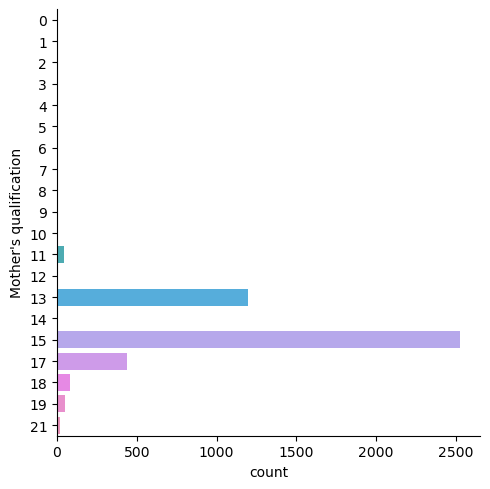

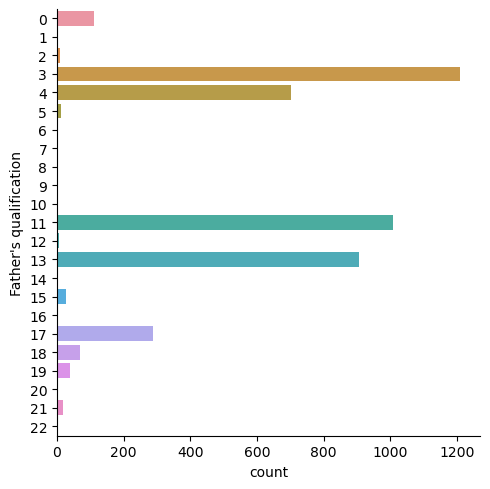

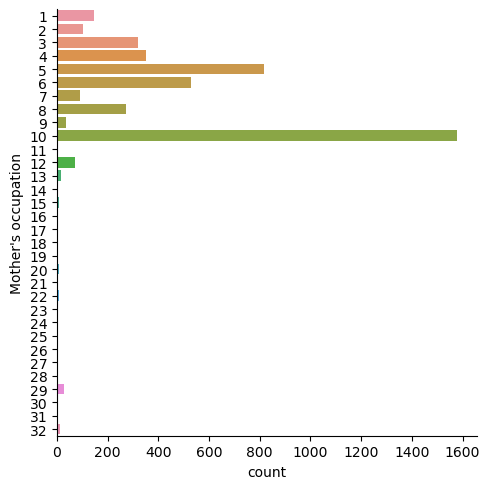

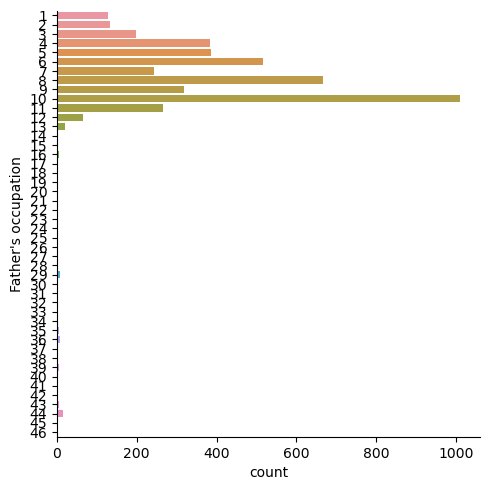

In [148]:
print('Mode: ',df["Mother's qualification"].mode())
print('Mode: ',df["Father's qualification"].mode())
print('Mode: ',df["Mother's occupation"].mode())
print('Mode: ',df["Father's occupation"].mode())

sb.catplot(y = "Mother's qualification", data = df, kind = "count")
sb.catplot(y= "Father's qualification", data = df, kind = 'count')
sb.catplot(y = "Mother's occupation", data = df, kind = "count")
sb.catplot(y= "Father's occupation", data = df, kind = 'count')

plt.show()

In [149]:
#replace features 'Unknown' with the mode
df["Mother's qualification"] = df["Mother's qualification"].replace({24:15})
df["Father's qualification"] = df["Father's qualification"].replace({24:3})

#replace features 'Other Situation' and '(blank)' with the mode
df["Mother's occupation"] = df["Mother's occupation"].replace({12:10, 13:10})
df["Father's occupation"] = df["Father's occupation"].replace({12:10, 13:10})

In [10]:
#Save preprocessed dataset
df.to_csv("clean_dataset_zon.csv", index=False )

In [150]:
""""""
from sklearn.preprocessing import StandardScaler

#Normalise numerical features to reduce differences between values of different columns
ss = StandardScaler()
numerical_features = ['Age at enrollment', 'Curricular units 1st sem (credited)',
                 'Curricular units 1st sem (enrolled)',
                 'Curricular units 1st sem (evaluations)',
                 'Curricular units 1st sem (approved)',
                 'Curricular units 1st sem (grade)',
                 'Curricular units 1st sem (without evaluations)',
                 'Curricular units 2nd sem (credited)',
                 'Curricular units 2nd sem (enrolled)',
                 'Curricular units 2nd sem (evaluations)',
                 'Curricular units 2nd sem (approved)',
                 'Curricular units 2nd sem (grade)',
                 'Curricular units 2nd sem (without evaluations)',
                 'Unemployment rate',
                 'Inflation rate',
                 'GDP',"Mother's qualification","Father's qualification","Previous qualification"]
df[numerical_features] = ss.fit_transform(df[numerical_features])



## Feature Engineering w FeatureTools

In [151]:
from featuretools.primitives import *

In [152]:
# Add tracker column to track index
df.insert(0, 'Tracker', range(4424))

In [153]:
# create an entity set 'es'
es = ft.EntitySet(id = 'Target')

# adding a dataframe 
es = es.add_dataframe(
    dataframe_name="students",
    dataframe=df,
    index="Tracker",
)

### Run Deep Feature Synthesis (DFS)

In [154]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_dataframe_name = 'students',
                                       max_depth = 1, verbose = 1, n_jobs = 3)

Built 35 features
EntitySet scattered to 3 workers in 17 seconds                                                                         
Elapsed: 00:02 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [155]:
feature_matrix.columns.reindex(df['Tracker'])
feature_matrix = feature_matrix.reset_index()
feature_matrix.head()

,Tracker,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,8,5,2,1,-0.182347,1,0.206340,0.493130,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
1,1,1,6,1,11,1,-0.182347,1,-0.848976,1.645184,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,Graduate
2,2,1,1,5,5,1,-0.182347,1,0.206340,-1.042942,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,Dropout
3,3,1,8,2,15,1,-0.182347,1,0.206340,-1.042942,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,Graduate
4,4,2,12,1,3,0,-0.182347,1,0.206340,-0.850933,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,Graduate


In [156]:
#feature_matrix.drop(['Tracker'], axis=1, inplace=True)
X = feature_matrix.iloc[:,:35]
y = feature_matrix.iloc[:,35:]

In [157]:
#Drop features with no importance: Previous qualification, Daytime/evening attendance, International 
#df.drop(['Previous qualification','Daytime/evening attendance','International'], axis = 1)
#X = df[features_list]
#y = df[forecast_var] 

# Encode categorical features
y = y.astype("category")
le = LabelEncoder()
y = le.fit_transform(np.ravel(y))

# **Hyperparameter Tuning w Optuna**

In [158]:
#hide warnings so they do not affect the functionality of the package
import warnings
warnings.filterwarnings('ignore')

In [159]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
# Split validation set from initial train set to form 8:1:1 train:validation:test ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.89,)

In [160]:
from sklearn.metrics import log_loss

def objective_with_pruning(trial):
    #define the hyperparameters to optimize
    params = {
        'eval_metric': 'mlogloss',
        'objective': 'multi:softmax',
        'max_depth': trial.suggest_int('max_depth', 5, 8),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 1800, 4000, 50),
        'eta': trial.suggest_loguniform('eta', 0.005, 0.1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1e-5),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 0.5),
        'min_split_loss': trial.suggest_loguniform('gamma', 1e-5, 1), 
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 15),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.1, 0.5)}
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation_0-mlogloss")
    model = xgb.XGBClassifier(early_stopping_rounds = 50, booster = 'gbtree',tree_method= 'approx',enable_categorical=True)
    model.set_params(**params)
    model.fit(X_train,y_train, eval_set = [(X_val,y_val)], callbacks=[pruning_callback], verbose = 10) 
    
    preds = model.predict_proba(X_val)
    loss = log_loss(y_val, preds)
    return loss

In [161]:
"""
1. 100 trials
Trial 72 finished with value: 0.552958542544134 and parameters: 
{'max_depth': 5, 'subsample': 0.8, 'n_estimators': 1950, 'eta': 0.02935051557466342, 
'reg_alpha': 2.7452323045088246e-08, 'reg_lambda': 3.771084614288098e-05, 'gamma': 0.000392937067496624,
'min_child_weight': 12, 'colsample_bytree': 0.2739207213317758}. 

2.500 trials
Trial 244 finished with value: 0.5555424854967693 and parameters: 
{'max_depth': 6, 'subsample': 0.95, 'n_estimators': 3350, 'eta': 0.008666006292274537, 
'reg_alpha': 1.2870589813811533e-06, 'reg_lambda': 0.13154643432513044, 'gamma': 0.026360214147244408
'min_child_weight': 5, 'colsample_bytree': 0.22708548202884274}. 

3. 100 trials, changed parameter search space, added pruning callback
Trial 22 finished with value: 0.5520506186121606 and parameters: 
{'max_depth': 6, 'subsample': 0.65, 'n_estimators': 2500, 'eta': 0.027735798765723383, 
'reg_alpha': 2.8442623168179127e-08, 'reg_lambda': 9.97186254008275e-05, 'gamma': 0.00042214727119007766, 
'min_child_weight': 11, 'colsample_bytree': 0.38249471476294605}.

4. 500 trials
Trial 217 finished with value: 0.5511272925050019 and parameters: 
{'max_depth': 7, 'subsample': 0.8, 'n_estimators': 3950, 'eta': 0.049656985841559836, 
'reg_alpha': 1.9886858590626805e-08, 'reg_lambda': 8.750237693599536e-05, 'gamma': 0.02578091778103115, 
'min_child_weight': 14, 'colsample_bytree': 0.3834674148298466}.

5. Trial 49 finished with value: 0.5502489012619268 and parameters: 
{'max_depth': 7, 'subsample': 0.7, 'n_estimators': 3800, 'eta': 0.09967223617945833, 
'reg_alpha': 4.1181276209901314e-08, 'reg_lambda': 0.040098666589886055, 'gamma': 0.924533874823556, 
'min_child_weight': 5, 'colsample_bytree': 0.33274357291224116}
Accuracy:0.78, F1 Score:[0.77 0.46  0.87]

6. Trial 60 finished with value: 0.5269664308760176 and parameters: 
{'max_depth': 5, 'subsample': 1.0, 'n_estimators': 3800, 'eta': 0.09952475990974284,
'reg_alpha': 9.778562186840526e-07, 'reg_lambda': 0.05099229063943839, 'gamma': 0.0037642422353443006,
'min_child_weight': 8, 'colsample_bytree': 0.4609258070899312}.
Accuracy:0.79, F1 Score:[0.81 0.52  0.85]
"""
study = optuna.create_study(direction='minimize')
study.optimize(objective_with_pruning, n_trials=500) #change number of trials later

[I 2023-04-06 00:15:19,664] A new study created in memory with name: no-name-bbc9716e-e398-4162-8327-e88f4c9c0df2


[0]	validation_0-mlogloss:1.07631
[10]	validation_0-mlogloss:0.90526
[20]	validation_0-mlogloss:0.79976
[30]	validation_0-mlogloss:0.73190
[40]	validation_0-mlogloss:0.68428
[50]	validation_0-mlogloss:0.65289
[60]	validation_0-mlogloss:0.63048
[70]	validation_0-mlogloss:0.61381
[80]	validation_0-mlogloss:0.60285
[90]	validation_0-mlogloss:0.59411
[100]	validation_0-mlogloss:0.58667
[110]	validation_0-mlogloss:0.58200
[120]	validation_0-mlogloss:0.57880
[130]	validation_0-mlogloss:0.57678
[140]	validation_0-mlogloss:0.57643
[150]	validation_0-mlogloss:0.57408
[160]	validation_0-mlogloss:0.57458
[170]	validation_0-mlogloss:0.57559
[180]	validation_0-mlogloss:0.57530
[190]	validation_0-mlogloss:0.57434
[200]	validation_0-mlogloss:0.57567
[206]	validation_0-mlogloss:0.57505


[I 2023-04-06 00:15:50,870] Trial 0 finished with value: 0.5738782097445163 and parameters: {'max_depth': 8, 'subsample': 0.7, 'n_estimators': 2700, 'eta': 0.04011858619332625, 'reg_alpha': 7.577653557454217e-08, 'reg_lambda': 1.1597400584290368e-05, 'gamma': 0.019466305199294355, 'min_child_weight': 5, 'colsample_bytree': 0.330030283267117}. Best is trial 0 with value: 0.5738782097445163.


[0]	validation_0-mlogloss:1.07203
[10]	validation_0-mlogloss:0.85409
[20]	validation_0-mlogloss:0.74312
[30]	validation_0-mlogloss:0.68158
[40]	validation_0-mlogloss:0.64406
[50]	validation_0-mlogloss:0.62288
[60]	validation_0-mlogloss:0.60699
[70]	validation_0-mlogloss:0.59602
[80]	validation_0-mlogloss:0.58840
[90]	validation_0-mlogloss:0.58313
[100]	validation_0-mlogloss:0.57781
[110]	validation_0-mlogloss:0.57605
[120]	validation_0-mlogloss:0.57469
[130]	validation_0-mlogloss:0.57203
[140]	validation_0-mlogloss:0.57113
[150]	validation_0-mlogloss:0.57032
[160]	validation_0-mlogloss:0.56923
[170]	validation_0-mlogloss:0.56814
[180]	validation_0-mlogloss:0.56659
[190]	validation_0-mlogloss:0.56488
[200]	validation_0-mlogloss:0.56586
[210]	validation_0-mlogloss:0.56627
[220]	validation_0-mlogloss:0.56641
[230]	validation_0-mlogloss:0.56752
[238]	validation_0-mlogloss:0.56730


[I 2023-04-06 00:16:19,431] Trial 1 finished with value: 0.5644879738904417 and parameters: {'max_depth': 5, 'subsample': 0.85, 'n_estimators': 3600, 'eta': 0.0626329457640384, 'reg_alpha': 1.915611363109033e-08, 'reg_lambda': 9.712842063429457e-06, 'gamma': 0.0021570650713040513, 'min_child_weight': 9, 'colsample_bytree': 0.26833197844136136}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.09198
[10]	validation_0-mlogloss:1.02856
[20]	validation_0-mlogloss:0.97361
[30]	validation_0-mlogloss:0.92771
[40]	validation_0-mlogloss:0.88660
[50]	validation_0-mlogloss:0.85334
[60]	validation_0-mlogloss:0.82295
[70]	validation_0-mlogloss:0.79505
[80]	validation_0-mlogloss:0.77218
[90]	validation_0-mlogloss:0.75164
[100]	validation_0-mlogloss:0.73279
[110]	validation_0-mlogloss:0.71692
[120]	validation_0-mlogloss:0.70323
[130]	validation_0-mlogloss:0.68987
[140]	validation_0-mlogloss:0.67910
[150]	validation_0-mlogloss:0.66864
[160]	validation_0-mlogloss:0.65987
[170]	validation_0-mlogloss:0.65253
[180]	validation_0-mlogloss:0.64548
[190]	validation_0-mlogloss:0.63790
[200]	validation_0-mlogloss:0.63240
[210]	validation_0-mlogloss:0.62641
[220]	validation_0-mlogloss:0.62084
[230]	validation_0-mlogloss:0.61610
[240]	validation_0-mlogloss:0.61140
[250]	validation_0-mlogloss:0.60764
[260]	validation_0-mlogloss:0.60401
[270]	validation_0-mlogloss:0.60091
[28

[I 2023-04-06 00:17:48,327] Trial 2 finished with value: 0.5664781602354695 and parameters: {'max_depth': 7, 'subsample': 0.9, 'n_estimators': 4000, 'eta': 0.012341206025211764, 'reg_alpha': 6.584146405133516e-08, 'reg_lambda': 3.830079534504136e-06, 'gamma': 0.004351897678336248, 'min_child_weight': 12, 'colsample_bytree': 0.3305480022952255}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.06924
[10]	validation_0-mlogloss:0.83642
[20]	validation_0-mlogloss:0.72572
[30]	validation_0-mlogloss:0.66749
[40]	validation_0-mlogloss:0.63182
[50]	validation_0-mlogloss:0.61141
[60]	validation_0-mlogloss:0.59629
[70]	validation_0-mlogloss:0.58655
[80]	validation_0-mlogloss:0.58265
[90]	validation_0-mlogloss:0.57935
[100]	validation_0-mlogloss:0.57567
[110]	validation_0-mlogloss:0.57564
[120]	validation_0-mlogloss:0.57621
[130]	validation_0-mlogloss:0.57278
[140]	validation_0-mlogloss:0.57319
[150]	validation_0-mlogloss:0.57213
[160]	validation_0-mlogloss:0.57059
[170]	validation_0-mlogloss:0.57153
[180]	validation_0-mlogloss:0.56988
[190]	validation_0-mlogloss:0.56803
[200]	validation_0-mlogloss:0.56901
[210]	validation_0-mlogloss:0.56864
[220]	validation_0-mlogloss:0.56918
[230]	validation_0-mlogloss:0.56882
[240]	validation_0-mlogloss:0.56972
[241]	validation_0-mlogloss:0.56953


[I 2023-04-06 00:18:14,509] Trial 3 finished with value: 0.5679469737224281 and parameters: {'max_depth': 7, 'subsample': 0.85, 'n_estimators': 3850, 'eta': 0.06753754943300684, 'reg_alpha': 6.99299950652629e-07, 'reg_lambda': 0.002526642367731033, 'gamma': 5.732583336337609e-05, 'min_child_weight': 14, 'colsample_bytree': 0.26449289060777426}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.09514
[10]	validation_0-mlogloss:1.06087
[20]	validation_0-mlogloss:1.02871
[30]	validation_0-mlogloss:0.99916
[40]	validation_0-mlogloss:0.97168
[50]	validation_0-mlogloss:0.94613
[60]	validation_0-mlogloss:0.92289
[70]	validation_0-mlogloss:0.90070
[80]	validation_0-mlogloss:0.88072
[90]	validation_0-mlogloss:0.86194
[100]	validation_0-mlogloss:0.84438
[110]	validation_0-mlogloss:0.82856
[120]	validation_0-mlogloss:0.81432
[130]	validation_0-mlogloss:0.80041
[140]	validation_0-mlogloss:0.78724
[150]	validation_0-mlogloss:0.77410
[160]	validation_0-mlogloss:0.76278
[170]	validation_0-mlogloss:0.75236
[180]	validation_0-mlogloss:0.74247
[190]	validation_0-mlogloss:0.73251
[200]	validation_0-mlogloss:0.72380
[210]	validation_0-mlogloss:0.71482
[220]	validation_0-mlogloss:0.70669
[230]	validation_0-mlogloss:0.69849
[240]	validation_0-mlogloss:0.69140
[250]	validation_0-mlogloss:0.68465
[260]	validation_0-mlogloss:0.67825
[270]	validation_0-mlogloss:0.67193
[28

[I 2023-04-06 00:21:07,064] Trial 4 finished with value: 0.5655352128010465 and parameters: {'max_depth': 7, 'subsample': 0.9, 'n_estimators': 1850, 'eta': 0.005841123815041638, 'reg_alpha': 7.448993236403994e-06, 'reg_lambda': 0.08207930040228426, 'gamma': 9.423816679988729e-05, 'min_child_weight': 13, 'colsample_bytree': 0.47539518578019047}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.09187


[I 2023-04-06 00:21:07,265] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09659


[I 2023-04-06 00:21:07,427] Trial 6 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09242


[I 2023-04-06 00:21:07,596] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:07,743] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:07,924] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06216
[10]	validation_0-mlogloss:0.80060
[20]	validation_0-mlogloss:0.69871
[30]	validation_0-mlogloss:0.65321
[40]	validation_0-mlogloss:0.62709
[50]	validation_0-mlogloss:0.61348
[60]	validation_0-mlogloss:0.60508
[70]	validation_0-mlogloss:0.59808
[80]	validation_0-mlogloss:0.59116
[90]	validation_0-mlogloss:0.58999
[100]	validation_0-mlogloss:0.58489
[110]	validation_0-mlogloss:0.58196


[I 2023-04-06 00:21:23,271] Trial 10 pruned. Trial was pruned at iteration 113.


[0]	validation_0-mlogloss:1.09504


[I 2023-04-06 00:21:23,901] Trial 11 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09570


[I 2023-04-06 00:21:24,446] Trial 12 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08521


[I 2023-04-06 00:21:24,857] Trial 13 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09456


[I 2023-04-06 00:21:25,107] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:25,419] Trial 15 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09575


[I 2023-04-06 00:21:25,701] Trial 16 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08433


[I 2023-04-06 00:21:25,934] Trial 17 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09432


[I 2023-04-06 00:21:26,385] Trial 18 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09100


[I 2023-04-06 00:21:26,712] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:27,099] Trial 20 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:27,520] Trial 21 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09107


[I 2023-04-06 00:21:28,978] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:31,125] Trial 23 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09591


[I 2023-04-06 00:21:31,504] Trial 24 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09348


[I 2023-04-06 00:21:32,098] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:21:32,564] Trial 26 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08789


[I 2023-04-06 00:21:32,951] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08317


[I 2023-04-06 00:21:33,217] Trial 28 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07053
[10]	validation_0-mlogloss:0.86509
[20]	validation_0-mlogloss:0.74981
[30]	validation_0-mlogloss:0.68567
[40]	validation_0-mlogloss:0.64339
[50]	validation_0-mlogloss:0.61862
[60]	validation_0-mlogloss:0.60068
[70]	validation_0-mlogloss:0.58854
[80]	validation_0-mlogloss:0.58109
[90]	validation_0-mlogloss:0.57674
[100]	validation_0-mlogloss:0.57225
[110]	validation_0-mlogloss:0.57159
[120]	validation_0-mlogloss:0.57010
[130]	validation_0-mlogloss:0.56898
[140]	validation_0-mlogloss:0.57041
[150]	validation_0-mlogloss:0.57019
[160]	validation_0-mlogloss:0.57063
[170]	validation_0-mlogloss:0.57146
[176]	validation_0-mlogloss:0.57216


[I 2023-04-06 00:22:03,995] Trial 29 finished with value: 0.5685657416215192 and parameters: {'max_depth': 8, 'subsample': 1.0, 'n_estimators': 2650, 'eta': 0.05142379396640737, 'reg_alpha': 5.2148108040516305e-08, 'reg_lambda': 1.2818111740822842e-05, 'gamma': 0.010445357364825655, 'min_child_weight': 8, 'colsample_bytree': 0.3288608431019991}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.07221
[10]	validation_0-mlogloss:0.87102
[20]	validation_0-mlogloss:0.75303
[30]	validation_0-mlogloss:0.68896
[40]	validation_0-mlogloss:0.64776
[50]	validation_0-mlogloss:0.62233
[60]	validation_0-mlogloss:0.60499
[70]	validation_0-mlogloss:0.59319
[80]	validation_0-mlogloss:0.58524
[90]	validation_0-mlogloss:0.57951
[100]	validation_0-mlogloss:0.57475
[110]	validation_0-mlogloss:0.57235
[120]	validation_0-mlogloss:0.57120
[130]	validation_0-mlogloss:0.56928
[140]	validation_0-mlogloss:0.57022
[150]	validation_0-mlogloss:0.57034
[160]	validation_0-mlogloss:0.57108
[170]	validation_0-mlogloss:0.57070
[180]	validation_0-mlogloss:0.57172
[182]	validation_0-mlogloss:0.57130


[I 2023-04-06 00:22:29,064] Trial 30 finished with value: 0.5687179577188166 and parameters: {'max_depth': 7, 'subsample': 0.75, 'n_estimators': 3050, 'eta': 0.04960357172804642, 'reg_alpha': 1.099223818553173e-07, 'reg_lambda': 5.338358790642114e-06, 'gamma': 0.000520438113464963, 'min_child_weight': 5, 'colsample_bytree': 0.34976212007966057}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.06503
[10]	validation_0-mlogloss:0.81009
[20]	validation_0-mlogloss:0.70208
[30]	validation_0-mlogloss:0.64834
[40]	validation_0-mlogloss:0.61714
[50]	validation_0-mlogloss:0.59967
[60]	validation_0-mlogloss:0.58670
[70]	validation_0-mlogloss:0.58059
[80]	validation_0-mlogloss:0.57548
[90]	validation_0-mlogloss:0.57367
[100]	validation_0-mlogloss:0.57009
[110]	validation_0-mlogloss:0.57192
[120]	validation_0-mlogloss:0.57107
[130]	validation_0-mlogloss:0.56955
[140]	validation_0-mlogloss:0.56951
[150]	validation_0-mlogloss:0.56909
[160]	validation_0-mlogloss:0.56902
[170]	validation_0-mlogloss:0.56839
[180]	validation_0-mlogloss:0.56870
[190]	validation_0-mlogloss:0.57032
[200]	validation_0-mlogloss:0.57337
[206]	validation_0-mlogloss:0.57402


[I 2023-04-06 00:23:03,669] Trial 31 finished with value: 0.5680978876548143 and parameters: {'max_depth': 7, 'subsample': 0.9, 'n_estimators': 3850, 'eta': 0.0784053282466345, 'reg_alpha': 6.237453029312468e-07, 'reg_lambda': 0.003503371637834945, 'gamma': 0.0001713378861521541, 'min_child_weight': 14, 'colsample_bytree': 0.26888978410575115}. Best is trial 1 with value: 0.5644879738904417.


[0]	validation_0-mlogloss:1.07186
[10]	validation_0-mlogloss:0.84791
[20]	validation_0-mlogloss:0.73928
[30]	validation_0-mlogloss:0.68406
[40]	validation_0-mlogloss:0.64687


[I 2023-04-06 00:23:09,254] Trial 32 pruned. Trial was pruned at iteration 40.


[0]	validation_0-mlogloss:1.08661


[I 2023-04-06 00:23:09,509] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:23:09,763] Trial 34 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05689
[10]	validation_0-mlogloss:0.77209
[20]	validation_0-mlogloss:0.66706
[30]	validation_0-mlogloss:0.62335
[40]	validation_0-mlogloss:0.59915
[50]	validation_0-mlogloss:0.58938
[60]	validation_0-mlogloss:0.58207
[70]	validation_0-mlogloss:0.57862
[80]	validation_0-mlogloss:0.57524
[90]	validation_0-mlogloss:0.57334
[100]	validation_0-mlogloss:0.57061
[110]	validation_0-mlogloss:0.57020
[120]	validation_0-mlogloss:0.57141
[130]	validation_0-mlogloss:0.56984
[140]	validation_0-mlogloss:0.57041
[150]	validation_0-mlogloss:0.57056
[160]	validation_0-mlogloss:0.57187
[170]	validation_0-mlogloss:0.57382
[180]	validation_0-mlogloss:0.57258
[181]	validation_0-mlogloss:0.57298


[I 2023-04-06 00:23:40,654] Trial 35 finished with value: 0.5689200010994815 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 3650, 'eta': 0.0981692542582135, 'reg_alpha': 6.304315198554426e-06, 'reg_lambda': 0.03829525485139376, 'gamma': 5.278999887936356e-05, 'min_child_weight': 15, 'colsample_bytree': 0.28204329496315284}. Best is trial 1 with value: 0.5644879738904417.
[I 2023-04-06 00:23:40,871] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:23:41,091] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:23:41,310] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:23:41,516] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:23:41,723] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06377
[10]	validation_0-mlogloss:0.80477
[20]	validation_0-mlogloss:0.69606
[30]	validation_0-mlogloss:0.64329
[40]	validation_0-mlogloss:0.61304
[50]	validation_0-mlogloss:0.59774
[60]	validation_0-mlogloss:0.58680
[70]	validation_0-mlogloss:0.57879
[80]	validation_0-mlogloss:0.57505
[90]	validation_0-mlogloss:0.57415
[100]	validation_0-mlogloss:0.57021
[110]	validation_0-mlogloss:0.56967
[120]	validation_0-mlogloss:0.56870
[130]	validation_0-mlogloss:0.56518
[140]	validation_0-mlogloss:0.56487
[150]	validation_0-mlogloss:0.56311
[160]	validation_0-mlogloss:0.56381
[170]	validation_0-mlogloss:0.56693
[180]	validation_0-mlogloss:0.56791
[190]	validation_0-mlogloss:0.56801
[198]	validation_0-mlogloss:0.56975


[I 2023-04-06 00:24:08,979] Trial 41 finished with value: 0.562765395587744 and parameters: {'max_depth': 7, 'subsample': 0.9, 'n_estimators': 3750, 'eta': 0.08115493082479422, 'reg_alpha': 7.594775924691634e-07, 'reg_lambda': 0.0035563623153443513, 'gamma': 0.0001477978085998509, 'min_child_weight': 15, 'colsample_bytree': 0.27517551153575937}. Best is trial 41 with value: 0.562765395587744.


[0]	validation_0-mlogloss:1.06652
[10]	validation_0-mlogloss:0.82110
[20]	validation_0-mlogloss:0.70946
[30]	validation_0-mlogloss:0.65410
[40]	validation_0-mlogloss:0.62284
[50]	validation_0-mlogloss:0.60495
[60]	validation_0-mlogloss:0.59217
[70]	validation_0-mlogloss:0.58459
[80]	validation_0-mlogloss:0.57747
[90]	validation_0-mlogloss:0.57424
[100]	validation_0-mlogloss:0.56979
[110]	validation_0-mlogloss:0.56860
[120]	validation_0-mlogloss:0.56814
[130]	validation_0-mlogloss:0.56639
[140]	validation_0-mlogloss:0.56677
[150]	validation_0-mlogloss:0.56566
[160]	validation_0-mlogloss:0.56528
[170]	validation_0-mlogloss:0.56673
[180]	validation_0-mlogloss:0.56558
[190]	validation_0-mlogloss:0.56504
[200]	validation_0-mlogloss:0.56672
[210]	validation_0-mlogloss:0.56756
[220]	validation_0-mlogloss:0.56745
[230]	validation_0-mlogloss:0.56810
[237]	validation_0-mlogloss:0.56866


[I 2023-04-06 00:24:43,180] Trial 42 finished with value: 0.5646080641532062 and parameters: {'max_depth': 7, 'subsample': 0.95, 'n_estimators': 3550, 'eta': 0.07398061945330375, 'reg_alpha': 9.503818386473767e-07, 'reg_lambda': 0.06322570398261657, 'gamma': 3.973820565668918e-05, 'min_child_weight': 15, 'colsample_bytree': 0.2771861036303533}. Best is trial 41 with value: 0.562765395587744.


[0]	validation_0-mlogloss:1.05431
[10]	validation_0-mlogloss:0.79078
[20]	validation_0-mlogloss:0.68213
[30]	validation_0-mlogloss:0.63368
[40]	validation_0-mlogloss:0.60497
[50]	validation_0-mlogloss:0.59081
[60]	validation_0-mlogloss:0.58311
[70]	validation_0-mlogloss:0.57799
[80]	validation_0-mlogloss:0.57566
[90]	validation_0-mlogloss:0.57271
[100]	validation_0-mlogloss:0.57050
[110]	validation_0-mlogloss:0.57188
[120]	validation_0-mlogloss:0.57215


[I 2023-04-06 00:24:57,953] Trial 43 pruned. Trial was pruned at iteration 128.


[0]	validation_0-mlogloss:1.06556
[10]	validation_0-mlogloss:0.81551
[20]	validation_0-mlogloss:0.70659
[30]	validation_0-mlogloss:0.65298
[40]	validation_0-mlogloss:0.62190
[50]	validation_0-mlogloss:0.60509
[60]	validation_0-mlogloss:0.59205
[70]	validation_0-mlogloss:0.58336
[80]	validation_0-mlogloss:0.57887
[90]	validation_0-mlogloss:0.57686
[100]	validation_0-mlogloss:0.57375


[I 2023-04-06 00:25:16,436] Trial 44 pruned. Trial was pruned at iteration 103.


[0]	validation_0-mlogloss:1.06638
[10]	validation_0-mlogloss:0.84052
[20]	validation_0-mlogloss:0.72730
[30]	validation_0-mlogloss:0.66783
[40]	validation_0-mlogloss:0.62990
[50]	validation_0-mlogloss:0.60941
[60]	validation_0-mlogloss:0.59461
[70]	validation_0-mlogloss:0.58533
[80]	validation_0-mlogloss:0.58010
[90]	validation_0-mlogloss:0.57669
[100]	validation_0-mlogloss:0.57393


[I 2023-04-06 00:25:30,474] Trial 45 pruned. Trial was pruned at iteration 102.


[0]	validation_0-mlogloss:1.05265
[10]	validation_0-mlogloss:0.77584
[20]	validation_0-mlogloss:0.66770
[30]	validation_0-mlogloss:0.62044
[40]	validation_0-mlogloss:0.59661
[50]	validation_0-mlogloss:0.58432
[60]	validation_0-mlogloss:0.57606
[70]	validation_0-mlogloss:0.57141
[80]	validation_0-mlogloss:0.56715
[90]	validation_0-mlogloss:0.56725
[100]	validation_0-mlogloss:0.56467
[110]	validation_0-mlogloss:0.56383
[120]	validation_0-mlogloss:0.56317
[130]	validation_0-mlogloss:0.56269
[140]	validation_0-mlogloss:0.56150
[150]	validation_0-mlogloss:0.56189
[160]	validation_0-mlogloss:0.56473
[170]	validation_0-mlogloss:0.56634
[180]	validation_0-mlogloss:0.56663
[190]	validation_0-mlogloss:0.56802
[195]	validation_0-mlogloss:0.56873


[I 2023-04-06 00:25:58,504] Trial 46 finished with value: 0.5608508966854651 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2800, 'eta': 0.08569124018434679, 'reg_alpha': 7.844967459484396e-07, 'reg_lambda': 0.05561900467602541, 'gamma': 0.00027379679696222465, 'min_child_weight': 8, 'colsample_bytree': 0.3365012245098081}. Best is trial 46 with value: 0.5608508966854651.


[0]	validation_0-mlogloss:1.06262
[10]	validation_0-mlogloss:0.80146
[20]	validation_0-mlogloss:0.69285
[30]	validation_0-mlogloss:0.64109
[40]	validation_0-mlogloss:0.61289
[50]	validation_0-mlogloss:0.59682
[60]	validation_0-mlogloss:0.58771
[70]	validation_0-mlogloss:0.58018
[80]	validation_0-mlogloss:0.57523
[90]	validation_0-mlogloss:0.57263
[100]	validation_0-mlogloss:0.56915
[110]	validation_0-mlogloss:0.57149
[120]	validation_0-mlogloss:0.56987
[130]	validation_0-mlogloss:0.56809
[140]	validation_0-mlogloss:0.56814
[150]	validation_0-mlogloss:0.56909
[160]	validation_0-mlogloss:0.56997
[170]	validation_0-mlogloss:0.56899
[180]	validation_0-mlogloss:0.56892
[182]	validation_0-mlogloss:0.56891


[I 2023-04-06 00:26:08,835] Trial 47 finished with value: 0.5674546660959602 and parameters: {'max_depth': 5, 'subsample': 0.95, 'n_estimators': 2800, 'eta': 0.08403941812753486, 'reg_alpha': 3.9302116158650646e-07, 'reg_lambda': 0.05171670925368129, 'gamma': 0.0002788889068496655, 'min_child_weight': 8, 'colsample_bytree': 0.2815298420905033}. Best is trial 46 with value: 0.5608508966854651.


[0]	validation_0-mlogloss:1.04673
[10]	validation_0-mlogloss:0.76129
[20]	validation_0-mlogloss:0.65471
[30]	validation_0-mlogloss:0.61353
[40]	validation_0-mlogloss:0.58895
[50]	validation_0-mlogloss:0.58069
[60]	validation_0-mlogloss:0.57342
[70]	validation_0-mlogloss:0.56952
[80]	validation_0-mlogloss:0.56676
[90]	validation_0-mlogloss:0.56563
[100]	validation_0-mlogloss:0.56377
[110]	validation_0-mlogloss:0.56391
[120]	validation_0-mlogloss:0.56253
[130]	validation_0-mlogloss:0.56147
[140]	validation_0-mlogloss:0.56339
[150]	validation_0-mlogloss:0.56355
[160]	validation_0-mlogloss:0.56520
[170]	validation_0-mlogloss:0.56785
[173]	validation_0-mlogloss:0.56863


[I 2023-04-06 00:26:20,151] Trial 48 finished with value: 0.5611028897057215 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09988701660048181, 'reg_alpha': 2.3711139077081083e-07, 'reg_lambda': 0.017740684212133047, 'gamma': 0.00012563516888052404, 'min_child_weight': 7, 'colsample_bytree': 0.30814758704784484}. Best is trial 46 with value: 0.5608508966854651.


[0]	validation_0-mlogloss:1.04943
[10]	validation_0-mlogloss:0.76282
[20]	validation_0-mlogloss:0.65536
[30]	validation_0-mlogloss:0.61204
[40]	validation_0-mlogloss:0.58643
[50]	validation_0-mlogloss:0.57427
[60]	validation_0-mlogloss:0.56867
[70]	validation_0-mlogloss:0.56609
[80]	validation_0-mlogloss:0.56351
[90]	validation_0-mlogloss:0.56228
[100]	validation_0-mlogloss:0.56100
[110]	validation_0-mlogloss:0.56115
[120]	validation_0-mlogloss:0.56094
[130]	validation_0-mlogloss:0.56275
[140]	validation_0-mlogloss:0.56608
[150]	validation_0-mlogloss:0.56543
[154]	validation_0-mlogloss:0.56627


[I 2023-04-06 00:26:37,406] Trial 49 finished with value: 0.5594019593131946 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.09314166174520686, 'reg_alpha': 8.449828793553613e-07, 'reg_lambda': 0.01816853372458885, 'gamma': 0.00013858661058519404, 'min_child_weight': 6, 'colsample_bytree': 0.33831568698574427}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.04599
[10]	validation_0-mlogloss:0.75049
[20]	validation_0-mlogloss:0.64717
[30]	validation_0-mlogloss:0.60677
[40]	validation_0-mlogloss:0.58476
[50]	validation_0-mlogloss:0.57935
[60]	validation_0-mlogloss:0.57377
[70]	validation_0-mlogloss:0.57101
[80]	validation_0-mlogloss:0.56838
[90]	validation_0-mlogloss:0.56776
[100]	validation_0-mlogloss:0.56471
[110]	validation_0-mlogloss:0.56603
[120]	validation_0-mlogloss:0.56721
[130]	validation_0-mlogloss:0.56985
[140]	validation_0-mlogloss:0.57200
[150]	validation_0-mlogloss:0.57528


[I 2023-04-06 00:26:52,355] Trial 50 finished with value: 0.5647056468610426 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.09978517865553062, 'reg_alpha': 7.68380634014145e-07, 'reg_lambda': 0.008973043057385227, 'gamma': 0.0001375985073375006, 'min_child_weight': 6, 'colsample_bytree': 0.3382325563050105}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.06055


[I 2023-04-06 00:26:53,002] Trial 51 pruned. Trial was pruned at iteration 6.


[0]	validation_0-mlogloss:1.05087
[10]	validation_0-mlogloss:0.77201
[20]	validation_0-mlogloss:0.66542
[30]	validation_0-mlogloss:0.61946
[40]	validation_0-mlogloss:0.59679
[50]	validation_0-mlogloss:0.58598
[60]	validation_0-mlogloss:0.57780
[70]	validation_0-mlogloss:0.57464
[80]	validation_0-mlogloss:0.57117
[90]	validation_0-mlogloss:0.56954
[100]	validation_0-mlogloss:0.56832
[110]	validation_0-mlogloss:0.56877
[120]	validation_0-mlogloss:0.56772
[130]	validation_0-mlogloss:0.56744
[140]	validation_0-mlogloss:0.56825
[150]	validation_0-mlogloss:0.57017
[160]	validation_0-mlogloss:0.57008
[170]	validation_0-mlogloss:0.57314
[177]	validation_0-mlogloss:0.57500


[I 2023-04-06 00:27:11,209] Trial 52 finished with value: 0.5664224987147912 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2300, 'eta': 0.08809445254228963, 'reg_alpha': 2.7398545988971793e-07, 'reg_lambda': 0.0165012765023325, 'gamma': 0.0002720637132140675, 'min_child_weight': 7, 'colsample_bytree': 0.33022012392108974}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05210
[10]	validation_0-mlogloss:0.78237
[20]	validation_0-mlogloss:0.67217
[30]	validation_0-mlogloss:0.62473
[40]	validation_0-mlogloss:0.60048
[50]	validation_0-mlogloss:0.58972
[60]	validation_0-mlogloss:0.58068
[70]	validation_0-mlogloss:0.57597
[80]	validation_0-mlogloss:0.57310
[90]	validation_0-mlogloss:0.56989
[100]	validation_0-mlogloss:0.56842
[110]	validation_0-mlogloss:0.57015
[120]	validation_0-mlogloss:0.56904
[130]	validation_0-mlogloss:0.57028
[140]	validation_0-mlogloss:0.57060
[150]	validation_0-mlogloss:0.57289
[153]	validation_0-mlogloss:0.57352


[I 2023-04-06 00:27:31,000] Trial 53 finished with value: 0.5677686455621295 and parameters: {'max_depth': 5, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.08982653453355066, 'reg_alpha': 4.919012774035236e-07, 'reg_lambda': 0.03581776770838374, 'gamma': 0.00011629828870739674, 'min_child_weight': 5, 'colsample_bytree': 0.3023668000615452}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05658
[10]	validation_0-mlogloss:0.80128
[20]	validation_0-mlogloss:0.68810
[30]	validation_0-mlogloss:0.63763
[40]	validation_0-mlogloss:0.60757
[50]	validation_0-mlogloss:0.59233
[60]	validation_0-mlogloss:0.58270
[70]	validation_0-mlogloss:0.57607
[80]	validation_0-mlogloss:0.57087
[90]	validation_0-mlogloss:0.56719
[100]	validation_0-mlogloss:0.56417
[110]	validation_0-mlogloss:0.56446
[120]	validation_0-mlogloss:0.56521
[130]	validation_0-mlogloss:0.56366
[140]	validation_0-mlogloss:0.56408
[150]	validation_0-mlogloss:0.56386
[160]	validation_0-mlogloss:0.56422
[170]	validation_0-mlogloss:0.56559
[180]	validation_0-mlogloss:0.56420
[181]	validation_0-mlogloss:0.56418


[I 2023-04-06 00:27:55,220] Trial 54 finished with value: 0.5628694879480097 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2450, 'eta': 0.07814819541304613, 'reg_alpha': 9.52739565622903e-07, 'reg_lambda': 0.0060699135678606905, 'gamma': 0.00018602270356870212, 'min_child_weight': 8, 'colsample_bytree': 0.29054605342177164}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05171
[10]	validation_0-mlogloss:0.77900
[20]	validation_0-mlogloss:0.66904
[30]	validation_0-mlogloss:0.62357
[40]	validation_0-mlogloss:0.59629
[50]	validation_0-mlogloss:0.58425
[60]	validation_0-mlogloss:0.57580
[70]	validation_0-mlogloss:0.57079
[80]	validation_0-mlogloss:0.56589
[90]	validation_0-mlogloss:0.56369
[100]	validation_0-mlogloss:0.56345
[110]	validation_0-mlogloss:0.56766
[120]	validation_0-mlogloss:0.56668
[130]	validation_0-mlogloss:0.56592
[140]	validation_0-mlogloss:0.56925
[149]	validation_0-mlogloss:0.56996


[I 2023-04-06 00:28:13,303] Trial 55 finished with value: 0.5628652695468606 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2450, 'eta': 0.09045777628431576, 'reg_alpha': 1.377965781976643e-06, 'reg_lambda': 0.006040189401195292, 'gamma': 0.0002051781105748668, 'min_child_weight': 9, 'colsample_bytree': 0.3114545538389181}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05122
[10]	validation_0-mlogloss:0.76911
[20]	validation_0-mlogloss:0.66094
[30]	validation_0-mlogloss:0.61754
[40]	validation_0-mlogloss:0.59093
[50]	validation_0-mlogloss:0.57854
[60]	validation_0-mlogloss:0.57153
[70]	validation_0-mlogloss:0.56770
[80]	validation_0-mlogloss:0.56513
[90]	validation_0-mlogloss:0.56491
[100]	validation_0-mlogloss:0.56370
[110]	validation_0-mlogloss:0.56696
[120]	validation_0-mlogloss:0.56793
[130]	validation_0-mlogloss:0.56947
[140]	validation_0-mlogloss:0.56976
[147]	validation_0-mlogloss:0.56964


[I 2023-04-06 00:28:29,352] Trial 56 finished with value: 0.5627360247483809 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2450, 'eta': 0.09090974360677405, 'reg_alpha': 1.344438350349885e-06, 'reg_lambda': 0.007273259675347268, 'gamma': 0.00018450113219000685, 'min_child_weight': 8, 'colsample_bytree': 0.3191406436124946}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05207
[10]	validation_0-mlogloss:0.77397
[20]	validation_0-mlogloss:0.66492
[30]	validation_0-mlogloss:0.62065
[40]	validation_0-mlogloss:0.59410
[50]	validation_0-mlogloss:0.58035
[60]	validation_0-mlogloss:0.57446
[70]	validation_0-mlogloss:0.57048
[80]	validation_0-mlogloss:0.56908
[90]	validation_0-mlogloss:0.56834
[100]	validation_0-mlogloss:0.56629
[110]	validation_0-mlogloss:0.57030
[120]	validation_0-mlogloss:0.57144
[130]	validation_0-mlogloss:0.57357
[140]	validation_0-mlogloss:0.57618
[150]	validation_0-mlogloss:0.57727
[151]	validation_0-mlogloss:0.57736


[I 2023-04-06 00:28:47,911] Trial 57 finished with value: 0.5661448799716904 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2150, 'eta': 0.08836141367548306, 'reg_alpha': 1.349975731218782e-06, 'reg_lambda': 0.017512783174816138, 'gamma': 0.00035462956274585433, 'min_child_weight': 7, 'colsample_bytree': 0.3245438966919438}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.04942
[10]	validation_0-mlogloss:0.77031
[20]	validation_0-mlogloss:0.66201
[30]	validation_0-mlogloss:0.61951
[40]	validation_0-mlogloss:0.59335
[50]	validation_0-mlogloss:0.58508
[60]	validation_0-mlogloss:0.57652
[70]	validation_0-mlogloss:0.57248
[80]	validation_0-mlogloss:0.57147
[90]	validation_0-mlogloss:0.56935
[100]	validation_0-mlogloss:0.56904
[110]	validation_0-mlogloss:0.57257
[120]	validation_0-mlogloss:0.57120
[130]	validation_0-mlogloss:0.57050
[138]	validation_0-mlogloss:0.57156


[I 2023-04-06 00:29:06,428] Trial 58 finished with value: 0.5678826882695295 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2550, 'eta': 0.09505563393276659, 'reg_alpha': 7.114538271075693e-07, 'reg_lambda': 0.007764770941875395, 'gamma': 0.00010053555445872668, 'min_child_weight': 9, 'colsample_bytree': 0.31395646629551477}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.06219


[I 2023-04-06 00:29:06,671] Trial 59 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05582
[10]	validation_0-mlogloss:0.78836
[20]	validation_0-mlogloss:0.67587
[30]	validation_0-mlogloss:0.62691
[40]	validation_0-mlogloss:0.59828
[50]	validation_0-mlogloss:0.58402
[60]	validation_0-mlogloss:0.57477
[70]	validation_0-mlogloss:0.56856
[80]	validation_0-mlogloss:0.56472
[90]	validation_0-mlogloss:0.56285
[100]	validation_0-mlogloss:0.56271
[110]	validation_0-mlogloss:0.56553
[120]	validation_0-mlogloss:0.56431
[130]	validation_0-mlogloss:0.56621
[140]	validation_0-mlogloss:0.56635
[147]	validation_0-mlogloss:0.56655


[I 2023-04-06 00:29:27,333] Trial 60 finished with value: 0.5616572593523776 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2200, 'eta': 0.08179523241350727, 'reg_alpha': 1.1606056871219735e-06, 'reg_lambda': 0.012218959465912891, 'gamma': 0.00020289537507036894, 'min_child_weight': 8, 'colsample_bytree': 0.3357475160460978}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05424
[10]	validation_0-mlogloss:0.77833
[20]	validation_0-mlogloss:0.66216
[30]	validation_0-mlogloss:0.61631
[40]	validation_0-mlogloss:0.59137
[50]	validation_0-mlogloss:0.57777
[60]	validation_0-mlogloss:0.57053
[70]	validation_0-mlogloss:0.56581
[80]	validation_0-mlogloss:0.56270
[90]	validation_0-mlogloss:0.56122
[100]	validation_0-mlogloss:0.56149
[110]	validation_0-mlogloss:0.56202
[120]	validation_0-mlogloss:0.56379
[130]	validation_0-mlogloss:0.56496
[138]	validation_0-mlogloss:0.56595


[I 2023-04-06 00:29:53,774] Trial 61 finished with value: 0.560413487454383 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2200, 'eta': 0.08439971865892555, 'reg_alpha': 2.3338655832411803e-06, 'reg_lambda': 0.012808092986521516, 'gamma': 0.00020603733461169315, 'min_child_weight': 8, 'colsample_bytree': 0.3624667818577337}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05552
[10]	validation_0-mlogloss:0.78436
[20]	validation_0-mlogloss:0.66794
[30]	validation_0-mlogloss:0.62079
[40]	validation_0-mlogloss:0.59587
[50]	validation_0-mlogloss:0.57936
[60]	validation_0-mlogloss:0.57100
[70]	validation_0-mlogloss:0.56669
[80]	validation_0-mlogloss:0.56356
[90]	validation_0-mlogloss:0.56361
[100]	validation_0-mlogloss:0.56269
[110]	validation_0-mlogloss:0.56364
[120]	validation_0-mlogloss:0.56426
[130]	validation_0-mlogloss:0.56584
[140]	validation_0-mlogloss:0.56654
[150]	validation_0-mlogloss:0.56522
[152]	validation_0-mlogloss:0.56527


[I 2023-04-06 00:30:22,600] Trial 62 finished with value: 0.562117037831138 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2200, 'eta': 0.08187068149386147, 'reg_alpha': 2.2033079177453136e-06, 'reg_lambda': 0.011436998054068193, 'gamma': 0.00033845605359944997, 'min_child_weight': 8, 'colsample_bytree': 0.3683817988900886}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.05888


[I 2023-04-06 00:30:22,842] Trial 63 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04737
[10]	validation_0-mlogloss:0.75179
[20]	validation_0-mlogloss:0.64341
[30]	validation_0-mlogloss:0.60424
[40]	validation_0-mlogloss:0.58509
[50]	validation_0-mlogloss:0.57405
[60]	validation_0-mlogloss:0.56920
[70]	validation_0-mlogloss:0.56611
[80]	validation_0-mlogloss:0.56389
[90]	validation_0-mlogloss:0.56341
[100]	validation_0-mlogloss:0.56118
[110]	validation_0-mlogloss:0.56488
[120]	validation_0-mlogloss:0.56612
[130]	validation_0-mlogloss:0.56824
[140]	validation_0-mlogloss:0.57266
[150]	validation_0-mlogloss:0.57367
[151]	validation_0-mlogloss:0.57384


[I 2023-04-06 00:30:40,219] Trial 64 finished with value: 0.5608623090197999 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2350, 'eta': 0.09778065363290807, 'reg_alpha': 2.5333468633961923e-06, 'reg_lambda': 0.014452434152258383, 'gamma': 0.00024065583813776898, 'min_child_weight': 7, 'colsample_bytree': 0.3658475312912864}. Best is trial 49 with value: 0.5594019593131946.
[I 2023-04-06 00:30:40,821] Trial 65 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05317


[I 2023-04-06 00:30:41,686] Trial 66 pruned. Trial was pruned at iteration 3.


[0]	validation_0-mlogloss:1.04716
[10]	validation_0-mlogloss:0.75443
[20]	validation_0-mlogloss:0.64849
[30]	validation_0-mlogloss:0.60786
[40]	validation_0-mlogloss:0.58561
[50]	validation_0-mlogloss:0.57783
[60]	validation_0-mlogloss:0.57139
[70]	validation_0-mlogloss:0.56897
[80]	validation_0-mlogloss:0.56837
[90]	validation_0-mlogloss:0.56624
[100]	validation_0-mlogloss:0.56264
[110]	validation_0-mlogloss:0.56522
[120]	validation_0-mlogloss:0.56684
[130]	validation_0-mlogloss:0.56874
[140]	validation_0-mlogloss:0.57014
[150]	validation_0-mlogloss:0.57172


[I 2023-04-06 00:30:54,824] Trial 67 finished with value: 0.5624367483183487 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09750462279722864, 'reg_alpha': 2.877477059047004e-06, 'reg_lambda': 0.01189276814663399, 'gamma': 0.0004086607027169613, 'min_child_weight': 6, 'colsample_bytree': 0.33853087576432156}. Best is trial 49 with value: 0.5594019593131946.


[0]	validation_0-mlogloss:1.04678
[10]	validation_0-mlogloss:0.74906
[20]	validation_0-mlogloss:0.64342
[30]	validation_0-mlogloss:0.60629
[40]	validation_0-mlogloss:0.58692
[50]	validation_0-mlogloss:0.57827
[60]	validation_0-mlogloss:0.57373
[70]	validation_0-mlogloss:0.56963
[80]	validation_0-mlogloss:0.56964
[90]	validation_0-mlogloss:0.56782
[100]	validation_0-mlogloss:0.56610
[110]	validation_0-mlogloss:0.56704
[120]	validation_0-mlogloss:0.56984
[130]	validation_0-mlogloss:0.57235
[140]	validation_0-mlogloss:0.57242
[147]	validation_0-mlogloss:0.57408


[I 2023-04-06 00:31:13,306] Trial 68 finished with value: 0.5660037093909593 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 1950, 'eta': 0.09985613986991791, 'reg_alpha': 2.243445383243186e-06, 'reg_lambda': 0.02135653744963267, 'gamma': 0.0006744872675069079, 'min_child_weight': 8, 'colsample_bytree': 0.37103736939078436}. Best is trial 49 with value: 0.5594019593131946.
[I 2023-04-06 00:31:13,539] Trial 69 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06073


[I 2023-04-06 00:31:13,759] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05410


[I 2023-04-06 00:31:14,446] Trial 71 pruned. Trial was pruned at iteration 3.


[0]	validation_0-mlogloss:1.04637
[10]	validation_0-mlogloss:0.75186
[20]	validation_0-mlogloss:0.64713
[30]	validation_0-mlogloss:0.60564
[40]	validation_0-mlogloss:0.58178
[50]	validation_0-mlogloss:0.57206
[60]	validation_0-mlogloss:0.56593
[70]	validation_0-mlogloss:0.56248
[80]	validation_0-mlogloss:0.56126
[90]	validation_0-mlogloss:0.55874
[100]	validation_0-mlogloss:0.55821
[110]	validation_0-mlogloss:0.56113
[120]	validation_0-mlogloss:0.56399
[130]	validation_0-mlogloss:0.56522
[140]	validation_0-mlogloss:0.56804
[150]	validation_0-mlogloss:0.57070
[151]	validation_0-mlogloss:0.57081


[I 2023-04-06 00:31:39,126] Trial 72 finished with value: 0.5575899602202103 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2200, 'eta': 0.09906224264507743, 'reg_alpha': 4.711741272969284e-06, 'reg_lambda': 0.012238744625391049, 'gamma': 0.00022592656150198032, 'min_child_weight': 6, 'colsample_bytree': 0.3422751195415418}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05638


[I 2023-04-06 00:31:39,385] Trial 73 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05063
[10]	validation_0-mlogloss:0.76257
[20]	validation_0-mlogloss:0.65079
[30]	validation_0-mlogloss:0.60992
[40]	validation_0-mlogloss:0.58836
[50]	validation_0-mlogloss:0.57480
[60]	validation_0-mlogloss:0.56909
[70]	validation_0-mlogloss:0.56604
[80]	validation_0-mlogloss:0.56332
[90]	validation_0-mlogloss:0.56364
[100]	validation_0-mlogloss:0.56222
[110]	validation_0-mlogloss:0.56639
[120]	validation_0-mlogloss:0.56701
[130]	validation_0-mlogloss:0.56708
[140]	validation_0-mlogloss:0.56741
[148]	validation_0-mlogloss:0.56827


[I 2023-04-06 00:31:56,851] Trial 74 finished with value: 0.5621037453670292 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.09234787033725839, 'reg_alpha': 3.4620672164086523e-06, 'reg_lambda': 0.016503552046982565, 'gamma': 0.00013481252563224137, 'min_child_weight': 9, 'colsample_bytree': 0.37135015404680544}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04703
[10]	validation_0-mlogloss:0.76365
[20]	validation_0-mlogloss:0.65287
[30]	validation_0-mlogloss:0.61374
[40]	validation_0-mlogloss:0.59235
[50]	validation_0-mlogloss:0.57927
[60]	validation_0-mlogloss:0.57536


[I 2023-04-06 00:32:04,497] Trial 75 pruned. Trial was pruned at iteration 63.


[0]	validation_0-mlogloss:1.04269
[10]	validation_0-mlogloss:0.74659
[20]	validation_0-mlogloss:0.63405
[30]	validation_0-mlogloss:0.59949
[40]	validation_0-mlogloss:0.58173
[50]	validation_0-mlogloss:0.57195
[60]	validation_0-mlogloss:0.56773
[70]	validation_0-mlogloss:0.56481
[80]	validation_0-mlogloss:0.56504
[90]	validation_0-mlogloss:0.56384
[100]	validation_0-mlogloss:0.56692
[110]	validation_0-mlogloss:0.56906
[120]	validation_0-mlogloss:0.57158
[123]	validation_0-mlogloss:0.57241


[I 2023-04-06 00:32:23,136] Trial 76 finished with value: 0.5630514015907158 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2550, 'eta': 0.09945359226790564, 'reg_alpha': 4.720335734386576e-06, 'reg_lambda': 0.018242057559392393, 'gamma': 0.00014031611847619712, 'min_child_weight': 6, 'colsample_bytree': 0.3788511721932695}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:32:23,356] Trial 77 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05122
[10]	validation_0-mlogloss:0.76911
[20]	validation_0-mlogloss:0.66095
[30]	validation_0-mlogloss:0.61756
[40]	validation_0-mlogloss:0.59089
[50]	validation_0-mlogloss:0.57889
[60]	validation_0-mlogloss:0.57161
[70]	validation_0-mlogloss:0.56845
[80]	validation_0-mlogloss:0.56629
[90]	validation_0-mlogloss:0.56647
[100]	validation_0-mlogloss:0.56431
[110]	validation_0-mlogloss:0.56650
[120]	validation_0-mlogloss:0.56493
[130]	validation_0-mlogloss:0.56676
[140]	validation_0-mlogloss:0.56762
[150]	validation_0-mlogloss:0.57016
[151]	validation_0-mlogloss:0.57041


[I 2023-04-06 00:32:41,955] Trial 78 finished with value: 0.5639025011795178 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2350, 'eta': 0.09092909131326318, 'reg_alpha': 1.5731126415704426e-06, 'reg_lambda': 0.015185925885746847, 'gamma': 0.00013662653864970092, 'min_child_weight': 8, 'colsample_bytree': 0.33972527862976254}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:32:42,176] Trial 79 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06319


[I 2023-04-06 00:32:42,417] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05506


[I 2023-04-06 00:32:42,713] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:32:43,003] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05813


[I 2023-04-06 00:32:43,333] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:32:43,622] Trial 84 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05016
[10]	validation_0-mlogloss:0.76062
[20]	validation_0-mlogloss:0.64922
[30]	validation_0-mlogloss:0.61114
[40]	validation_0-mlogloss:0.59075
[50]	validation_0-mlogloss:0.57869
[60]	validation_0-mlogloss:0.57248
[70]	validation_0-mlogloss:0.57064
[80]	validation_0-mlogloss:0.56730
[90]	validation_0-mlogloss:0.56713


[I 2023-04-06 00:32:56,166] Trial 85 pruned. Trial was pruned at iteration 95.
[I 2023-04-06 00:32:56,404] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:32:56,627] Trial 87 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04646
[10]	validation_0-mlogloss:0.74731
[20]	validation_0-mlogloss:0.63869
[30]	validation_0-mlogloss:0.60044
[40]	validation_0-mlogloss:0.58234
[50]	validation_0-mlogloss:0.57443
[60]	validation_0-mlogloss:0.57188
[70]	validation_0-mlogloss:0.56990
[80]	validation_0-mlogloss:0.56714
[90]	validation_0-mlogloss:0.56647
[100]	validation_0-mlogloss:0.56624
[110]	validation_0-mlogloss:0.56715
[120]	validation_0-mlogloss:0.57051
[130]	validation_0-mlogloss:0.57423
[140]	validation_0-mlogloss:0.57500
[150]	validation_0-mlogloss:0.57653
[151]	validation_0-mlogloss:0.57651


[I 2023-04-06 00:33:18,013] Trial 88 finished with value: 0.5651081892444867 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2600, 'eta': 0.09976828175676768, 'reg_alpha': 1.1898851683807555e-06, 'reg_lambda': 0.003989853363273272, 'gamma': 0.0004384092948428667, 'min_child_weight': 8, 'colsample_bytree': 0.35400568712205494}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05158


[I 2023-04-06 00:33:19,142] Trial 89 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04901
[10]	validation_0-mlogloss:0.76394
[20]	validation_0-mlogloss:0.65878
[30]	validation_0-mlogloss:0.61806
[40]	validation_0-mlogloss:0.59419
[50]	validation_0-mlogloss:0.58341
[60]	validation_0-mlogloss:0.57459


[I 2023-04-06 00:33:29,386] Trial 90 pruned. Trial was pruned at iteration 68.


[0]	validation_0-mlogloss:1.04870
[10]	validation_0-mlogloss:0.76028
[20]	validation_0-mlogloss:0.65270
[30]	validation_0-mlogloss:0.61148
[40]	validation_0-mlogloss:0.58629
[50]	validation_0-mlogloss:0.57728
[60]	validation_0-mlogloss:0.57130
[70]	validation_0-mlogloss:0.56951
[80]	validation_0-mlogloss:0.56973


[I 2023-04-06 00:33:41,399] Trial 91 pruned. Trial was pruned at iteration 87.


[0]	validation_0-mlogloss:1.05600


[I 2023-04-06 00:33:41,636] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:33:41,868] Trial 93 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04951
[10]	validation_0-mlogloss:0.77126
[20]	validation_0-mlogloss:0.66296
[30]	validation_0-mlogloss:0.61951


[I 2023-04-06 00:33:47,886] Trial 94 pruned. Trial was pruned at iteration 36.
[I 2023-04-06 00:33:48,228] Trial 95 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06161


[I 2023-04-06 00:33:48,492] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05495


[I 2023-04-06 00:33:48,770] Trial 97 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04855
[10]	validation_0-mlogloss:0.75497
[20]	validation_0-mlogloss:0.64522
[30]	validation_0-mlogloss:0.60638
[40]	validation_0-mlogloss:0.58699
[50]	validation_0-mlogloss:0.57757
[60]	validation_0-mlogloss:0.57326


[I 2023-04-06 00:33:59,606] Trial 98 pruned. Trial was pruned at iteration 70.


[0]	validation_0-mlogloss:1.05045


[I 2023-04-06 00:34:00,386] Trial 99 pruned. Trial was pruned at iteration 5.
[I 2023-04-06 00:34:00,657] Trial 100 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05096
[10]	validation_0-mlogloss:0.76808
[20]	validation_0-mlogloss:0.66042
[30]	validation_0-mlogloss:0.61732
[40]	validation_0-mlogloss:0.59149
[50]	validation_0-mlogloss:0.57895
[60]	validation_0-mlogloss:0.57132
[70]	validation_0-mlogloss:0.56647
[80]	validation_0-mlogloss:0.56628
[90]	validation_0-mlogloss:0.56539
[100]	validation_0-mlogloss:0.56310
[110]	validation_0-mlogloss:0.56563
[120]	validation_0-mlogloss:0.56721
[130]	validation_0-mlogloss:0.56810
[140]	validation_0-mlogloss:0.56986
[150]	validation_0-mlogloss:0.57068
[152]	validation_0-mlogloss:0.57056


[I 2023-04-06 00:34:26,579] Trial 101 finished with value: 0.562478823633014 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.09143148775894958, 'reg_alpha': 1.3731121652647683e-06, 'reg_lambda': 0.013099834672110153, 'gamma': 0.00018275490819536828, 'min_child_weight': 8, 'colsample_bytree': 0.32635645822613346}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04728
[10]	validation_0-mlogloss:0.75323
[20]	validation_0-mlogloss:0.64839
[30]	validation_0-mlogloss:0.60872
[40]	validation_0-mlogloss:0.58597
[50]	validation_0-mlogloss:0.57757
[60]	validation_0-mlogloss:0.57293


[I 2023-04-06 00:34:37,987] Trial 102 pruned. Trial was pruned at iteration 69.


[0]	validation_0-mlogloss:1.05224


[I 2023-04-06 00:34:38,315] Trial 103 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05786


[I 2023-04-06 00:34:38,601] Trial 104 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04995
[10]	validation_0-mlogloss:0.76437
[20]	validation_0-mlogloss:0.65750
[30]	validation_0-mlogloss:0.61410
[40]	validation_0-mlogloss:0.58965
[50]	validation_0-mlogloss:0.57974
[60]	validation_0-mlogloss:0.57331
[70]	validation_0-mlogloss:0.56919
[80]	validation_0-mlogloss:0.56674
[90]	validation_0-mlogloss:0.56549
[100]	validation_0-mlogloss:0.56383
[110]	validation_0-mlogloss:0.56716
[120]	validation_0-mlogloss:0.56756
[130]	validation_0-mlogloss:0.57067
[140]	validation_0-mlogloss:0.57214
[143]	validation_0-mlogloss:0.57220


[I 2023-04-06 00:34:58,334] Trial 105 finished with value: 0.5631913181689895 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2150, 'eta': 0.09357239913345755, 'reg_alpha': 2.3890579158986114e-06, 'reg_lambda': 0.035311481325698536, 'gamma': 0.00019368227377306014, 'min_child_weight': 8, 'colsample_bytree': 0.3342356112904308}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05575


[I 2023-04-06 00:34:58,863] Trial 106 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05357


[I 2023-04-06 00:34:59,492] Trial 107 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06334


[I 2023-04-06 00:34:59,970] Trial 108 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06247


[I 2023-04-06 00:35:00,224] Trial 109 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04259
[10]	validation_0-mlogloss:0.74498
[20]	validation_0-mlogloss:0.63743
[30]	validation_0-mlogloss:0.60134
[40]	validation_0-mlogloss:0.58263
[50]	validation_0-mlogloss:0.57332
[60]	validation_0-mlogloss:0.57182


[I 2023-04-06 00:35:06,971] Trial 110 pruned. Trial was pruned at iteration 69.


[0]	validation_0-mlogloss:1.05143
[10]	validation_0-mlogloss:0.77020
[20]	validation_0-mlogloss:0.66122
[30]	validation_0-mlogloss:0.61714
[40]	validation_0-mlogloss:0.59116
[50]	validation_0-mlogloss:0.57759
[60]	validation_0-mlogloss:0.57111
[70]	validation_0-mlogloss:0.56795
[80]	validation_0-mlogloss:0.56432
[90]	validation_0-mlogloss:0.56308
[100]	validation_0-mlogloss:0.56238
[110]	validation_0-mlogloss:0.56419
[120]	validation_0-mlogloss:0.56457
[130]	validation_0-mlogloss:0.56816
[140]	validation_0-mlogloss:0.56845
[150]	validation_0-mlogloss:0.56974
[152]	validation_0-mlogloss:0.57004


[I 2023-04-06 00:35:20,809] Trial 111 finished with value: 0.5611150278358988 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2650, 'eta': 0.09048383431538838, 'reg_alpha': 1.2510527799486044e-06, 'reg_lambda': 0.007061371022080439, 'gamma': 0.00016922520497586577, 'min_child_weight': 8, 'colsample_bytree': 0.3148267560948556}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05203


[I 2023-04-06 00:35:21,250] Trial 112 pruned. Trial was pruned at iteration 2.


[0]	validation_0-mlogloss:1.05711


[I 2023-04-06 00:35:21,480] Trial 113 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05028
[10]	validation_0-mlogloss:0.76548
[20]	validation_0-mlogloss:0.65797
[30]	validation_0-mlogloss:0.61442
[40]	validation_0-mlogloss:0.58883
[50]	validation_0-mlogloss:0.57957
[60]	validation_0-mlogloss:0.57345
[70]	validation_0-mlogloss:0.57035
[80]	validation_0-mlogloss:0.56745
[90]	validation_0-mlogloss:0.56609
[100]	validation_0-mlogloss:0.56560
[110]	validation_0-mlogloss:0.56714
[120]	validation_0-mlogloss:0.56672
[130]	validation_0-mlogloss:0.56971
[140]	validation_0-mlogloss:0.57154
[149]	validation_0-mlogloss:0.57287


[I 2023-04-06 00:35:45,557] Trial 114 finished with value: 0.56477676404504 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2700, 'eta': 0.09278731596838873, 'reg_alpha': 2.579398636218117e-06, 'reg_lambda': 0.012782737487809883, 'gamma': 9.793730574394133e-05, 'min_child_weight': 8, 'colsample_bytree': 0.3337692646390345}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:35:45,849] Trial 115 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05292


[I 2023-04-06 00:35:46,130] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:35:46,379] Trial 117 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04767
[10]	validation_0-mlogloss:0.76646
[20]	validation_0-mlogloss:0.65874
[30]	validation_0-mlogloss:0.61677
[40]	validation_0-mlogloss:0.59070
[50]	validation_0-mlogloss:0.57992
[60]	validation_0-mlogloss:0.57172
[70]	validation_0-mlogloss:0.56887
[80]	validation_0-mlogloss:0.56557
[90]	validation_0-mlogloss:0.56120
[100]	validation_0-mlogloss:0.55804
[110]	validation_0-mlogloss:0.56061
[120]	validation_0-mlogloss:0.56115
[130]	validation_0-mlogloss:0.56062
[140]	validation_0-mlogloss:0.56225
[150]	validation_0-mlogloss:0.56236
[151]	validation_0-mlogloss:0.56254


[I 2023-04-06 00:36:11,520] Trial 118 finished with value: 0.5577319596254067 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2650, 'eta': 0.09536775375569717, 'reg_alpha': 1.7986858672622892e-06, 'reg_lambda': 0.02413631429640948, 'gamma': 0.0003347986835124004, 'min_child_weight': 8, 'colsample_bytree': 0.3126656052754444}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04650
[10]	validation_0-mlogloss:0.76209
[20]	validation_0-mlogloss:0.65494
[30]	validation_0-mlogloss:0.61227
[40]	validation_0-mlogloss:0.58928
[50]	validation_0-mlogloss:0.57805
[60]	validation_0-mlogloss:0.57052
[70]	validation_0-mlogloss:0.56627
[80]	validation_0-mlogloss:0.56431
[90]	validation_0-mlogloss:0.56269
[100]	validation_0-mlogloss:0.56007
[110]	validation_0-mlogloss:0.56163
[120]	validation_0-mlogloss:0.56227
[130]	validation_0-mlogloss:0.56274
[140]	validation_0-mlogloss:0.56337
[150]	validation_0-mlogloss:0.56220
[152]	validation_0-mlogloss:0.56204


[I 2023-04-06 00:36:29,576] Trial 119 finished with value: 0.5585627047750104 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2700, 'eta': 0.0972172104075409, 'reg_alpha': 3.0312468050584166e-06, 'reg_lambda': 0.02329352824892957, 'gamma': 0.0005151135762134065, 'min_child_weight': 5, 'colsample_bytree': 0.29216197665951965}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05415


[I 2023-04-06 00:36:29,809] Trial 120 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04644
[10]	validation_0-mlogloss:0.76218
[20]	validation_0-mlogloss:0.65421
[30]	validation_0-mlogloss:0.61144
[40]	validation_0-mlogloss:0.58988
[50]	validation_0-mlogloss:0.57911
[60]	validation_0-mlogloss:0.57131
[70]	validation_0-mlogloss:0.56879
[80]	validation_0-mlogloss:0.56657
[90]	validation_0-mlogloss:0.56249
[100]	validation_0-mlogloss:0.56147
[110]	validation_0-mlogloss:0.56257
[120]	validation_0-mlogloss:0.56404
[130]	validation_0-mlogloss:0.56629
[140]	validation_0-mlogloss:0.56618
[150]	validation_0-mlogloss:0.56525
[151]	validation_0-mlogloss:0.56562


[I 2023-04-06 00:36:48,721] Trial 121 finished with value: 0.5609806744215934 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2650, 'eta': 0.09716216315288939, 'reg_alpha': 3.844600611699486e-06, 'reg_lambda': 0.03111034816376329, 'gamma': 0.000522994716160921, 'min_child_weight': 5, 'colsample_bytree': 0.28755263718658686}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04730
[10]	validation_0-mlogloss:0.76509
[20]	validation_0-mlogloss:0.65658
[30]	validation_0-mlogloss:0.61315
[40]	validation_0-mlogloss:0.59243


[I 2023-04-06 00:36:54,579] Trial 122 pruned. Trial was pruned at iteration 48.
[I 2023-04-06 00:36:54,794] Trial 123 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04721
[10]	validation_0-mlogloss:0.76478
[20]	validation_0-mlogloss:0.65674
[30]	validation_0-mlogloss:0.61249
[40]	validation_0-mlogloss:0.59149
[50]	validation_0-mlogloss:0.58018
[60]	validation_0-mlogloss:0.57162
[70]	validation_0-mlogloss:0.56842
[80]	validation_0-mlogloss:0.56548
[90]	validation_0-mlogloss:0.56180
[100]	validation_0-mlogloss:0.56187
[110]	validation_0-mlogloss:0.56221
[120]	validation_0-mlogloss:0.56449
[130]	validation_0-mlogloss:0.56615
[140]	validation_0-mlogloss:0.56667
[150]	validation_0-mlogloss:0.56482
[152]	validation_0-mlogloss:0.56486


[I 2023-04-06 00:37:17,581] Trial 124 finished with value: 0.561092333930872 and parameters: {'max_depth': 6, 'subsample': 0.95, 'n_estimators': 2750, 'eta': 0.09582257726182457, 'reg_alpha': 4.18784566454693e-06, 'reg_lambda': 0.01915203374285131, 'gamma': 0.0004948107549152957, 'min_child_weight': 5, 'colsample_bytree': 0.3115156062682803}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04573
[10]	validation_0-mlogloss:0.75967
[20]	validation_0-mlogloss:0.65392
[30]	validation_0-mlogloss:0.61266
[40]	validation_0-mlogloss:0.58756


[I 2023-04-06 00:37:23,160] Trial 125 pruned. Trial was pruned at iteration 49.


[0]	validation_0-mlogloss:1.04842
[10]	validation_0-mlogloss:0.76900
[20]	validation_0-mlogloss:0.65917
[30]	validation_0-mlogloss:0.61376
[40]	validation_0-mlogloss:0.59185


[I 2023-04-06 00:37:29,045] Trial 126 pruned. Trial was pruned at iteration 49.


[0]	validation_0-mlogloss:1.05113


[I 2023-04-06 00:37:29,356] Trial 127 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:37:29,615] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:37:30,043] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:37:30,636] Trial 130 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04961


[I 2023-04-06 00:37:32,086] Trial 131 pruned. Trial was pruned at iteration 4.
[I 2023-04-06 00:37:32,710] Trial 132 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:37:33,086] Trial 133 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05932


[I 2023-04-06 00:37:33,325] Trial 134 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04684
[10]	validation_0-mlogloss:0.74820
[20]	validation_0-mlogloss:0.64113
[30]	validation_0-mlogloss:0.60355
[40]	validation_0-mlogloss:0.58472
[50]	validation_0-mlogloss:0.57438
[60]	validation_0-mlogloss:0.57056
[70]	validation_0-mlogloss:0.56772
[80]	validation_0-mlogloss:0.56674
[90]	validation_0-mlogloss:0.56760


[I 2023-04-06 00:37:46,160] Trial 135 pruned. Trial was pruned at iteration 99.
[I 2023-04-06 00:37:46,397] Trial 136 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06591


[I 2023-04-06 00:37:46,672] Trial 137 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06761


[I 2023-04-06 00:37:46,956] Trial 138 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06301


[I 2023-04-06 00:37:47,188] Trial 139 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05371


[I 2023-04-06 00:37:47,431] Trial 140 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04905
[10]	validation_0-mlogloss:0.76130
[20]	validation_0-mlogloss:0.65379
[30]	validation_0-mlogloss:0.61245
[40]	validation_0-mlogloss:0.58672
[50]	validation_0-mlogloss:0.57517
[60]	validation_0-mlogloss:0.57002
[70]	validation_0-mlogloss:0.56899
[80]	validation_0-mlogloss:0.56830


[I 2023-04-06 00:37:59,515] Trial 141 pruned. Trial was pruned at iteration 88.


[0]	validation_0-mlogloss:1.04797
[10]	validation_0-mlogloss:0.75735
[20]	validation_0-mlogloss:0.65000
[30]	validation_0-mlogloss:0.60827
[40]	validation_0-mlogloss:0.58474
[50]	validation_0-mlogloss:0.57557
[60]	validation_0-mlogloss:0.56859
[70]	validation_0-mlogloss:0.56643
[80]	validation_0-mlogloss:0.56513
[90]	validation_0-mlogloss:0.56225
[100]	validation_0-mlogloss:0.55861
[110]	validation_0-mlogloss:0.56073
[120]	validation_0-mlogloss:0.56367
[130]	validation_0-mlogloss:0.56790
[140]	validation_0-mlogloss:0.57169
[150]	validation_0-mlogloss:0.57264


[I 2023-04-06 00:38:15,915] Trial 142 finished with value: 0.5586142586278368 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.09590772234824473, 'reg_alpha': 4.350702554887798e-06, 'reg_lambda': 0.013725830627334101, 'gamma': 0.00040311614459866287, 'min_child_weight': 6, 'colsample_bytree': 0.31862757660051233}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:38:16,473] Trial 143 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:38:17,129] Trial 144 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04847
[10]	validation_0-mlogloss:0.76050
[20]	validation_0-mlogloss:0.65428
[30]	validation_0-mlogloss:0.61222
[40]	validation_0-mlogloss:0.58790
[50]	validation_0-mlogloss:0.57898
[60]	validation_0-mlogloss:0.57255
[70]	validation_0-mlogloss:0.56865


[I 2023-04-06 00:38:24,731] Trial 145 pruned. Trial was pruned at iteration 74.
[I 2023-04-06 00:38:24,964] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:38:25,204] Trial 147 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04669
[10]	validation_0-mlogloss:0.74837
[20]	validation_0-mlogloss:0.64021
[30]	validation_0-mlogloss:0.60186
[40]	validation_0-mlogloss:0.58301
[50]	validation_0-mlogloss:0.57388
[60]	validation_0-mlogloss:0.57123
[70]	validation_0-mlogloss:0.56831
[80]	validation_0-mlogloss:0.56584
[90]	validation_0-mlogloss:0.56736


[I 2023-04-06 00:38:37,504] Trial 148 pruned. Trial was pruned at iteration 94.


[0]	validation_0-mlogloss:1.04880
[10]	validation_0-mlogloss:0.76469
[20]	validation_0-mlogloss:0.64972
[30]	validation_0-mlogloss:0.60706
[40]	validation_0-mlogloss:0.58598
[50]	validation_0-mlogloss:0.57294
[60]	validation_0-mlogloss:0.56753
[70]	validation_0-mlogloss:0.56494
[80]	validation_0-mlogloss:0.56246
[90]	validation_0-mlogloss:0.56181
[100]	validation_0-mlogloss:0.56302
[110]	validation_0-mlogloss:0.56535
[120]	validation_0-mlogloss:0.56820
[130]	validation_0-mlogloss:0.56707
[138]	validation_0-mlogloss:0.56957


[I 2023-04-06 00:38:54,624] Trial 149 finished with value: 0.5609140049891554 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.0903239732515943, 'reg_alpha': 2.5846471985628573e-06, 'reg_lambda': 0.0052670276746735025, 'gamma': 0.0010131331856707512, 'min_child_weight': 9, 'colsample_bytree': 0.38484664583229256}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04889
[10]	validation_0-mlogloss:0.76421
[20]	validation_0-mlogloss:0.65176
[30]	validation_0-mlogloss:0.61137
[40]	validation_0-mlogloss:0.59105
[50]	validation_0-mlogloss:0.57734
[60]	validation_0-mlogloss:0.57190


[I 2023-04-06 00:38:59,978] Trial 150 pruned. Trial was pruned at iteration 63.


[0]	validation_0-mlogloss:1.04621
[10]	validation_0-mlogloss:0.75450
[20]	validation_0-mlogloss:0.64238
[30]	validation_0-mlogloss:0.60188
[40]	validation_0-mlogloss:0.58313
[50]	validation_0-mlogloss:0.57207
[60]	validation_0-mlogloss:0.56763
[70]	validation_0-mlogloss:0.56520
[80]	validation_0-mlogloss:0.56265
[90]	validation_0-mlogloss:0.56254
[100]	validation_0-mlogloss:0.56267
[110]	validation_0-mlogloss:0.56431
[120]	validation_0-mlogloss:0.56608
[130]	validation_0-mlogloss:0.56709
[133]	validation_0-mlogloss:0.56815


[I 2023-04-06 00:39:14,832] Trial 151 finished with value: 0.5615427469756012 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.0952172859580231, 'reg_alpha': 2.351906114813049e-06, 'reg_lambda': 0.010473702784386859, 'gamma': 0.0007283782112483465, 'min_child_weight': 9, 'colsample_bytree': 0.3945367771620533}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04272
[10]	validation_0-mlogloss:0.75296
[20]	validation_0-mlogloss:0.64378
[30]	validation_0-mlogloss:0.60395
[40]	validation_0-mlogloss:0.58725
[50]	validation_0-mlogloss:0.57829


[I 2023-04-06 00:39:21,262] Trial 152 pruned. Trial was pruned at iteration 54.


[0]	validation_0-mlogloss:1.04377
[10]	validation_0-mlogloss:0.74562
[20]	validation_0-mlogloss:0.63590
[30]	validation_0-mlogloss:0.59831
[40]	validation_0-mlogloss:0.58128
[50]	validation_0-mlogloss:0.57133
[60]	validation_0-mlogloss:0.56714
[70]	validation_0-mlogloss:0.56650
[80]	validation_0-mlogloss:0.56406
[90]	validation_0-mlogloss:0.56405
[100]	validation_0-mlogloss:0.56473
[110]	validation_0-mlogloss:0.56851
[120]	validation_0-mlogloss:0.57275
[130]	validation_0-mlogloss:0.57451
[132]	validation_0-mlogloss:0.57454


[I 2023-04-06 00:39:34,228] Trial 153 finished with value: 0.5629269644951864 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.0997949481727616, 'reg_alpha': 3.408944395539327e-06, 'reg_lambda': 0.02766186732051082, 'gamma': 0.0005357138941868543, 'min_child_weight': 9, 'colsample_bytree': 0.3873330618855884}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04934
[10]	validation_0-mlogloss:0.76620
[20]	validation_0-mlogloss:0.65129
[30]	validation_0-mlogloss:0.60814
[40]	validation_0-mlogloss:0.58650
[50]	validation_0-mlogloss:0.57460
[60]	validation_0-mlogloss:0.56822
[70]	validation_0-mlogloss:0.56707
[80]	validation_0-mlogloss:0.56694


[I 2023-04-06 00:39:42,968] Trial 154 pruned. Trial was pruned at iteration 88.


[0]	validation_0-mlogloss:1.05523


[I 2023-04-06 00:39:45,152] Trial 155 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04624
[10]	validation_0-mlogloss:0.76074
[20]	validation_0-mlogloss:0.64927
[30]	validation_0-mlogloss:0.60936
[40]	validation_0-mlogloss:0.58886
[50]	validation_0-mlogloss:0.57781
[60]	validation_0-mlogloss:0.57175


[I 2023-04-06 00:39:56,097] Trial 156 pruned. Trial was pruned at iteration 63.


[0]	validation_0-mlogloss:1.07548


[I 2023-04-06 00:39:58,506] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:39:58,755] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:39:59,000] Trial 159 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05893


[I 2023-04-06 00:39:59,249] Trial 160 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04920
[10]	validation_0-mlogloss:0.75718
[20]	validation_0-mlogloss:0.64654
[30]	validation_0-mlogloss:0.60677
[40]	validation_0-mlogloss:0.58510
[50]	validation_0-mlogloss:0.57520
[60]	validation_0-mlogloss:0.57076
[70]	validation_0-mlogloss:0.56758
[80]	validation_0-mlogloss:0.56364
[90]	validation_0-mlogloss:0.56179
[100]	validation_0-mlogloss:0.56204
[110]	validation_0-mlogloss:0.56519
[120]	validation_0-mlogloss:0.56766
[130]	validation_0-mlogloss:0.57084
[140]	validation_0-mlogloss:0.57312
[144]	validation_0-mlogloss:0.57326


[I 2023-04-06 00:40:19,101] Trial 161 finished with value: 0.5614104451607386 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.09434771975277119, 'reg_alpha': 2.1532729011110787e-06, 'reg_lambda': 0.014090528035216468, 'gamma': 0.00024269424449592514, 'min_child_weight': 8, 'colsample_bytree': 0.3648541823729322}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04927
[10]	validation_0-mlogloss:0.76160
[20]	validation_0-mlogloss:0.65458
[30]	validation_0-mlogloss:0.61202
[40]	validation_0-mlogloss:0.58690
[50]	validation_0-mlogloss:0.57823
[60]	validation_0-mlogloss:0.57171
[70]	validation_0-mlogloss:0.56758
[80]	validation_0-mlogloss:0.56491
[90]	validation_0-mlogloss:0.56373
[100]	validation_0-mlogloss:0.56273
[110]	validation_0-mlogloss:0.56688
[120]	validation_0-mlogloss:0.56728
[130]	validation_0-mlogloss:0.56984
[140]	validation_0-mlogloss:0.56963
[144]	validation_0-mlogloss:0.56971


[I 2023-04-06 00:40:39,549] Trial 162 finished with value: 0.5620458924475223 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09479631497942362, 'reg_alpha': 2.131491686659339e-06, 'reg_lambda': 0.014946462105009037, 'gamma': 0.0003129443361460072, 'min_child_weight': 8, 'colsample_bytree': 0.3352714102291468}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04677
[10]	validation_0-mlogloss:0.75262
[20]	validation_0-mlogloss:0.64880
[30]	validation_0-mlogloss:0.60800
[40]	validation_0-mlogloss:0.58509
[50]	validation_0-mlogloss:0.57746


[I 2023-04-06 00:40:48,920] Trial 163 pruned. Trial was pruned at iteration 55.


[0]	validation_0-mlogloss:1.04905
[10]	validation_0-mlogloss:0.76079
[20]	validation_0-mlogloss:0.65529
[30]	validation_0-mlogloss:0.61298
[40]	validation_0-mlogloss:0.58833
[50]	validation_0-mlogloss:0.57696
[60]	validation_0-mlogloss:0.57035
[70]	validation_0-mlogloss:0.56543
[80]	validation_0-mlogloss:0.56277
[90]	validation_0-mlogloss:0.56430
[100]	validation_0-mlogloss:0.56340
[110]	validation_0-mlogloss:0.56735
[120]	validation_0-mlogloss:0.56891
[128]	validation_0-mlogloss:0.57078


[I 2023-04-06 00:41:08,827] Trial 164 finished with value: 0.5612989948641458 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09523821044325996, 'reg_alpha': 2.0622640626760416e-06, 'reg_lambda': 0.013735266697241993, 'gamma': 0.0003545397700770339, 'min_child_weight': 8, 'colsample_bytree': 0.3224661482234707}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:41:09,084] Trial 165 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05697


[I 2023-04-06 00:41:09,326] Trial 166 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04939


[I 2023-04-06 00:41:09,742] Trial 167 pruned. Trial was pruned at iteration 2.
[I 2023-04-06 00:41:10,020] Trial 168 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05717


[I 2023-04-06 00:41:10,263] Trial 169 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05084


[I 2023-04-06 00:41:10,662] Trial 170 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04650
[10]	validation_0-mlogloss:0.74749
[20]	validation_0-mlogloss:0.63900
[30]	validation_0-mlogloss:0.59985
[40]	validation_0-mlogloss:0.58191
[50]	validation_0-mlogloss:0.57196
[60]	validation_0-mlogloss:0.56955
[70]	validation_0-mlogloss:0.56673
[80]	validation_0-mlogloss:0.56605
[90]	validation_0-mlogloss:0.56488
[100]	validation_0-mlogloss:0.56406
[110]	validation_0-mlogloss:0.56458
[120]	validation_0-mlogloss:0.56761
[130]	validation_0-mlogloss:0.57116
[140]	validation_0-mlogloss:0.57116
[150]	validation_0-mlogloss:0.57179
[157]	validation_0-mlogloss:0.57325


[I 2023-04-06 00:41:29,222] Trial 171 finished with value: 0.563724773073756 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09972030392953077, 'reg_alpha': 1.975645056888324e-06, 'reg_lambda': 0.01538323534276895, 'gamma': 0.0003085957408251575, 'min_child_weight': 8, 'colsample_bytree': 0.3431531382840879}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04931
[10]	validation_0-mlogloss:0.76176
[20]	validation_0-mlogloss:0.65471
[30]	validation_0-mlogloss:0.61202
[40]	validation_0-mlogloss:0.58740
[50]	validation_0-mlogloss:0.57751
[60]	validation_0-mlogloss:0.57023
[70]	validation_0-mlogloss:0.56632
[80]	validation_0-mlogloss:0.56319
[90]	validation_0-mlogloss:0.56300
[100]	validation_0-mlogloss:0.56151
[110]	validation_0-mlogloss:0.56627
[120]	validation_0-mlogloss:0.56718
[130]	validation_0-mlogloss:0.56683
[140]	validation_0-mlogloss:0.56792
[148]	validation_0-mlogloss:0.56892


[I 2023-04-06 00:41:48,965] Trial 172 finished with value: 0.5608720086423519 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.0947033559983783, 'reg_alpha': 2.172509971985885e-06, 'reg_lambda': 0.010818238900063375, 'gamma': 0.0002293581759347575, 'min_child_weight': 8, 'colsample_bytree': 0.33768784823914627}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05531


[I 2023-04-06 00:41:49,349] Trial 173 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08489


[I 2023-04-06 00:41:50,006] Trial 174 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05165


[I 2023-04-06 00:41:50,770] Trial 175 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04939
[10]	validation_0-mlogloss:0.76180
[20]	validation_0-mlogloss:0.65514
[30]	validation_0-mlogloss:0.61231
[40]	validation_0-mlogloss:0.58824
[50]	validation_0-mlogloss:0.57886


[I 2023-04-06 00:41:56,707] Trial 176 pruned. Trial was pruned at iteration 52.


[0]	validation_0-mlogloss:1.05375


[I 2023-04-06 00:41:57,337] Trial 177 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08009


[I 2023-04-06 00:41:57,975] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:41:58,827] Trial 179 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04939
[10]	validation_0-mlogloss:0.75916
[20]	validation_0-mlogloss:0.64795
[30]	validation_0-mlogloss:0.60694
[40]	validation_0-mlogloss:0.58351
[50]	validation_0-mlogloss:0.57250
[60]	validation_0-mlogloss:0.56748
[70]	validation_0-mlogloss:0.56585
[80]	validation_0-mlogloss:0.56537
[90]	validation_0-mlogloss:0.56537


[I 2023-04-06 00:42:25,645] Trial 180 pruned. Trial was pruned at iteration 98.


[0]	validation_0-mlogloss:1.04673
[10]	validation_0-mlogloss:0.75248
[20]	validation_0-mlogloss:0.64892
[30]	validation_0-mlogloss:0.60846
[40]	validation_0-mlogloss:0.58561
[50]	validation_0-mlogloss:0.57789


[I 2023-04-06 00:42:38,253] Trial 181 pruned. Trial was pruned at iteration 56.


[0]	validation_0-mlogloss:1.04939
[10]	validation_0-mlogloss:0.76181
[20]	validation_0-mlogloss:0.65478
[30]	validation_0-mlogloss:0.61229
[40]	validation_0-mlogloss:0.58812
[50]	validation_0-mlogloss:0.57881


[I 2023-04-06 00:42:44,611] Trial 182 pruned. Trial was pruned at iteration 58.
[I 2023-04-06 00:42:44,882] Trial 183 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07317


[I 2023-04-06 00:42:45,148] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08795


[I 2023-04-06 00:42:45,401] Trial 185 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04939
[10]	validation_0-mlogloss:0.76058
[20]	validation_0-mlogloss:0.65194
[30]	validation_0-mlogloss:0.61392


[I 2023-04-06 00:42:50,770] Trial 186 pruned. Trial was pruned at iteration 36.
[I 2023-04-06 00:42:50,995] Trial 187 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05223


[I 2023-04-06 00:42:51,221] Trial 188 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04287
[10]	validation_0-mlogloss:0.74494
[20]	validation_0-mlogloss:0.63200
[30]	validation_0-mlogloss:0.59691
[40]	validation_0-mlogloss:0.58114
[50]	validation_0-mlogloss:0.57304
[60]	validation_0-mlogloss:0.56761
[70]	validation_0-mlogloss:0.56641
[80]	validation_0-mlogloss:0.56781


[I 2023-04-06 00:42:59,444] Trial 189 pruned. Trial was pruned at iteration 88.
[I 2023-04-06 00:42:59,653] Trial 190 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04663
[10]	validation_0-mlogloss:0.75620
[20]	validation_0-mlogloss:0.64379
[30]	validation_0-mlogloss:0.60367
[40]	validation_0-mlogloss:0.58376
[50]	validation_0-mlogloss:0.57057
[60]	validation_0-mlogloss:0.56481
[70]	validation_0-mlogloss:0.56355
[80]	validation_0-mlogloss:0.56308
[90]	validation_0-mlogloss:0.56244
[100]	validation_0-mlogloss:0.56239
[110]	validation_0-mlogloss:0.56604
[120]	validation_0-mlogloss:0.56719
[130]	validation_0-mlogloss:0.56918
[140]	validation_0-mlogloss:0.56995
[143]	validation_0-mlogloss:0.57041


[I 2023-04-06 00:43:17,231] Trial 191 finished with value: 0.5617284167475028 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.0944271355363912, 'reg_alpha': 4.107836174991523e-06, 'reg_lambda': 0.01571175109164926, 'gamma': 0.00010077949431027342, 'min_child_weight': 9, 'colsample_bytree': 0.37311007727163736}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04666
[10]	validation_0-mlogloss:0.75630
[20]	validation_0-mlogloss:0.64387
[30]	validation_0-mlogloss:0.60373
[40]	validation_0-mlogloss:0.58381
[50]	validation_0-mlogloss:0.57056
[60]	validation_0-mlogloss:0.56444
[70]	validation_0-mlogloss:0.56355
[80]	validation_0-mlogloss:0.56307
[90]	validation_0-mlogloss:0.56485
[100]	validation_0-mlogloss:0.56507
[110]	validation_0-mlogloss:0.56775
[120]	validation_0-mlogloss:0.56964
[124]	validation_0-mlogloss:0.57078


[I 2023-04-06 00:43:37,785] Trial 192 finished with value: 0.5623957497965051 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2350, 'eta': 0.09437971846240563, 'reg_alpha': 4.3321391361215815e-06, 'reg_lambda': 0.01780392851561237, 'gamma': 0.00010617540808505736, 'min_child_weight': 9, 'colsample_bytree': 0.3717752032240777}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05198


[I 2023-04-06 00:43:38,446] Trial 193 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04676
[10]	validation_0-mlogloss:0.75667
[20]	validation_0-mlogloss:0.64374
[30]	validation_0-mlogloss:0.60314
[40]	validation_0-mlogloss:0.58383
[50]	validation_0-mlogloss:0.57194
[60]	validation_0-mlogloss:0.56736
[70]	validation_0-mlogloss:0.56545
[80]	validation_0-mlogloss:0.56452
[90]	validation_0-mlogloss:0.56187
[100]	validation_0-mlogloss:0.56307
[110]	validation_0-mlogloss:0.56423
[120]	validation_0-mlogloss:0.56659
[130]	validation_0-mlogloss:0.56772
[140]	validation_0-mlogloss:0.57050
[144]	validation_0-mlogloss:0.56965


[I 2023-04-06 00:43:52,741] Trial 194 finished with value: 0.5611068585177365 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2750, 'eta': 0.09417325210276119, 'reg_alpha': 2.635392738628149e-06, 'reg_lambda': 0.010818647162584877, 'gamma': 0.00016745758237101752, 'min_child_weight': 9, 'colsample_bytree': 0.3885928851893027}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:43:53,348] Trial 195 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05556


[I 2023-04-06 00:43:53,856] Trial 196 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04761
[10]	validation_0-mlogloss:0.76128
[20]	validation_0-mlogloss:0.65671
[30]	validation_0-mlogloss:0.61486


[I 2023-04-06 00:43:55,953] Trial 197 pruned. Trial was pruned at iteration 33.


[0]	validation_0-mlogloss:1.05153


[I 2023-04-06 00:43:56,267] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:43:56,498] Trial 199 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04878


[I 2023-04-06 00:43:56,810] Trial 200 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04706
[10]	validation_0-mlogloss:0.75293
[20]	validation_0-mlogloss:0.64904
[30]	validation_0-mlogloss:0.60915
[40]	validation_0-mlogloss:0.58554
[50]	validation_0-mlogloss:0.57827


[I 2023-04-06 00:44:02,830] Trial 201 pruned. Trial was pruned at iteration 58.


[0]	validation_0-mlogloss:1.04634
[10]	validation_0-mlogloss:0.75617
[20]	validation_0-mlogloss:0.64368
[30]	validation_0-mlogloss:0.60298
[40]	validation_0-mlogloss:0.58278
[50]	validation_0-mlogloss:0.57106
[60]	validation_0-mlogloss:0.56621
[70]	validation_0-mlogloss:0.56439
[80]	validation_0-mlogloss:0.56342
[90]	validation_0-mlogloss:0.56182
[100]	validation_0-mlogloss:0.56255
[110]	validation_0-mlogloss:0.56414
[120]	validation_0-mlogloss:0.56772
[130]	validation_0-mlogloss:0.57074
[140]	validation_0-mlogloss:0.57327
[141]	validation_0-mlogloss:0.57411


[I 2023-04-06 00:44:19,878] Trial 202 finished with value: 0.561020236166798 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09437390196576007, 'reg_alpha': 1.788694272520202e-06, 'reg_lambda': 0.014265687484160149, 'gamma': 0.00025035781220708944, 'min_child_weight': 8, 'colsample_bytree': 0.38322125802094104}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04340
[10]	validation_0-mlogloss:0.74436
[20]	validation_0-mlogloss:0.63582
[30]	validation_0-mlogloss:0.59715
[40]	validation_0-mlogloss:0.57933
[50]	validation_0-mlogloss:0.56777
[60]	validation_0-mlogloss:0.56546
[70]	validation_0-mlogloss:0.56496
[80]	validation_0-mlogloss:0.56685
[90]	validation_0-mlogloss:0.56716
[100]	validation_0-mlogloss:0.56860
[110]	validation_0-mlogloss:0.56908
[120]	validation_0-mlogloss:0.57088
[123]	validation_0-mlogloss:0.57018


[I 2023-04-06 00:44:34,194] Trial 203 finished with value: 0.5632175950027288 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2200, 'eta': 0.09987805936981241, 'reg_alpha': 1.8844642261971587e-06, 'reg_lambda': 0.011477174266099259, 'gamma': 0.00022685690345038368, 'min_child_weight': 8, 'colsample_bytree': 0.3853365190204893}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:44:34,449] Trial 204 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04951


[I 2023-04-06 00:44:34,850] Trial 205 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:44:35,474] Trial 206 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04563
[10]	validation_0-mlogloss:0.75982
[20]	validation_0-mlogloss:0.65033
[30]	validation_0-mlogloss:0.60809
[40]	validation_0-mlogloss:0.58961


[I 2023-04-06 00:44:40,625] Trial 207 pruned. Trial was pruned at iteration 44.
[I 2023-04-06 00:44:40,938] Trial 208 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04919
[10]	validation_0-mlogloss:0.76159
[20]	validation_0-mlogloss:0.65093
[30]	validation_0-mlogloss:0.61359


[I 2023-04-06 00:44:45,729] Trial 209 pruned. Trial was pruned at iteration 31.
[I 2023-04-06 00:44:46,041] Trial 210 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04947
[10]	validation_0-mlogloss:0.75833
[20]	validation_0-mlogloss:0.64687
[30]	validation_0-mlogloss:0.60708
[40]	validation_0-mlogloss:0.58600
[50]	validation_0-mlogloss:0.57512
[60]	validation_0-mlogloss:0.56989
[70]	validation_0-mlogloss:0.56800


[I 2023-04-06 00:44:56,619] Trial 211 pruned. Trial was pruned at iteration 78.


[0]	validation_0-mlogloss:1.04726
[10]	validation_0-mlogloss:0.76330
[20]	validation_0-mlogloss:0.65738


[I 2023-04-06 00:44:58,773] Trial 212 pruned. Trial was pruned at iteration 23.


[0]	validation_0-mlogloss:1.04628
[10]	validation_0-mlogloss:0.75604
[20]	validation_0-mlogloss:0.64254
[30]	validation_0-mlogloss:0.60143
[40]	validation_0-mlogloss:0.58201
[50]	validation_0-mlogloss:0.57083
[60]	validation_0-mlogloss:0.56650
[70]	validation_0-mlogloss:0.56460
[80]	validation_0-mlogloss:0.56482
[90]	validation_0-mlogloss:0.56438
[100]	validation_0-mlogloss:0.56467
[110]	validation_0-mlogloss:0.56900
[120]	validation_0-mlogloss:0.56969
[130]	validation_0-mlogloss:0.57244
[134]	validation_0-mlogloss:0.57268


[I 2023-04-06 00:45:14,750] Trial 213 finished with value: 0.5627585936754466 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.09447668158716317, 'reg_alpha': 2.5031453541348136e-06, 'reg_lambda': 0.016590789618398483, 'gamma': 0.00038156841305074437, 'min_child_weight': 8, 'colsample_bytree': 0.3950864731014772}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.05209


[I 2023-04-06 00:45:15,620] Trial 214 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:45:16,107] Trial 215 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06899


[I 2023-04-06 00:45:16,351] Trial 216 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04649
[10]	validation_0-mlogloss:0.74743
[20]	validation_0-mlogloss:0.63884
[30]	validation_0-mlogloss:0.60071
[40]	validation_0-mlogloss:0.58369
[50]	validation_0-mlogloss:0.57641


[I 2023-04-06 00:45:23,776] Trial 217 pruned. Trial was pruned at iteration 59.


[0]	validation_0-mlogloss:1.05222


[I 2023-04-06 00:45:24,025] Trial 218 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:45:24,282] Trial 219 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:45:24,524] Trial 220 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04787
[10]	validation_0-mlogloss:0.76185
[20]	validation_0-mlogloss:0.64858
[30]	validation_0-mlogloss:0.60666
[40]	validation_0-mlogloss:0.58764
[50]	validation_0-mlogloss:0.57496
[60]	validation_0-mlogloss:0.56809
[70]	validation_0-mlogloss:0.56571
[80]	validation_0-mlogloss:0.56345
[90]	validation_0-mlogloss:0.56266
[100]	validation_0-mlogloss:0.56422
[110]	validation_0-mlogloss:0.56580
[120]	validation_0-mlogloss:0.56760
[130]	validation_0-mlogloss:0.56988
[133]	validation_0-mlogloss:0.57035


[I 2023-04-06 00:45:41,098] Trial 221 finished with value: 0.5622977311074411 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2250, 'eta': 0.09210345912958835, 'reg_alpha': 4.961280386151709e-06, 'reg_lambda': 0.015540410382434642, 'gamma': 0.00013590357836332215, 'min_child_weight': 9, 'colsample_bytree': 0.37336878317536415}. Best is trial 72 with value: 0.5575899602202103.
[I 2023-04-06 00:45:41,579] Trial 222 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:45:41,872] Trial 223 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04880
[10]	validation_0-mlogloss:0.75601
[20]	validation_0-mlogloss:0.64605
[30]	validation_0-mlogloss:0.60675
[40]	validation_0-mlogloss:0.58565
[50]	validation_0-mlogloss:0.57471


[I 2023-04-06 00:45:48,605] Trial 224 pruned. Trial was pruned at iteration 60.
[I 2023-04-06 00:45:48,861] Trial 225 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05288


[I 2023-04-06 00:45:49,117] Trial 226 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04342
[10]	validation_0-mlogloss:0.74442
[20]	validation_0-mlogloss:0.63587
[30]	validation_0-mlogloss:0.59690
[40]	validation_0-mlogloss:0.57786
[50]	validation_0-mlogloss:0.56704
[60]	validation_0-mlogloss:0.56380
[70]	validation_0-mlogloss:0.56097
[80]	validation_0-mlogloss:0.56244
[90]	validation_0-mlogloss:0.56343
[100]	validation_0-mlogloss:0.56511
[110]	validation_0-mlogloss:0.56730
[120]	validation_0-mlogloss:0.57264
[123]	validation_0-mlogloss:0.57274


[I 2023-04-06 00:46:02,476] Trial 227 finished with value: 0.5602034834005176 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09983900399934229, 'reg_alpha': 1.6812975627119038e-07, 'reg_lambda': 0.010656799854779837, 'gamma': 0.00032823118421401563, 'min_child_weight': 8, 'colsample_bytree': 0.38958919647569223}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04360
[10]	validation_0-mlogloss:0.74505
[20]	validation_0-mlogloss:0.63432
[30]	validation_0-mlogloss:0.59637
[40]	validation_0-mlogloss:0.57779
[50]	validation_0-mlogloss:0.56708
[60]	validation_0-mlogloss:0.56051
[70]	validation_0-mlogloss:0.55981
[80]	validation_0-mlogloss:0.55931
[90]	validation_0-mlogloss:0.56221
[100]	validation_0-mlogloss:0.56162
[110]	validation_0-mlogloss:0.56451
[120]	validation_0-mlogloss:0.56696
[123]	validation_0-mlogloss:0.56729


[I 2023-04-06 00:46:15,888] Trial 228 finished with value: 0.5581621064391991 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.09950053116382648, 'reg_alpha': 1.8807835636755584e-06, 'reg_lambda': 0.01058038855992158, 'gamma': 0.000321535145675926, 'min_child_weight': 8, 'colsample_bytree': 0.38890152734980893}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04367
[10]	validation_0-mlogloss:0.74783
[20]	validation_0-mlogloss:0.64048
[30]	validation_0-mlogloss:0.60593
[40]	validation_0-mlogloss:0.58498
[50]	validation_0-mlogloss:0.57609


[I 2023-04-06 00:46:26,919] Trial 229 pruned. Trial was pruned at iteration 56.


[0]	validation_0-mlogloss:1.04361
[10]	validation_0-mlogloss:0.74535
[20]	validation_0-mlogloss:0.63502
[30]	validation_0-mlogloss:0.59736
[40]	validation_0-mlogloss:0.57873
[50]	validation_0-mlogloss:0.56888
[60]	validation_0-mlogloss:0.56503
[70]	validation_0-mlogloss:0.56431
[80]	validation_0-mlogloss:0.56345
[90]	validation_0-mlogloss:0.56438
[100]	validation_0-mlogloss:0.56614
[110]	validation_0-mlogloss:0.56917
[120]	validation_0-mlogloss:0.57174
[126]	validation_0-mlogloss:0.57312


[I 2023-04-06 00:46:41,005] Trial 230 finished with value: 0.561487488948302 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.09948534852093159, 'reg_alpha': 1.6288402373115502e-07, 'reg_lambda': 0.009499911114730334, 'gamma': 0.000737744970688725, 'min_child_weight': 8, 'colsample_bytree': 0.3907326261091458}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04381
[10]	validation_0-mlogloss:0.74601
[20]	validation_0-mlogloss:0.63632
[30]	validation_0-mlogloss:0.59962
[40]	validation_0-mlogloss:0.57999
[50]	validation_0-mlogloss:0.56858
[60]	validation_0-mlogloss:0.56439
[70]	validation_0-mlogloss:0.56231
[80]	validation_0-mlogloss:0.56402
[90]	validation_0-mlogloss:0.56309
[100]	validation_0-mlogloss:0.56484
[110]	validation_0-mlogloss:0.56734
[120]	validation_0-mlogloss:0.57172
[124]	validation_0-mlogloss:0.57240


[I 2023-04-06 00:46:56,475] Trial 231 finished with value: 0.5611854292713871 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.09911421427348689, 'reg_alpha': 2.4038961679033773e-07, 'reg_lambda': 0.009341811338078933, 'gamma': 0.0008647329948776043, 'min_child_weight': 8, 'colsample_bytree': 0.38720821114204773}. Best is trial 72 with value: 0.5575899602202103.


[0]	validation_0-mlogloss:1.04567
[10]	validation_0-mlogloss:0.75421
[20]	validation_0-mlogloss:0.64126
[30]	validation_0-mlogloss:0.60098
[40]	validation_0-mlogloss:0.58185
[50]	validation_0-mlogloss:0.57101
[60]	validation_0-mlogloss:0.56720
[70]	validation_0-mlogloss:0.56701


[I 2023-04-06 00:47:04,456] Trial 232 pruned. Trial was pruned at iteration 74.


[0]	validation_0-mlogloss:1.04359
[10]	validation_0-mlogloss:0.74499
[20]	validation_0-mlogloss:0.63427
[30]	validation_0-mlogloss:0.59633
[40]	validation_0-mlogloss:0.57722
[50]	validation_0-mlogloss:0.56717
[60]	validation_0-mlogloss:0.56275
[70]	validation_0-mlogloss:0.55811
[80]	validation_0-mlogloss:0.55771
[90]	validation_0-mlogloss:0.55784
[100]	validation_0-mlogloss:0.55830
[110]	validation_0-mlogloss:0.56121
[120]	validation_0-mlogloss:0.56315
[124]	validation_0-mlogloss:0.56512


[I 2023-04-06 00:47:18,328] Trial 233 finished with value: 0.5563007785277398 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2000, 'eta': 0.09952954387042821, 'reg_alpha': 1.1898223349817556e-07, 'reg_lambda': 0.00982414058107653, 'gamma': 0.0006703394619454727, 'min_child_weight': 8, 'colsample_bytree': 0.39963621556345036}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04408
[10]	validation_0-mlogloss:0.74796
[20]	validation_0-mlogloss:0.63689
[30]	validation_0-mlogloss:0.59896
[40]	validation_0-mlogloss:0.58171
[50]	validation_0-mlogloss:0.57042
[60]	validation_0-mlogloss:0.56598
[70]	validation_0-mlogloss:0.56276
[80]	validation_0-mlogloss:0.56201
[90]	validation_0-mlogloss:0.56039
[100]	validation_0-mlogloss:0.56176
[110]	validation_0-mlogloss:0.56367
[120]	validation_0-mlogloss:0.56685
[130]	validation_0-mlogloss:0.57147
[137]	validation_0-mlogloss:0.57397


[I 2023-04-06 00:47:34,594] Trial 234 finished with value: 0.5598271285400611 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 1950, 'eta': 0.09860212396398563, 'reg_alpha': 1.2995740168620482e-07, 'reg_lambda': 0.009761207178012097, 'gamma': 0.0009351895337553028, 'min_child_weight': 8, 'colsample_bytree': 0.39677292035073}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04102
[10]	validation_0-mlogloss:0.74251
[20]	validation_0-mlogloss:0.63651
[30]	validation_0-mlogloss:0.59751
[40]	validation_0-mlogloss:0.58258
[50]	validation_0-mlogloss:0.57713


[I 2023-04-06 00:47:40,605] Trial 235 pruned. Trial was pruned at iteration 52.


[0]	validation_0-mlogloss:1.04069
[10]	validation_0-mlogloss:0.74174
[20]	validation_0-mlogloss:0.63537
[30]	validation_0-mlogloss:0.59770
[40]	validation_0-mlogloss:0.58224
[50]	validation_0-mlogloss:0.57330


[I 2023-04-06 00:47:47,274] Trial 236 pruned. Trial was pruned at iteration 59.


[0]	validation_0-mlogloss:1.04816


[I 2023-04-06 00:47:48,099] Trial 237 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04358
[10]	validation_0-mlogloss:0.74498
[20]	validation_0-mlogloss:0.63434
[30]	validation_0-mlogloss:0.59642
[40]	validation_0-mlogloss:0.57789
[50]	validation_0-mlogloss:0.56765
[60]	validation_0-mlogloss:0.56218
[70]	validation_0-mlogloss:0.55838
[80]	validation_0-mlogloss:0.55836
[90]	validation_0-mlogloss:0.55745
[100]	validation_0-mlogloss:0.55912
[110]	validation_0-mlogloss:0.56291
[120]	validation_0-mlogloss:0.56738
[123]	validation_0-mlogloss:0.56825


[I 2023-04-06 00:48:03,361] Trial 238 finished with value: 0.5566616310859227 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 1850, 'eta': 0.09954078465255034, 'reg_alpha': 1.6232873498626268e-07, 'reg_lambda': 0.010751401074611644, 'gamma': 0.0009559748360547396, 'min_child_weight': 8, 'colsample_bytree': 0.3858424123122151}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04796


[I 2023-04-06 00:48:03,708] Trial 239 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04721
[10]	validation_0-mlogloss:0.75975
[20]	validation_0-mlogloss:0.64529
[30]	validation_0-mlogloss:0.60360
[40]	validation_0-mlogloss:0.58308
[50]	validation_0-mlogloss:0.57057
[60]	validation_0-mlogloss:0.56574
[70]	validation_0-mlogloss:0.56635


[I 2023-04-06 00:48:15,299] Trial 240 pruned. Trial was pruned at iteration 76.


[0]	validation_0-mlogloss:1.09434


[I 2023-04-06 00:48:15,552] Trial 241 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:48:15,814] Trial 242 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04102
[10]	validation_0-mlogloss:0.74252
[20]	validation_0-mlogloss:0.63708
[30]	validation_0-mlogloss:0.59812
[40]	validation_0-mlogloss:0.58261
[50]	validation_0-mlogloss:0.57835


[I 2023-04-06 00:48:27,098] Trial 243 pruned. Trial was pruned at iteration 51.
[I 2023-04-06 00:48:27,764] Trial 244 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:48:28,163] Trial 245 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04076
[10]	validation_0-mlogloss:0.74140
[20]	validation_0-mlogloss:0.63569
[30]	validation_0-mlogloss:0.59755
[40]	validation_0-mlogloss:0.58153
[50]	validation_0-mlogloss:0.57499
[60]	validation_0-mlogloss:0.57108


[I 2023-04-06 00:48:42,903] Trial 246 pruned. Trial was pruned at iteration 62.


[0]	validation_0-mlogloss:1.04863


[I 2023-04-06 00:48:43,895] Trial 247 pruned. Trial was pruned at iteration 6.


[0]	validation_0-mlogloss:1.04340
[10]	validation_0-mlogloss:0.74521
[20]	validation_0-mlogloss:0.63443
[30]	validation_0-mlogloss:0.59693
[40]	validation_0-mlogloss:0.57787
[50]	validation_0-mlogloss:0.56784
[60]	validation_0-mlogloss:0.56288
[70]	validation_0-mlogloss:0.56365
[80]	validation_0-mlogloss:0.56235
[90]	validation_0-mlogloss:0.56177
[100]	validation_0-mlogloss:0.56229
[110]	validation_0-mlogloss:0.56529
[120]	validation_0-mlogloss:0.56594
[130]	validation_0-mlogloss:0.56821
[137]	validation_0-mlogloss:0.56953


[I 2023-04-06 00:49:01,370] Trial 248 finished with value: 0.5608779301401228 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 1950, 'eta': 0.09976526661721986, 'reg_alpha': 1.8128344874666442e-07, 'reg_lambda': 0.02131147490362178, 'gamma': 0.0012048703370681768, 'min_child_weight': 8, 'colsample_bytree': 0.39959909367881913}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04737


[I 2023-04-06 00:49:01,791] Trial 249 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04630
[10]	validation_0-mlogloss:0.75987
[20]	validation_0-mlogloss:0.64332
[30]	validation_0-mlogloss:0.60196
[40]	validation_0-mlogloss:0.58197
[50]	validation_0-mlogloss:0.57249
[60]	validation_0-mlogloss:0.56587
[70]	validation_0-mlogloss:0.56593
[80]	validation_0-mlogloss:0.56342
[90]	validation_0-mlogloss:0.56064
[100]	validation_0-mlogloss:0.55933
[110]	validation_0-mlogloss:0.56142
[120]	validation_0-mlogloss:0.56439
[130]	validation_0-mlogloss:0.56615
[140]	validation_0-mlogloss:0.56647
[147]	validation_0-mlogloss:0.56840


[I 2023-04-06 00:49:17,266] Trial 250 finished with value: 0.5585603420138912 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2700, 'eta': 0.0927484661220202, 'reg_alpha': 2.2719074811172555e-07, 'reg_lambda': 0.0026020843596335484, 'gamma': 0.001318599659044105, 'min_child_weight': 6, 'colsample_bytree': 0.39739839022201967}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04877


[I 2023-04-06 00:49:17,645] Trial 251 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04723


[I 2023-04-06 00:49:17,983] Trial 252 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.04217
[10]	validation_0-mlogloss:0.73898
[20]	validation_0-mlogloss:0.63081
[30]	validation_0-mlogloss:0.59425
[40]	validation_0-mlogloss:0.57892
[50]	validation_0-mlogloss:0.57058
[60]	validation_0-mlogloss:0.57010


[I 2023-04-06 00:49:27,037] Trial 253 pruned. Trial was pruned at iteration 63.


[0]	validation_0-mlogloss:1.04602
[10]	validation_0-mlogloss:0.75598
[20]	validation_0-mlogloss:0.64214
[30]	validation_0-mlogloss:0.60437
[40]	validation_0-mlogloss:0.58719
[50]	validation_0-mlogloss:0.57742


[I 2023-04-06 00:49:34,715] Trial 254 pruned. Trial was pruned at iteration 58.
[I 2023-04-06 00:49:35,038] Trial 255 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:49:35,347] Trial 256 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04261
[10]	validation_0-mlogloss:0.74410
[20]	validation_0-mlogloss:0.63248
[30]	validation_0-mlogloss:0.59757
[40]	validation_0-mlogloss:0.58178
[50]	validation_0-mlogloss:0.57526
[60]	validation_0-mlogloss:0.56929
[70]	validation_0-mlogloss:0.56847


[I 2023-04-06 00:49:48,466] Trial 257 pruned. Trial was pruned at iteration 70.
[I 2023-04-06 00:49:48,722] Trial 258 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:49:48,999] Trial 259 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04394
[10]	validation_0-mlogloss:0.75023
[20]	validation_0-mlogloss:0.64171
[30]	validation_0-mlogloss:0.60090
[40]	validation_0-mlogloss:0.58382
[50]	validation_0-mlogloss:0.57536


[I 2023-04-06 00:49:56,499] Trial 260 pruned. Trial was pruned at iteration 60.
[I 2023-04-06 00:49:56,762] Trial 261 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05966


[I 2023-04-06 00:49:57,023] Trial 262 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06410


[I 2023-04-06 00:49:57,381] Trial 263 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06928


[I 2023-04-06 00:49:57,848] Trial 264 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04599
[10]	validation_0-mlogloss:0.75533
[20]	validation_0-mlogloss:0.64270
[30]	validation_0-mlogloss:0.60259
[40]	validation_0-mlogloss:0.58432
[50]	validation_0-mlogloss:0.57290
[60]	validation_0-mlogloss:0.56636
[70]	validation_0-mlogloss:0.56553
[80]	validation_0-mlogloss:0.56529


[I 2023-04-06 00:50:09,077] Trial 265 pruned. Trial was pruned at iteration 87.


[0]	validation_0-mlogloss:1.04995


[I 2023-04-06 00:50:09,376] Trial 266 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04463
[10]	validation_0-mlogloss:0.73028
[20]	validation_0-mlogloss:0.63605
[30]	validation_0-mlogloss:0.59905
[40]	validation_0-mlogloss:0.58313
[50]	validation_0-mlogloss:0.57383
[60]	validation_0-mlogloss:0.56853
[70]	validation_0-mlogloss:0.56604


[I 2023-04-06 00:50:18,780] Trial 267 pruned. Trial was pruned at iteration 74.


[0]	validation_0-mlogloss:1.08842


[I 2023-04-06 00:50:19,393] Trial 268 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06624


[I 2023-04-06 00:50:19,850] Trial 269 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:50:20,117] Trial 270 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05963


[I 2023-04-06 00:50:20,402] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08259


[I 2023-04-06 00:50:20,652] Trial 272 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:50:20,905] Trial 273 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04426
[10]	validation_0-mlogloss:0.74880
[20]	validation_0-mlogloss:0.64420
[30]	validation_0-mlogloss:0.60711
[40]	validation_0-mlogloss:0.58509
[50]	validation_0-mlogloss:0.57675


[I 2023-04-06 00:50:27,271] Trial 274 pruned. Trial was pruned at iteration 53.


[0]	validation_0-mlogloss:1.05551


[I 2023-04-06 00:50:27,543] Trial 275 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05237


[I 2023-04-06 00:50:27,836] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:50:28,104] Trial 277 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:50:28,358] Trial 278 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04520
[10]	validation_0-mlogloss:0.75786
[20]	validation_0-mlogloss:0.64952
[30]	validation_0-mlogloss:0.60803


[I 2023-04-06 00:50:33,941] Trial 279 pruned. Trial was pruned at iteration 39.


[0]	validation_0-mlogloss:1.05806


[I 2023-04-06 00:50:34,342] Trial 280 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06140


[I 2023-04-06 00:50:34,601] Trial 281 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04618
[10]	validation_0-mlogloss:0.75570
[20]	validation_0-mlogloss:0.64227
[30]	validation_0-mlogloss:0.60137
[40]	validation_0-mlogloss:0.58197
[50]	validation_0-mlogloss:0.57042
[60]	validation_0-mlogloss:0.56630
[70]	validation_0-mlogloss:0.56529
[80]	validation_0-mlogloss:0.56315
[90]	validation_0-mlogloss:0.56299
[100]	validation_0-mlogloss:0.56369
[110]	validation_0-mlogloss:0.56642
[120]	validation_0-mlogloss:0.56874
[130]	validation_0-mlogloss:0.56996
[140]	validation_0-mlogloss:0.57128
[144]	validation_0-mlogloss:0.57204


[I 2023-04-06 00:50:55,911] Trial 282 finished with value: 0.5622877374973965 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2050, 'eta': 0.09465328417766969, 'reg_alpha': 1.2211892539813138e-08, 'reg_lambda': 0.008726050038870569, 'gamma': 0.00044241382879726043, 'min_child_weight': 8, 'colsample_bytree': 0.3779206105411949}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.05135


[I 2023-04-06 00:50:56,193] Trial 283 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06722


[I 2023-04-06 00:50:56,846] Trial 284 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:50:57,587] Trial 285 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04595
[10]	validation_0-mlogloss:0.75468
[20]	validation_0-mlogloss:0.64193
[30]	validation_0-mlogloss:0.59975
[40]	validation_0-mlogloss:0.58225
[50]	validation_0-mlogloss:0.57258
[60]	validation_0-mlogloss:0.56850
[70]	validation_0-mlogloss:0.56742


[I 2023-04-06 00:51:15,079] Trial 286 pruned. Trial was pruned at iteration 71.


[0]	validation_0-mlogloss:1.09015


[I 2023-04-06 00:51:15,343] Trial 287 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07738


[I 2023-04-06 00:51:15,636] Trial 288 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:15,921] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:16,259] Trial 290 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05200


[I 2023-04-06 00:51:16,546] Trial 291 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04336
[10]	validation_0-mlogloss:0.74421
[20]	validation_0-mlogloss:0.63568
[30]	validation_0-mlogloss:0.59692
[40]	validation_0-mlogloss:0.57875
[50]	validation_0-mlogloss:0.56939
[60]	validation_0-mlogloss:0.56633
[70]	validation_0-mlogloss:0.56650


[I 2023-04-06 00:51:24,038] Trial 292 pruned. Trial was pruned at iteration 74.
[I 2023-04-06 00:51:24,299] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:24,562] Trial 294 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:24,894] Trial 295 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08422


[I 2023-04-06 00:51:25,507] Trial 296 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:26,135] Trial 297 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04961


[I 2023-04-06 00:51:26,782] Trial 298 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05391


[I 2023-04-06 00:51:27,446] Trial 299 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:28,300] Trial 300 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:28,720] Trial 301 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04876


[I 2023-04-06 00:51:29,079] Trial 302 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.08634


[I 2023-04-06 00:51:29,386] Trial 303 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04744
[10]	validation_0-mlogloss:0.75018
[20]	validation_0-mlogloss:0.64492
[30]	validation_0-mlogloss:0.60655
[40]	validation_0-mlogloss:0.58485
[50]	validation_0-mlogloss:0.57794


[I 2023-04-06 00:51:35,787] Trial 304 pruned. Trial was pruned at iteration 53.


[0]	validation_0-mlogloss:1.05068


[I 2023-04-06 00:51:36,036] Trial 305 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04337
[10]	validation_0-mlogloss:0.74589
[20]	validation_0-mlogloss:0.63547
[30]	validation_0-mlogloss:0.59731
[40]	validation_0-mlogloss:0.57949
[50]	validation_0-mlogloss:0.57099
[60]	validation_0-mlogloss:0.56651
[70]	validation_0-mlogloss:0.56526
[80]	validation_0-mlogloss:0.56456
[90]	validation_0-mlogloss:0.56446
[100]	validation_0-mlogloss:0.56393
[110]	validation_0-mlogloss:0.56861
[120]	validation_0-mlogloss:0.57141
[125]	validation_0-mlogloss:0.57135


[I 2023-04-06 00:51:49,905] Trial 306 finished with value: 0.5632550548825872 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2150, 'eta': 0.09988830876742737, 'reg_alpha': 5.132058329363302e-07, 'reg_lambda': 0.05237445919572011, 'gamma': 0.0003611678266691554, 'min_child_weight': 8, 'colsample_bytree': 0.3945696314124694}. Best is trial 233 with value: 0.5563007785277398.
[I 2023-04-06 00:51:50,189] Trial 307 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:50,453] Trial 308 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05576


[I 2023-04-06 00:51:50,863] Trial 309 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09245


[I 2023-04-06 00:51:51,133] Trial 310 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04865


[I 2023-04-06 00:51:51,458] Trial 311 pruned. Trial was pruned at iteration 1.


[0]	validation_0-mlogloss:1.07330


[I 2023-04-06 00:51:51,726] Trial 312 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04969


[I 2023-04-06 00:51:51,980] Trial 313 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09468


[I 2023-04-06 00:51:52,259] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:52,509] Trial 315 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:53,001] Trial 316 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05306


[I 2023-04-06 00:51:53,704] Trial 317 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:54,626] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:55,432] Trial 319 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04904


[I 2023-04-06 00:51:56,384] Trial 320 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07548


[I 2023-04-06 00:51:57,012] Trial 321 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08669


[I 2023-04-06 00:51:57,417] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:57,690] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:57,973] Trial 324 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:51:58,242] Trial 325 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04630
[10]	validation_0-mlogloss:0.75604
[20]	validation_0-mlogloss:0.64281
[30]	validation_0-mlogloss:0.60295
[40]	validation_0-mlogloss:0.58403
[50]	validation_0-mlogloss:0.57334
[60]	validation_0-mlogloss:0.57079


[I 2023-04-06 00:52:05,560] Trial 326 pruned. Trial was pruned at iteration 62.
[I 2023-04-06 00:52:05,826] Trial 327 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04246
[10]	validation_0-mlogloss:0.74557
[20]	validation_0-mlogloss:0.63275
[30]	validation_0-mlogloss:0.59677
[40]	validation_0-mlogloss:0.57923
[50]	validation_0-mlogloss:0.56928
[60]	validation_0-mlogloss:0.56394
[70]	validation_0-mlogloss:0.56339
[80]	validation_0-mlogloss:0.56242
[90]	validation_0-mlogloss:0.56172
[100]	validation_0-mlogloss:0.56285
[110]	validation_0-mlogloss:0.56410
[120]	validation_0-mlogloss:0.56749
[130]	validation_0-mlogloss:0.56938
[140]	validation_0-mlogloss:0.57286
[141]	validation_0-mlogloss:0.57240


[I 2023-04-06 00:52:21,632] Trial 328 finished with value: 0.5615978554341959 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2850, 'eta': 0.09983760358053939, 'reg_alpha': 2.584606610122704e-06, 'reg_lambda': 0.005485353360005911, 'gamma': 0.0003079742819875423, 'min_child_weight': 6, 'colsample_bytree': 0.3745098349557365}. Best is trial 233 with value: 0.5563007785277398.
[I 2023-04-06 00:52:22,069] Trial 329 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:22,919] Trial 330 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08034


[I 2023-04-06 00:52:23,662] Trial 331 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06002


[I 2023-04-06 00:52:24,578] Trial 332 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07995


[I 2023-04-06 00:52:25,450] Trial 333 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04903


[I 2023-04-06 00:52:25,745] Trial 334 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05216


[I 2023-04-06 00:52:26,040] Trial 335 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:26,338] Trial 336 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07213


[I 2023-04-06 00:52:26,636] Trial 337 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:27,115] Trial 338 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:27,547] Trial 339 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05366


[I 2023-04-06 00:52:27,944] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:28,340] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:28,630] Trial 342 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09585


[I 2023-04-06 00:52:29,016] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:29,731] Trial 344 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05158


[I 2023-04-06 00:52:30,747] Trial 345 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04247
[10]	validation_0-mlogloss:0.74864
[20]	validation_0-mlogloss:0.64609
[30]	validation_0-mlogloss:0.60815
[40]	validation_0-mlogloss:0.58731


[I 2023-04-06 00:52:35,558] Trial 346 pruned. Trial was pruned at iteration 42.


[0]	validation_0-mlogloss:1.09429


[I 2023-04-06 00:52:35,838] Trial 347 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06731


[I 2023-04-06 00:52:36,291] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:36,995] Trial 349 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08980


[I 2023-04-06 00:52:37,887] Trial 350 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04959


[I 2023-04-06 00:52:38,689] Trial 351 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05149


[I 2023-04-06 00:52:39,420] Trial 352 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04370
[10]	validation_0-mlogloss:0.74731
[20]	validation_0-mlogloss:0.63777
[30]	validation_0-mlogloss:0.60081
[40]	validation_0-mlogloss:0.58207
[50]	validation_0-mlogloss:0.57217
[60]	validation_0-mlogloss:0.56962


[I 2023-04-06 00:52:47,160] Trial 353 pruned. Trial was pruned at iteration 63.


[0]	validation_0-mlogloss:1.05625


[I 2023-04-06 00:52:47,650] Trial 354 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06598


[I 2023-04-06 00:52:48,119] Trial 355 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:48,578] Trial 356 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:48,857] Trial 357 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04779


[I 2023-04-06 00:52:49,433] Trial 358 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:52:49,905] Trial 359 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:50,319] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:52:51,721] Trial 361 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04861


[I 2023-04-06 00:52:52,711] Trial 362 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04627
[10]	validation_0-mlogloss:0.74713
[20]	validation_0-mlogloss:0.64003
[30]	validation_0-mlogloss:0.60289
[40]	validation_0-mlogloss:0.58297
[50]	validation_0-mlogloss:0.57367
[60]	validation_0-mlogloss:0.56952
[70]	validation_0-mlogloss:0.56683
[80]	validation_0-mlogloss:0.56384


[I 2023-04-06 00:53:08,383] Trial 363 pruned. Trial was pruned at iteration 88.
[I 2023-04-06 00:53:08,702] Trial 364 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:09,087] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:09,403] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:09,701] Trial 367 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07494


[I 2023-04-06 00:53:10,035] Trial 368 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08157


[I 2023-04-06 00:53:10,351] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:10,685] Trial 370 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04129
[10]	validation_0-mlogloss:0.74208
[20]	validation_0-mlogloss:0.63603
[30]	validation_0-mlogloss:0.59607
[40]	validation_0-mlogloss:0.57988
[50]	validation_0-mlogloss:0.57328
[60]	validation_0-mlogloss:0.56950
[70]	validation_0-mlogloss:0.56581


[I 2023-04-06 00:53:30,285] Trial 371 pruned. Trial was pruned at iteration 74.


[0]	validation_0-mlogloss:1.09374


[I 2023-04-06 00:53:31,355] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:31,808] Trial 373 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08778


[I 2023-04-06 00:53:32,118] Trial 374 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04996


[I 2023-04-06 00:53:32,459] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:32,844] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:33,320] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:34,240] Trial 378 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08585


[I 2023-04-06 00:53:35,083] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:53:35,812] Trial 380 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04640
[10]	validation_0-mlogloss:0.75688
[20]	validation_0-mlogloss:0.64396
[30]	validation_0-mlogloss:0.60414
[40]	validation_0-mlogloss:0.58532
[50]	validation_0-mlogloss:0.57254
[60]	validation_0-mlogloss:0.56743
[70]	validation_0-mlogloss:0.56526
[80]	validation_0-mlogloss:0.56508
[90]	validation_0-mlogloss:0.56328
[100]	validation_0-mlogloss:0.56498
[110]	validation_0-mlogloss:0.56621
[120]	validation_0-mlogloss:0.56923
[130]	validation_0-mlogloss:0.57195
[140]	validation_0-mlogloss:0.57171


[I 2023-04-06 00:53:52,681] Trial 381 finished with value: 0.5627298372336259 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 1950, 'eta': 0.09413712225564587, 'reg_alpha': 4.304054279338503e-07, 'reg_lambda': 0.021149259476114488, 'gamma': 0.001016626834211642, 'min_child_weight': 8, 'colsample_bytree': 0.3905090684438558}. Best is trial 233 with value: 0.5563007785277398.
[I 2023-04-06 00:53:53,012] Trial 382 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04540
[10]	validation_0-mlogloss:0.75407
[20]	validation_0-mlogloss:0.64145
[30]	validation_0-mlogloss:0.60410
[40]	validation_0-mlogloss:0.58622
[50]	validation_0-mlogloss:0.57736


[I 2023-04-06 00:53:59,800] Trial 383 pruned. Trial was pruned at iteration 51.


[0]	validation_0-mlogloss:1.05286


[I 2023-04-06 00:54:00,170] Trial 384 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:00,466] Trial 385 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04873


[I 2023-04-06 00:54:00,827] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:01,224] Trial 387 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06555


[I 2023-04-06 00:54:01,725] Trial 388 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04717


[I 2023-04-06 00:54:04,541] Trial 389 pruned. Trial was pruned at iteration 9.
[I 2023-04-06 00:54:05,509] Trial 390 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08807


[I 2023-04-06 00:54:05,926] Trial 391 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08516


[I 2023-04-06 00:54:06,339] Trial 392 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:06,843] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:07,337] Trial 394 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07612


[I 2023-04-06 00:54:07,702] Trial 395 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:08,061] Trial 396 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:08,407] Trial 397 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:08,914] Trial 398 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:09,696] Trial 399 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05723


[I 2023-04-06 00:54:10,581] Trial 400 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09243


[I 2023-04-06 00:54:11,429] Trial 401 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05153


[I 2023-04-06 00:54:12,231] Trial 402 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:12,793] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:13,103] Trial 404 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:13,403] Trial 405 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04259
[10]	validation_0-mlogloss:0.74383
[20]	validation_0-mlogloss:0.63276
[30]	validation_0-mlogloss:0.59732
[40]	validation_0-mlogloss:0.57964
[50]	validation_0-mlogloss:0.57062
[60]	validation_0-mlogloss:0.56830
[70]	validation_0-mlogloss:0.56741


[I 2023-04-06 00:54:22,445] Trial 406 pruned. Trial was pruned at iteration 72.


[0]	validation_0-mlogloss:1.05021


[I 2023-04-06 00:54:22,756] Trial 407 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07369


[I 2023-04-06 00:54:23,274] Trial 408 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:24,010] Trial 409 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05593


[I 2023-04-06 00:54:24,924] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:25,778] Trial 411 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:26,554] Trial 412 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05151


[I 2023-04-06 00:54:26,871] Trial 413 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04605
[10]	validation_0-mlogloss:0.75579
[20]	validation_0-mlogloss:0.64226
[30]	validation_0-mlogloss:0.60179
[40]	validation_0-mlogloss:0.58253
[50]	validation_0-mlogloss:0.57123
[60]	validation_0-mlogloss:0.56604
[70]	validation_0-mlogloss:0.56465
[80]	validation_0-mlogloss:0.56253
[90]	validation_0-mlogloss:0.56253
[100]	validation_0-mlogloss:0.56359
[110]	validation_0-mlogloss:0.56643
[120]	validation_0-mlogloss:0.56972
[130]	validation_0-mlogloss:0.57254
[132]	validation_0-mlogloss:0.57283


[I 2023-04-06 00:54:42,413] Trial 414 finished with value: 0.5610492496557755 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 1950, 'eta': 0.09488522327321111, 'reg_alpha': 8.36873266020973e-07, 'reg_lambda': 9.702967021461414e-06, 'gamma': 0.00028044102643216373, 'min_child_weight': 8, 'colsample_bytree': 0.3911863380182706}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04608
[10]	validation_0-mlogloss:0.75627
[20]	validation_0-mlogloss:0.64775
[30]	validation_0-mlogloss:0.61043


[I 2023-04-06 00:54:47,618] Trial 415 pruned. Trial was pruned at iteration 34.


[0]	validation_0-mlogloss:1.06405


[I 2023-04-06 00:54:48,119] Trial 416 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:48,465] Trial 417 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09329


[I 2023-04-06 00:54:48,782] Trial 418 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:49,091] Trial 419 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:49,442] Trial 420 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:54:49,733] Trial 421 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06509


[I 2023-04-06 00:54:50,033] Trial 422 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05315


[I 2023-04-06 00:54:50,356] Trial 423 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04563
[10]	validation_0-mlogloss:0.75350
[20]	validation_0-mlogloss:0.64070
[30]	validation_0-mlogloss:0.60043
[40]	validation_0-mlogloss:0.58207
[50]	validation_0-mlogloss:0.57336
[60]	validation_0-mlogloss:0.56637
[70]	validation_0-mlogloss:0.56581
[80]	validation_0-mlogloss:0.56428


[I 2023-04-06 00:55:02,159] Trial 424 pruned. Trial was pruned at iteration 83.


[0]	validation_0-mlogloss:1.04602


[I 2023-04-06 00:55:02,635] Trial 425 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:55:02,947] Trial 426 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:03,243] Trial 427 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04417
[10]	validation_0-mlogloss:0.74819
[20]	validation_0-mlogloss:0.64290
[30]	validation_0-mlogloss:0.60583
[40]	validation_0-mlogloss:0.58608
[50]	validation_0-mlogloss:0.57670


[I 2023-04-06 00:55:10,092] Trial 428 pruned. Trial was pruned at iteration 52.


[0]	validation_0-mlogloss:1.09551


[I 2023-04-06 00:55:10,656] Trial 429 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08094


[I 2023-04-06 00:55:11,350] Trial 430 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08674


[I 2023-04-06 00:55:11,923] Trial 431 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04945


[I 2023-04-06 00:55:12,249] Trial 432 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04911


[I 2023-04-06 00:55:12,510] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:12,892] Trial 434 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08371


[I 2023-04-06 00:55:13,645] Trial 435 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04657


[I 2023-04-06 00:55:14,491] Trial 436 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:55:16,514] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:16,790] Trial 438 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05401


[I 2023-04-06 00:55:17,593] Trial 439 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07852


[I 2023-04-06 00:55:17,854] Trial 440 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:18,174] Trial 441 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09004


[I 2023-04-06 00:55:18,437] Trial 442 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.05358


[I 2023-04-06 00:55:18,738] Trial 443 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07900


[I 2023-04-06 00:55:19,017] Trial 444 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04464
[10]	validation_0-mlogloss:0.74950
[20]	validation_0-mlogloss:0.64685
[30]	validation_0-mlogloss:0.60758
[40]	validation_0-mlogloss:0.58847


[I 2023-04-06 00:55:22,771] Trial 445 pruned. Trial was pruned at iteration 40.
[I 2023-04-06 00:55:23,399] Trial 446 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09113


[I 2023-04-06 00:55:23,835] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:24,096] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:24,350] Trial 449 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08854


[I 2023-04-06 00:55:24,614] Trial 450 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04758
[10]	validation_0-mlogloss:0.75841
[20]	validation_0-mlogloss:0.65307
[30]	validation_0-mlogloss:0.61149


[I 2023-04-06 00:55:26,508] Trial 451 pruned. Trial was pruned at iteration 38.


[0]	validation_0-mlogloss:1.07920


[I 2023-04-06 00:55:26,764] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:27,267] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:28,104] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:28,831] Trial 455 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:29,754] Trial 456 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:30,502] Trial 457 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:31,183] Trial 458 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06709


[I 2023-04-06 00:55:31,463] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:31,769] Trial 460 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04256
[10]	validation_0-mlogloss:0.74110
[20]	validation_0-mlogloss:0.63421
[30]	validation_0-mlogloss:0.60178
[40]	validation_0-mlogloss:0.58305
[50]	validation_0-mlogloss:0.57328
[60]	validation_0-mlogloss:0.57036


[I 2023-04-06 00:55:39,927] Trial 461 pruned. Trial was pruned at iteration 63.
[I 2023-04-06 00:55:40,261] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:40,597] Trial 463 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04580


[I 2023-04-06 00:55:41,629] Trial 464 pruned. Trial was pruned at iteration 6.
[I 2023-04-06 00:55:42,963] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:43,997] Trial 466 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.08710


[I 2023-04-06 00:55:44,924] Trial 467 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09597


[I 2023-04-06 00:55:45,267] Trial 468 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:45,575] Trial 469 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06992


[I 2023-04-06 00:55:45,900] Trial 470 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:46,230] Trial 471 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:46,542] Trial 472 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:55:46,841] Trial 473 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.09082


[I 2023-04-06 00:55:47,138] Trial 474 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04664
[10]	validation_0-mlogloss:0.76073
[20]	validation_0-mlogloss:0.65369


[I 2023-04-06 00:55:49,474] Trial 475 pruned. Trial was pruned at iteration 22.


[0]	validation_0-mlogloss:1.05675


[I 2023-04-06 00:55:50,167] Trial 476 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04577
[10]	validation_0-mlogloss:0.75964
[20]	validation_0-mlogloss:0.64958
[30]	validation_0-mlogloss:0.60880


[I 2023-04-06 00:55:55,711] Trial 477 pruned. Trial was pruned at iteration 40.
[I 2023-04-06 00:55:56,373] Trial 478 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04411
[10]	validation_0-mlogloss:0.74460
[20]	validation_0-mlogloss:0.63577
[30]	validation_0-mlogloss:0.59751
[40]	validation_0-mlogloss:0.57909
[50]	validation_0-mlogloss:0.56899
[60]	validation_0-mlogloss:0.56501
[70]	validation_0-mlogloss:0.56568


[I 2023-04-06 00:56:06,808] Trial 479 pruned. Trial was pruned at iteration 76.


[0]	validation_0-mlogloss:1.07243


[I 2023-04-06 00:56:07,178] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:07,498] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:07,843] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:08,222] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:08,526] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:08,922] Trial 485 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04340
[10]	validation_0-mlogloss:0.74430
[20]	validation_0-mlogloss:0.63573
[30]	validation_0-mlogloss:0.59743
[40]	validation_0-mlogloss:0.57963
[50]	validation_0-mlogloss:0.56757
[60]	validation_0-mlogloss:0.56355
[70]	validation_0-mlogloss:0.56183
[80]	validation_0-mlogloss:0.56262
[90]	validation_0-mlogloss:0.56105
[100]	validation_0-mlogloss:0.56161
[110]	validation_0-mlogloss:0.56298
[120]	validation_0-mlogloss:0.56454
[130]	validation_0-mlogloss:0.56716
[140]	validation_0-mlogloss:0.56886
[142]	validation_0-mlogloss:0.57009


[I 2023-04-06 00:56:32,209] Trial 486 finished with value: 0.5602632226203419 and parameters: {'max_depth': 6, 'subsample': 1.0, 'n_estimators': 2100, 'eta': 0.0998601739805295, 'reg_alpha': 4.268837922378445e-06, 'reg_lambda': 0.00015750598186158434, 'gamma': 0.00010381924220689074, 'min_child_weight': 8, 'colsample_bytree': 0.3861054198324242}. Best is trial 233 with value: 0.5563007785277398.


[0]	validation_0-mlogloss:1.04905


[I 2023-04-06 00:56:33,229] Trial 487 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04823


[I 2023-04-06 00:56:34,402] Trial 488 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:35,182] Trial 489 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.06541


[I 2023-04-06 00:56:35,542] Trial 490 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07423


[I 2023-04-06 00:56:35,921] Trial 491 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04301
[10]	validation_0-mlogloss:0.74828
[20]	validation_0-mlogloss:0.64251
[30]	validation_0-mlogloss:0.60704


[I 2023-04-06 00:56:42,183] Trial 492 pruned. Trial was pruned at iteration 40.


[0]	validation_0-mlogloss:1.07420


[I 2023-04-06 00:56:42,528] Trial 493 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.04527


[I 2023-04-06 00:56:42,937] Trial 494 pruned. Trial was pruned at iteration 1.
[I 2023-04-06 00:56:43,249] Trial 495 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:43,595] Trial 496 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:43,895] Trial 497 pruned. Trial was pruned at iteration 0.
[I 2023-04-06 00:56:44,211] Trial 498 pruned. Trial was pruned at iteration 0.


[0]	validation_0-mlogloss:1.07523


[I 2023-04-06 00:56:44,527] Trial 499 pruned. Trial was pruned at iteration 0.


In [30]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.5269664308760176
  Params: 
    max_depth: 5
    subsample: 1.0
    n_estimators: 3800
    eta: 0.09952475990974284
    reg_alpha: 9.778562186840526e-07
    reg_lambda: 0.05099229063943839
    gamma: 0.0037642422353443006
    min_child_weight: 8
    colsample_bytree: 0.4609258070899312


In [31]:
# Train new model on best params from optuna and evaluate performance
best_params = study.best_params
model = xgb.XGBClassifier(early_stopping_rounds = 50, booster = 'gbtree',tree_method= 'approx',enable_categorical=True)
model.set_params(**best_params)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)], verbose = 10) 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[0]	validation_0-mlogloss:1.04322
[10]	validation_0-mlogloss:0.74278
[20]	validation_0-mlogloss:0.64274
[30]	validation_0-mlogloss:0.60202
[40]	validation_0-mlogloss:0.58065
[50]	validation_0-mlogloss:0.56768
[60]	validation_0-mlogloss:0.55845
[70]	validation_0-mlogloss:0.55240
[80]	validation_0-mlogloss:0.54859
[90]	validation_0-mlogloss:0.54599
[100]	validation_0-mlogloss:0.54284
[110]	validation_0-mlogloss:0.54030
[120]	validation_0-mlogloss:0.53962
[130]	validation_0-mlogloss:0.53971
[140]	validation_0-mlogloss:0.53819
[150]	validation_0-mlogloss:0.53542
[160]	validation_0-mlogloss:0.53525
[170]	validation_0-mlogloss:0.53181
[180]	validation_0-mlogloss:0.53193
[190]	validation_0-mlogloss:0.52991
[200]	validation_0-mlogloss:0.52767
[210]	validation_0-mlogloss:0.52825
[220]	validation_0-mlogloss:0.52802
[230]	validation_0-mlogloss:0.52853
[240]	validation_0-mlogloss:0.52880
[250]	validation_0-mlogloss:0.52987
[260]	validation_0-mlogloss:0.52987
[267]	validation_0-mlogloss:0.53045
   

In [35]:
optuna.visualization.plot_param_importances(study)

In [36]:
optuna.visualization.plot_optimization_history(study)

# **Multi-Class Classification with XGBoost**

# **Create Model**

In [ ]:
"""
Experiments:
#Zon's dataset (no ordinal features)
1. n_estimators = 5000 (overfit beyond 3900), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.55598, Accuracy:0.7742663656884876, F1 Score:[0.76760563 0.4822695  0.86767896]
2. Training Time of Several Hours: n_estimators = 3900 (overfit beyond 2990), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'dart',enable_categorical=True
logloss:0.59134, Accuracy:0.7652370203160271, F1 Score:[0.79856115 0.49350649 0.83700441]
#Wynette's dataset (ordinal features)
3. n_estimators = 3900 (overfit beyond 3400), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.55960, Accuracy:0.77, F1 Score:[0.77 0.45  0.85]
4. # drop features with lowest feature_importance score: Previous qualification, Daytime/evening attendance, International
n_estimators = 3900 (overfit beyond 2920), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.61181, Accuracy:0.78, F1 Score:[0.76 0.48  0.87]

5. # drop features + scaling of numerical features
n_estimators = 5000 (overfit beyond 3980), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.53519, Accuracy:0.77, F1 Score:[0.78 0.43  0.86]

6. # scaling of numerical features
n_estimators = 5000 (overfit beyond 2700), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.61050, Accuracy:0.71, F1 Score:[0.71 0.41  0.83]

7. # feature engineering w FeatureTools
n_estimators = 5000 (overfit beyond 3860), early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True
logloss:0.52097, Accuracy:0.75, F1 Score:[0.77 0.39  0.83]
"""
# Logloss better metric for training than accuracy/F1 score. 
# Logloss measures model skill, accuracy/F1 score measures performance on test set, which varies.
model = xgb.XGBClassifier(n_estimators = 5000, early_stopping_rounds = 50, learning_rate = 0.001, max_depth = 12, tree_method = 'approx',booster = 'gbtree',enable_categorical=True)
model.load_model('model_3.json')
#model.fit(X_train, y_train, eval_set = [(X_val,y_val)], verbose = 10)

In [37]:
#model.save_model('model_3.json',overwrite)

In [38]:
# Rank features by importance
df_feature_importance = pd.DataFrame(index = model.get_booster().feature_names, data = model.feature_importances_, columns = ['Importance'])
df_feature_importance.sort_values('Importance',ascending=False)

,Importance
Tuition fees up to date,0.139309
Curricular units 1st sem (approved),0.113259
Curricular units 2nd sem (approved),0.111560
Curricular units 2nd sem (grade),0.042569
Curricular units 1st sem (enrolled),0.038011
Curricular units 2nd sem (enrolled),0.037185
Scholarship holder,0.036218
Debtor,0.033983
Curricular units 2nd sem (evaluations),0.032701
Course,0.031549


If a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

Drop features with no importance
Train model on new dataset and evaluate

# **Predict and Evaluate Performance**

Test Data
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       149
           1       0.61      0.45      0.52        75
           2       0.80      0.92      0.85       219

    accuracy                           0.79       443
   macro avg       0.75      0.71      0.73       443
weighted avg       0.78      0.79      0.78       443



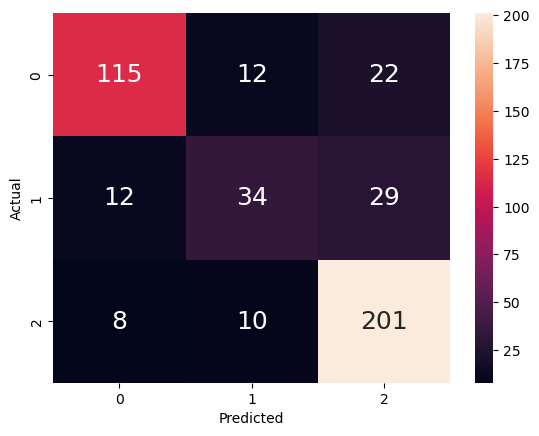

In [39]:
# Use model to predict on test data
y_test_pred = model.predict(X_test)
df.head()

# Print the Classification Accuracy
print("Test Data")

#print("Accuracy  :\t", model.score(X_test, y_test))
# Dropout, Enrolled, Graduate
#print("F1 Score  :\t",f1_score(y_test, y_test_pred, average=None))

print(classification_report(y_test, y_test_pred))

# Plot the two-way Confusion Matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **Visualise Tree**

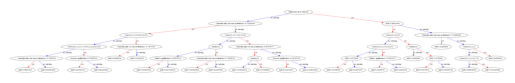

In [59]:
# Visualise first tree of model
fig = xgb.plot_tree(model)
plt.savefig('XGB_tree_3.png', dpi = 4800)
plt.show()

# **Precision-Recall Curve**

In [64]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
y = label_binarize(y, classes=[0, 1, 2])

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
# Split validation set from initial train set to form 8:1:1 train:validation:test ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.89,)

model.load_model('model_3.json')
y_test_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# convert y_test_pred to array of one-hot vectors
n_values = np.max(y_test_pred) + 1
y_test_pred = np.eye(n_values)[y_test_pred]


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_test_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_test_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_test_pred.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_test_pred, average="micro")

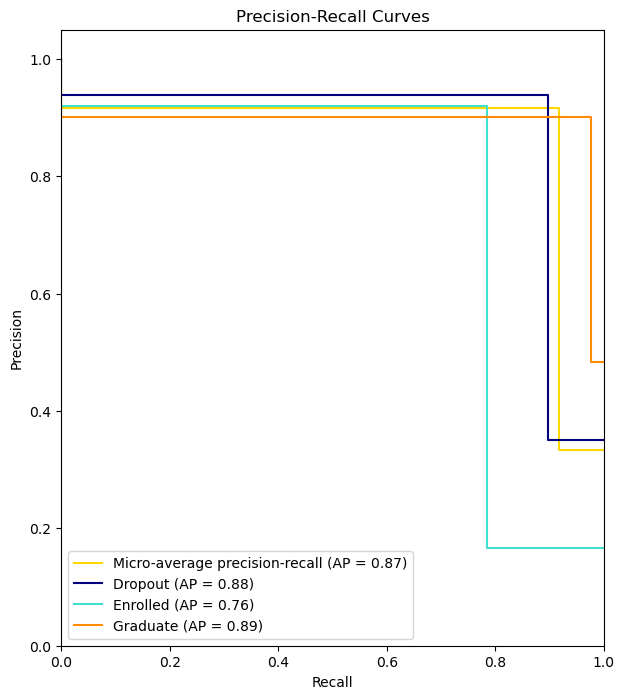

In [66]:
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange"])

_, ax = plt.subplots(figsize=(7, 8))

lines, labels = [], []

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(3), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    class_list = ['Dropout','Enrolled','Graduate']
    display.plot(ax=ax, name=class_list[i], color=color)

# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title("Precision-Recall Curves")

plt.show()

# **Loss Curve**

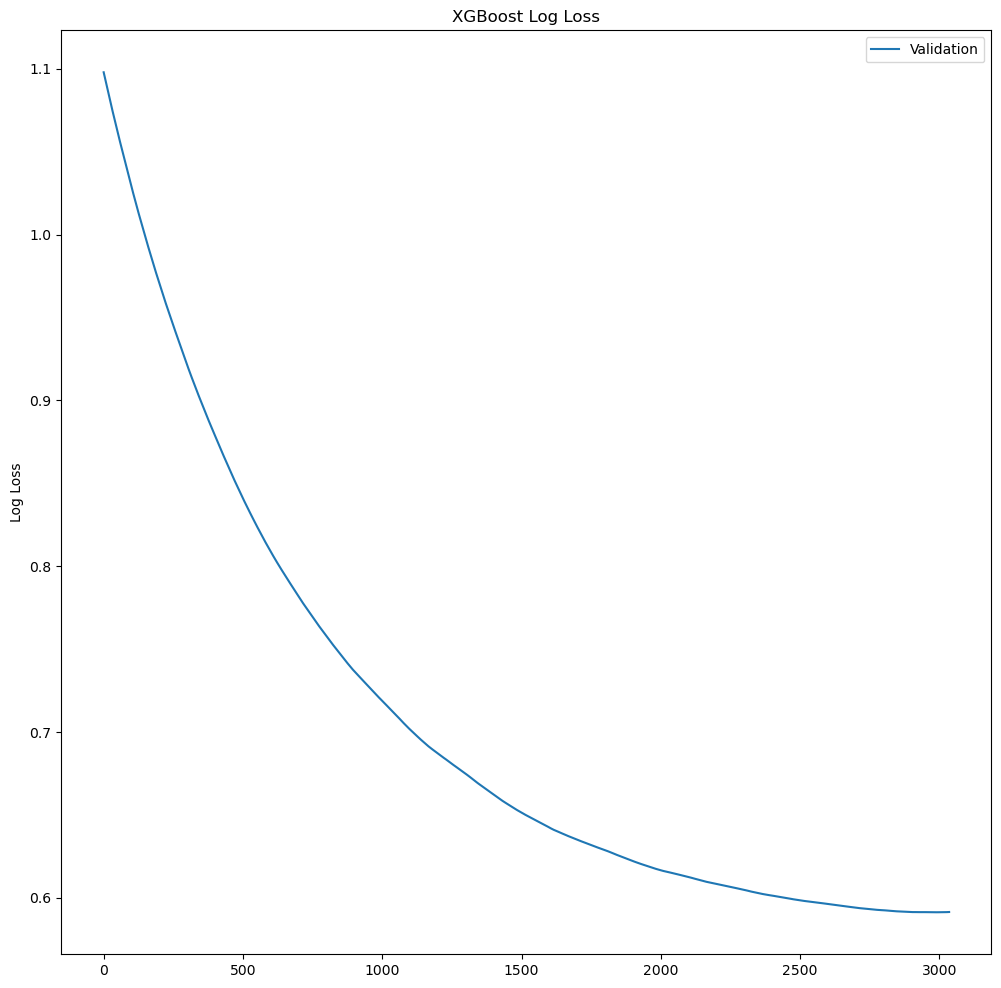

In [102]:
from matplotlib import pyplot

results = model.evals_result()
epochs = len(results["validation_0"]["mlogloss"])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["mlogloss"], label="Validation")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.title("XGBoost Log Loss")
pyplot.show()

In [100]:
print(results)

{'validation_0': {'mlogloss': [1.097857982056326, 1.0971160762386234, 1.0963575513395545, 1.0956085737981753, 1.0948553869169053, 1.09409245971131, 1.0933492208180362, 1.0925943132949203, 1.091847262426054, 1.0910970604038674, 1.0903518145487188, 1.0896112823595194, 1.0888729479214916, 1.08811960944302, 1.087392675822184, 1.0866586331907473, 1.0859267463967137, 1.085186968111012, 1.0844546338738916, 1.0837267569210975, 1.0829906610593403, 1.082262757978483, 1.0815394545254642, 1.0808118252449384, 1.0801034850072644, 1.0793791002334525, 1.078666035443136, 1.077951001794371, 1.0772305890305403, 1.0765226012495555, 1.0758011414580149, 1.0750985798770434, 1.0743858836012887, 1.0736851161473417, 1.0729776667133313, 1.0722711935435256, 1.0715703839036428, 1.070868285551463, 1.0701728836042153, 1.0694652597109477, 1.0687780173401855, 1.0680772749256326, 1.0673803646270543, 1.0666841927184363, 1.0659883457776074, 1.0653022780810317, 1.0645949364252831, 1.0639141438758537, 1.0632169638594535, 1

# **Anomaly Detection with Isolation Forest**

In [67]:
from sklearn.ensemble import IsolationForest

In [68]:
df = pd.read_csv('dataset.csv')

# **Create Model**

In [76]:
model_IF = IsolationForest(n_estimators=5000, contamination = 0.32, max_features= 34, verbose = 10, bootstrap=True)
model_IF.fit(X.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 5000 for this parallel run (total 5000)...
Building estimator 2 of 5000 for this parallel run (total 5000)...
Building estimator 3 of 5000 for this parallel run (total 5000)...
Building estimator 4 of 5000 for this parallel run (total 5000)...
Building estimator 5 of 5000 for this parallel run (total 5000)...
Building estimator 6 of 5000 for this parallel run (total 5000)...
Building estimator 7 of 5000 for this parallel run (total 5000)...
Building estimator 8 of 5000 for this parallel run (total 5000)...
Building estimator 9 of 5000 for this parallel run (total 5000)...
Building estimator 10 of 5000 for this parallel run (total 5000)...
Building estimator 11 of 5000 for this parallel run (total 5000)...
Building estimator 12 of 5000 for this parallel run (total 5000)...
Building estimator 13 of 5000 for this parallel run (total 5000)...
Building estimator 14 of 5000 for this parallel run (total 5000)...
Building estimator 15 of 5000 for this parallel run (tota

Building estimator 124 of 5000 for this parallel run (total 5000)...
Building estimator 125 of 5000 for this parallel run (total 5000)...
Building estimator 126 of 5000 for this parallel run (total 5000)...
Building estimator 127 of 5000 for this parallel run (total 5000)...
Building estimator 128 of 5000 for this parallel run (total 5000)...
Building estimator 129 of 5000 for this parallel run (total 5000)...
Building estimator 130 of 5000 for this parallel run (total 5000)...
Building estimator 131 of 5000 for this parallel run (total 5000)...
Building estimator 132 of 5000 for this parallel run (total 5000)...
Building estimator 133 of 5000 for this parallel run (total 5000)...
Building estimator 134 of 5000 for this parallel run (total 5000)...
Building estimator 135 of 5000 for this parallel run (total 5000)...
Building estimator 136 of 5000 for this parallel run (total 5000)...
Building estimator 137 of 5000 for this parallel run (total 5000)...
Building estimator 138 of 5000 for

Building estimator 246 of 5000 for this parallel run (total 5000)...
Building estimator 247 of 5000 for this parallel run (total 5000)...
Building estimator 248 of 5000 for this parallel run (total 5000)...
Building estimator 249 of 5000 for this parallel run (total 5000)...
Building estimator 250 of 5000 for this parallel run (total 5000)...
Building estimator 251 of 5000 for this parallel run (total 5000)...
Building estimator 252 of 5000 for this parallel run (total 5000)...
Building estimator 253 of 5000 for this parallel run (total 5000)...
Building estimator 254 of 5000 for this parallel run (total 5000)...
Building estimator 255 of 5000 for this parallel run (total 5000)...
Building estimator 256 of 5000 for this parallel run (total 5000)...
Building estimator 257 of 5000 for this parallel run (total 5000)...
Building estimator 258 of 5000 for this parallel run (total 5000)...
Building estimator 259 of 5000 for this parallel run (total 5000)...
Building estimator 260 of 5000 for

Building estimator 376 of 5000 for this parallel run (total 5000)...
Building estimator 377 of 5000 for this parallel run (total 5000)...
Building estimator 378 of 5000 for this parallel run (total 5000)...
Building estimator 379 of 5000 for this parallel run (total 5000)...
Building estimator 380 of 5000 for this parallel run (total 5000)...
Building estimator 381 of 5000 for this parallel run (total 5000)...
Building estimator 382 of 5000 for this parallel run (total 5000)...
Building estimator 383 of 5000 for this parallel run (total 5000)...
Building estimator 384 of 5000 for this parallel run (total 5000)...
Building estimator 385 of 5000 for this parallel run (total 5000)...
Building estimator 386 of 5000 for this parallel run (total 5000)...
Building estimator 387 of 5000 for this parallel run (total 5000)...
Building estimator 388 of 5000 for this parallel run (total 5000)...
Building estimator 389 of 5000 for this parallel run (total 5000)...
Building estimator 390 of 5000 for

Building estimator 509 of 5000 for this parallel run (total 5000)...
Building estimator 510 of 5000 for this parallel run (total 5000)...
Building estimator 511 of 5000 for this parallel run (total 5000)...
Building estimator 512 of 5000 for this parallel run (total 5000)...
Building estimator 513 of 5000 for this parallel run (total 5000)...
Building estimator 514 of 5000 for this parallel run (total 5000)...
Building estimator 515 of 5000 for this parallel run (total 5000)...
Building estimator 516 of 5000 for this parallel run (total 5000)...
Building estimator 517 of 5000 for this parallel run (total 5000)...
Building estimator 518 of 5000 for this parallel run (total 5000)...
Building estimator 519 of 5000 for this parallel run (total 5000)...
Building estimator 520 of 5000 for this parallel run (total 5000)...
Building estimator 521 of 5000 for this parallel run (total 5000)...
Building estimator 522 of 5000 for this parallel run (total 5000)...
Building estimator 523 of 5000 for

Building estimator 661 of 5000 for this parallel run (total 5000)...
Building estimator 662 of 5000 for this parallel run (total 5000)...
Building estimator 663 of 5000 for this parallel run (total 5000)...
Building estimator 664 of 5000 for this parallel run (total 5000)...
Building estimator 665 of 5000 for this parallel run (total 5000)...
Building estimator 666 of 5000 for this parallel run (total 5000)...
Building estimator 667 of 5000 for this parallel run (total 5000)...
Building estimator 668 of 5000 for this parallel run (total 5000)...
Building estimator 669 of 5000 for this parallel run (total 5000)...
Building estimator 670 of 5000 for this parallel run (total 5000)...
Building estimator 671 of 5000 for this parallel run (total 5000)...
Building estimator 672 of 5000 for this parallel run (total 5000)...
Building estimator 673 of 5000 for this parallel run (total 5000)...
Building estimator 674 of 5000 for this parallel run (total 5000)...
Building estimator 675 of 5000 for

Building estimator 810 of 5000 for this parallel run (total 5000)...
Building estimator 811 of 5000 for this parallel run (total 5000)...
Building estimator 812 of 5000 for this parallel run (total 5000)...
Building estimator 813 of 5000 for this parallel run (total 5000)...
Building estimator 814 of 5000 for this parallel run (total 5000)...
Building estimator 815 of 5000 for this parallel run (total 5000)...
Building estimator 816 of 5000 for this parallel run (total 5000)...
Building estimator 817 of 5000 for this parallel run (total 5000)...
Building estimator 818 of 5000 for this parallel run (total 5000)...
Building estimator 819 of 5000 for this parallel run (total 5000)...
Building estimator 820 of 5000 for this parallel run (total 5000)...
Building estimator 821 of 5000 for this parallel run (total 5000)...
Building estimator 822 of 5000 for this parallel run (total 5000)...
Building estimator 823 of 5000 for this parallel run (total 5000)...
Building estimator 824 of 5000 for

Building estimator 963 of 5000 for this parallel run (total 5000)...
Building estimator 964 of 5000 for this parallel run (total 5000)...
Building estimator 965 of 5000 for this parallel run (total 5000)...
Building estimator 966 of 5000 for this parallel run (total 5000)...
Building estimator 967 of 5000 for this parallel run (total 5000)...
Building estimator 968 of 5000 for this parallel run (total 5000)...
Building estimator 969 of 5000 for this parallel run (total 5000)...
Building estimator 970 of 5000 for this parallel run (total 5000)...
Building estimator 971 of 5000 for this parallel run (total 5000)...
Building estimator 972 of 5000 for this parallel run (total 5000)...
Building estimator 973 of 5000 for this parallel run (total 5000)...
Building estimator 974 of 5000 for this parallel run (total 5000)...
Building estimator 975 of 5000 for this parallel run (total 5000)...
Building estimator 976 of 5000 for this parallel run (total 5000)...
Building estimator 977 of 5000 for

Building estimator 1115 of 5000 for this parallel run (total 5000)...
Building estimator 1116 of 5000 for this parallel run (total 5000)...
Building estimator 1117 of 5000 for this parallel run (total 5000)...
Building estimator 1118 of 5000 for this parallel run (total 5000)...
Building estimator 1119 of 5000 for this parallel run (total 5000)...
Building estimator 1120 of 5000 for this parallel run (total 5000)...
Building estimator 1121 of 5000 for this parallel run (total 5000)...
Building estimator 1122 of 5000 for this parallel run (total 5000)...
Building estimator 1123 of 5000 for this parallel run (total 5000)...
Building estimator 1124 of 5000 for this parallel run (total 5000)...
Building estimator 1125 of 5000 for this parallel run (total 5000)...
Building estimator 1126 of 5000 for this parallel run (total 5000)...
Building estimator 1127 of 5000 for this parallel run (total 5000)...
Building estimator 1128 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1235 of 5000 for this parallel run (total 5000)...
Building estimator 1236 of 5000 for this parallel run (total 5000)...
Building estimator 1237 of 5000 for this parallel run (total 5000)...
Building estimator 1238 of 5000 for this parallel run (total 5000)...
Building estimator 1239 of 5000 for this parallel run (total 5000)...
Building estimator 1240 of 5000 for this parallel run (total 5000)...
Building estimator 1241 of 5000 for this parallel run (total 5000)...
Building estimator 1242 of 5000 for this parallel run (total 5000)...
Building estimator 1243 of 5000 for this parallel run (total 5000)...
Building estimator 1244 of 5000 for this parallel run (total 5000)...
Building estimator 1245 of 5000 for this parallel run (total 5000)...
Building estimator 1246 of 5000 for this parallel run (total 5000)...
Building estimator 1247 of 5000 for this parallel run (total 5000)...
Building estimator 1248 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1357 of 5000 for this parallel run (total 5000)...
Building estimator 1358 of 5000 for this parallel run (total 5000)...
Building estimator 1359 of 5000 for this parallel run (total 5000)...
Building estimator 1360 of 5000 for this parallel run (total 5000)...
Building estimator 1361 of 5000 for this parallel run (total 5000)...
Building estimator 1362 of 5000 for this parallel run (total 5000)...
Building estimator 1363 of 5000 for this parallel run (total 5000)...
Building estimator 1364 of 5000 for this parallel run (total 5000)...
Building estimator 1365 of 5000 for this parallel run (total 5000)...
Building estimator 1366 of 5000 for this parallel run (total 5000)...
Building estimator 1367 of 5000 for this parallel run (total 5000)...
Building estimator 1368 of 5000 for this parallel run (total 5000)...
Building estimator 1369 of 5000 for this parallel run (total 5000)...
Building estimator 1370 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1494 of 5000 for this parallel run (total 5000)...
Building estimator 1495 of 5000 for this parallel run (total 5000)...
Building estimator 1496 of 5000 for this parallel run (total 5000)...
Building estimator 1497 of 5000 for this parallel run (total 5000)...
Building estimator 1498 of 5000 for this parallel run (total 5000)...
Building estimator 1499 of 5000 for this parallel run (total 5000)...
Building estimator 1500 of 5000 for this parallel run (total 5000)...
Building estimator 1501 of 5000 for this parallel run (total 5000)...
Building estimator 1502 of 5000 for this parallel run (total 5000)...
Building estimator 1503 of 5000 for this parallel run (total 5000)...
Building estimator 1504 of 5000 for this parallel run (total 5000)...
Building estimator 1505 of 5000 for this parallel run (total 5000)...
Building estimator 1506 of 5000 for this parallel run (total 5000)...
Building estimator 1507 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1652 of 5000 for this parallel run (total 5000)...
Building estimator 1653 of 5000 for this parallel run (total 5000)...
Building estimator 1654 of 5000 for this parallel run (total 5000)...
Building estimator 1655 of 5000 for this parallel run (total 5000)...
Building estimator 1656 of 5000 for this parallel run (total 5000)...
Building estimator 1657 of 5000 for this parallel run (total 5000)...
Building estimator 1658 of 5000 for this parallel run (total 5000)...
Building estimator 1659 of 5000 for this parallel run (total 5000)...
Building estimator 1660 of 5000 for this parallel run (total 5000)...
Building estimator 1661 of 5000 for this parallel run (total 5000)...
Building estimator 1662 of 5000 for this parallel run (total 5000)...
Building estimator 1663 of 5000 for this parallel run (total 5000)...
Building estimator 1664 of 5000 for this parallel run (total 5000)...
Building estimator 1665 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1770 of 5000 for this parallel run (total 5000)...
Building estimator 1771 of 5000 for this parallel run (total 5000)...
Building estimator 1772 of 5000 for this parallel run (total 5000)...
Building estimator 1773 of 5000 for this parallel run (total 5000)...
Building estimator 1774 of 5000 for this parallel run (total 5000)...
Building estimator 1775 of 5000 for this parallel run (total 5000)...
Building estimator 1776 of 5000 for this parallel run (total 5000)...
Building estimator 1777 of 5000 for this parallel run (total 5000)...
Building estimator 1778 of 5000 for this parallel run (total 5000)...
Building estimator 1779 of 5000 for this parallel run (total 5000)...
Building estimator 1780 of 5000 for this parallel run (total 5000)...
Building estimator 1781 of 5000 for this parallel run (total 5000)...
Building estimator 1782 of 5000 for this parallel run (total 5000)...
Building estimator 1783 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 1897 of 5000 for this parallel run (total 5000)...
Building estimator 1898 of 5000 for this parallel run (total 5000)...
Building estimator 1899 of 5000 for this parallel run (total 5000)...
Building estimator 1900 of 5000 for this parallel run (total 5000)...
Building estimator 1901 of 5000 for this parallel run (total 5000)...
Building estimator 1902 of 5000 for this parallel run (total 5000)...
Building estimator 1903 of 5000 for this parallel run (total 5000)...
Building estimator 1904 of 5000 for this parallel run (total 5000)...
Building estimator 1905 of 5000 for this parallel run (total 5000)...
Building estimator 1906 of 5000 for this parallel run (total 5000)...
Building estimator 1907 of 5000 for this parallel run (total 5000)...
Building estimator 1908 of 5000 for this parallel run (total 5000)...
Building estimator 1909 of 5000 for this parallel run (total 5000)...
Building estimator 1910 of 5000 for this parallel run (total 5000)...
Building estimator 1

Building estimator 2026 of 5000 for this parallel run (total 5000)...
Building estimator 2027 of 5000 for this parallel run (total 5000)...
Building estimator 2028 of 5000 for this parallel run (total 5000)...
Building estimator 2029 of 5000 for this parallel run (total 5000)...
Building estimator 2030 of 5000 for this parallel run (total 5000)...
Building estimator 2031 of 5000 for this parallel run (total 5000)...
Building estimator 2032 of 5000 for this parallel run (total 5000)...
Building estimator 2033 of 5000 for this parallel run (total 5000)...
Building estimator 2034 of 5000 for this parallel run (total 5000)...
Building estimator 2035 of 5000 for this parallel run (total 5000)...
Building estimator 2036 of 5000 for this parallel run (total 5000)...
Building estimator 2037 of 5000 for this parallel run (total 5000)...
Building estimator 2038 of 5000 for this parallel run (total 5000)...
Building estimator 2039 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2169 of 5000 for this parallel run (total 5000)...
Building estimator 2170 of 5000 for this parallel run (total 5000)...
Building estimator 2171 of 5000 for this parallel run (total 5000)...
Building estimator 2172 of 5000 for this parallel run (total 5000)...
Building estimator 2173 of 5000 for this parallel run (total 5000)...
Building estimator 2174 of 5000 for this parallel run (total 5000)...
Building estimator 2175 of 5000 for this parallel run (total 5000)...
Building estimator 2176 of 5000 for this parallel run (total 5000)...
Building estimator 2177 of 5000 for this parallel run (total 5000)...
Building estimator 2178 of 5000 for this parallel run (total 5000)...
Building estimator 2179 of 5000 for this parallel run (total 5000)...
Building estimator 2180 of 5000 for this parallel run (total 5000)...
Building estimator 2181 of 5000 for this parallel run (total 5000)...
Building estimator 2182 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2298 of 5000 for this parallel run (total 5000)...
Building estimator 2299 of 5000 for this parallel run (total 5000)...
Building estimator 2300 of 5000 for this parallel run (total 5000)...
Building estimator 2301 of 5000 for this parallel run (total 5000)...
Building estimator 2302 of 5000 for this parallel run (total 5000)...
Building estimator 2303 of 5000 for this parallel run (total 5000)...
Building estimator 2304 of 5000 for this parallel run (total 5000)...
Building estimator 2305 of 5000 for this parallel run (total 5000)...
Building estimator 2306 of 5000 for this parallel run (total 5000)...
Building estimator 2307 of 5000 for this parallel run (total 5000)...
Building estimator 2308 of 5000 for this parallel run (total 5000)...
Building estimator 2309 of 5000 for this parallel run (total 5000)...
Building estimator 2310 of 5000 for this parallel run (total 5000)...
Building estimator 2311 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2421 of 5000 for this parallel run (total 5000)...
Building estimator 2422 of 5000 for this parallel run (total 5000)...
Building estimator 2423 of 5000 for this parallel run (total 5000)...
Building estimator 2424 of 5000 for this parallel run (total 5000)...
Building estimator 2425 of 5000 for this parallel run (total 5000)...
Building estimator 2426 of 5000 for this parallel run (total 5000)...
Building estimator 2427 of 5000 for this parallel run (total 5000)...
Building estimator 2428 of 5000 for this parallel run (total 5000)...
Building estimator 2429 of 5000 for this parallel run (total 5000)...
Building estimator 2430 of 5000 for this parallel run (total 5000)...
Building estimator 2431 of 5000 for this parallel run (total 5000)...
Building estimator 2432 of 5000 for this parallel run (total 5000)...
Building estimator 2433 of 5000 for this parallel run (total 5000)...
Building estimator 2434 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2548 of 5000 for this parallel run (total 5000)...
Building estimator 2549 of 5000 for this parallel run (total 5000)...
Building estimator 2550 of 5000 for this parallel run (total 5000)...
Building estimator 2551 of 5000 for this parallel run (total 5000)...
Building estimator 2552 of 5000 for this parallel run (total 5000)...
Building estimator 2553 of 5000 for this parallel run (total 5000)...
Building estimator 2554 of 5000 for this parallel run (total 5000)...
Building estimator 2555 of 5000 for this parallel run (total 5000)...
Building estimator 2556 of 5000 for this parallel run (total 5000)...
Building estimator 2557 of 5000 for this parallel run (total 5000)...
Building estimator 2558 of 5000 for this parallel run (total 5000)...
Building estimator 2559 of 5000 for this parallel run (total 5000)...
Building estimator 2560 of 5000 for this parallel run (total 5000)...
Building estimator 2561 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2688 of 5000 for this parallel run (total 5000)...
Building estimator 2689 of 5000 for this parallel run (total 5000)...
Building estimator 2690 of 5000 for this parallel run (total 5000)...
Building estimator 2691 of 5000 for this parallel run (total 5000)...
Building estimator 2692 of 5000 for this parallel run (total 5000)...
Building estimator 2693 of 5000 for this parallel run (total 5000)...
Building estimator 2694 of 5000 for this parallel run (total 5000)...
Building estimator 2695 of 5000 for this parallel run (total 5000)...
Building estimator 2696 of 5000 for this parallel run (total 5000)...
Building estimator 2697 of 5000 for this parallel run (total 5000)...
Building estimator 2698 of 5000 for this parallel run (total 5000)...
Building estimator 2699 of 5000 for this parallel run (total 5000)...
Building estimator 2700 of 5000 for this parallel run (total 5000)...
Building estimator 2701 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2813 of 5000 for this parallel run (total 5000)...
Building estimator 2814 of 5000 for this parallel run (total 5000)...
Building estimator 2815 of 5000 for this parallel run (total 5000)...
Building estimator 2816 of 5000 for this parallel run (total 5000)...
Building estimator 2817 of 5000 for this parallel run (total 5000)...
Building estimator 2818 of 5000 for this parallel run (total 5000)...
Building estimator 2819 of 5000 for this parallel run (total 5000)...
Building estimator 2820 of 5000 for this parallel run (total 5000)...
Building estimator 2821 of 5000 for this parallel run (total 5000)...
Building estimator 2822 of 5000 for this parallel run (total 5000)...
Building estimator 2823 of 5000 for this parallel run (total 5000)...
Building estimator 2824 of 5000 for this parallel run (total 5000)...
Building estimator 2825 of 5000 for this parallel run (total 5000)...
Building estimator 2826 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 2943 of 5000 for this parallel run (total 5000)...
Building estimator 2944 of 5000 for this parallel run (total 5000)...
Building estimator 2945 of 5000 for this parallel run (total 5000)...
Building estimator 2946 of 5000 for this parallel run (total 5000)...
Building estimator 2947 of 5000 for this parallel run (total 5000)...
Building estimator 2948 of 5000 for this parallel run (total 5000)...
Building estimator 2949 of 5000 for this parallel run (total 5000)...
Building estimator 2950 of 5000 for this parallel run (total 5000)...
Building estimator 2951 of 5000 for this parallel run (total 5000)...
Building estimator 2952 of 5000 for this parallel run (total 5000)...
Building estimator 2953 of 5000 for this parallel run (total 5000)...
Building estimator 2954 of 5000 for this parallel run (total 5000)...
Building estimator 2955 of 5000 for this parallel run (total 5000)...
Building estimator 2956 of 5000 for this parallel run (total 5000)...
Building estimator 2

Building estimator 3071 of 5000 for this parallel run (total 5000)...
Building estimator 3072 of 5000 for this parallel run (total 5000)...
Building estimator 3073 of 5000 for this parallel run (total 5000)...
Building estimator 3074 of 5000 for this parallel run (total 5000)...
Building estimator 3075 of 5000 for this parallel run (total 5000)...
Building estimator 3076 of 5000 for this parallel run (total 5000)...
Building estimator 3077 of 5000 for this parallel run (total 5000)...
Building estimator 3078 of 5000 for this parallel run (total 5000)...
Building estimator 3079 of 5000 for this parallel run (total 5000)...
Building estimator 3080 of 5000 for this parallel run (total 5000)...
Building estimator 3081 of 5000 for this parallel run (total 5000)...
Building estimator 3082 of 5000 for this parallel run (total 5000)...
Building estimator 3083 of 5000 for this parallel run (total 5000)...
Building estimator 3084 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3195 of 5000 for this parallel run (total 5000)...
Building estimator 3196 of 5000 for this parallel run (total 5000)...
Building estimator 3197 of 5000 for this parallel run (total 5000)...
Building estimator 3198 of 5000 for this parallel run (total 5000)...
Building estimator 3199 of 5000 for this parallel run (total 5000)...
Building estimator 3200 of 5000 for this parallel run (total 5000)...
Building estimator 3201 of 5000 for this parallel run (total 5000)...
Building estimator 3202 of 5000 for this parallel run (total 5000)...
Building estimator 3203 of 5000 for this parallel run (total 5000)...
Building estimator 3204 of 5000 for this parallel run (total 5000)...
Building estimator 3205 of 5000 for this parallel run (total 5000)...
Building estimator 3206 of 5000 for this parallel run (total 5000)...
Building estimator 3207 of 5000 for this parallel run (total 5000)...
Building estimator 3208 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3336 of 5000 for this parallel run (total 5000)...
Building estimator 3337 of 5000 for this parallel run (total 5000)...
Building estimator 3338 of 5000 for this parallel run (total 5000)...
Building estimator 3339 of 5000 for this parallel run (total 5000)...
Building estimator 3340 of 5000 for this parallel run (total 5000)...
Building estimator 3341 of 5000 for this parallel run (total 5000)...
Building estimator 3342 of 5000 for this parallel run (total 5000)...
Building estimator 3343 of 5000 for this parallel run (total 5000)...
Building estimator 3344 of 5000 for this parallel run (total 5000)...
Building estimator 3345 of 5000 for this parallel run (total 5000)...
Building estimator 3346 of 5000 for this parallel run (total 5000)...
Building estimator 3347 of 5000 for this parallel run (total 5000)...
Building estimator 3348 of 5000 for this parallel run (total 5000)...
Building estimator 3349 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3479 of 5000 for this parallel run (total 5000)...
Building estimator 3480 of 5000 for this parallel run (total 5000)...
Building estimator 3481 of 5000 for this parallel run (total 5000)...
Building estimator 3482 of 5000 for this parallel run (total 5000)...
Building estimator 3483 of 5000 for this parallel run (total 5000)...
Building estimator 3484 of 5000 for this parallel run (total 5000)...
Building estimator 3485 of 5000 for this parallel run (total 5000)...
Building estimator 3486 of 5000 for this parallel run (total 5000)...
Building estimator 3487 of 5000 for this parallel run (total 5000)...
Building estimator 3488 of 5000 for this parallel run (total 5000)...
Building estimator 3489 of 5000 for this parallel run (total 5000)...
Building estimator 3490 of 5000 for this parallel run (total 5000)...
Building estimator 3491 of 5000 for this parallel run (total 5000)...
Building estimator 3492 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3612 of 5000 for this parallel run (total 5000)...
Building estimator 3613 of 5000 for this parallel run (total 5000)...
Building estimator 3614 of 5000 for this parallel run (total 5000)...
Building estimator 3615 of 5000 for this parallel run (total 5000)...
Building estimator 3616 of 5000 for this parallel run (total 5000)...
Building estimator 3617 of 5000 for this parallel run (total 5000)...
Building estimator 3618 of 5000 for this parallel run (total 5000)...
Building estimator 3619 of 5000 for this parallel run (total 5000)...
Building estimator 3620 of 5000 for this parallel run (total 5000)...
Building estimator 3621 of 5000 for this parallel run (total 5000)...
Building estimator 3622 of 5000 for this parallel run (total 5000)...
Building estimator 3623 of 5000 for this parallel run (total 5000)...
Building estimator 3624 of 5000 for this parallel run (total 5000)...
Building estimator 3625 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3738 of 5000 for this parallel run (total 5000)...
Building estimator 3739 of 5000 for this parallel run (total 5000)...
Building estimator 3740 of 5000 for this parallel run (total 5000)...
Building estimator 3741 of 5000 for this parallel run (total 5000)...
Building estimator 3742 of 5000 for this parallel run (total 5000)...
Building estimator 3743 of 5000 for this parallel run (total 5000)...
Building estimator 3744 of 5000 for this parallel run (total 5000)...
Building estimator 3745 of 5000 for this parallel run (total 5000)...
Building estimator 3746 of 5000 for this parallel run (total 5000)...
Building estimator 3747 of 5000 for this parallel run (total 5000)...
Building estimator 3748 of 5000 for this parallel run (total 5000)...
Building estimator 3749 of 5000 for this parallel run (total 5000)...
Building estimator 3750 of 5000 for this parallel run (total 5000)...
Building estimator 3751 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3858 of 5000 for this parallel run (total 5000)...
Building estimator 3859 of 5000 for this parallel run (total 5000)...
Building estimator 3860 of 5000 for this parallel run (total 5000)...
Building estimator 3861 of 5000 for this parallel run (total 5000)...
Building estimator 3862 of 5000 for this parallel run (total 5000)...
Building estimator 3863 of 5000 for this parallel run (total 5000)...
Building estimator 3864 of 5000 for this parallel run (total 5000)...
Building estimator 3865 of 5000 for this parallel run (total 5000)...
Building estimator 3866 of 5000 for this parallel run (total 5000)...
Building estimator 3867 of 5000 for this parallel run (total 5000)...
Building estimator 3868 of 5000 for this parallel run (total 5000)...
Building estimator 3869 of 5000 for this parallel run (total 5000)...
Building estimator 3870 of 5000 for this parallel run (total 5000)...
Building estimator 3871 of 5000 for this parallel run (total 5000)...
Building estimator 3

Building estimator 3987 of 5000 for this parallel run (total 5000)...
Building estimator 3988 of 5000 for this parallel run (total 5000)...
Building estimator 3989 of 5000 for this parallel run (total 5000)...
Building estimator 3990 of 5000 for this parallel run (total 5000)...
Building estimator 3991 of 5000 for this parallel run (total 5000)...
Building estimator 3992 of 5000 for this parallel run (total 5000)...
Building estimator 3993 of 5000 for this parallel run (total 5000)...
Building estimator 3994 of 5000 for this parallel run (total 5000)...
Building estimator 3995 of 5000 for this parallel run (total 5000)...
Building estimator 3996 of 5000 for this parallel run (total 5000)...
Building estimator 3997 of 5000 for this parallel run (total 5000)...
Building estimator 3998 of 5000 for this parallel run (total 5000)...
Building estimator 3999 of 5000 for this parallel run (total 5000)...
Building estimator 4000 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4115 of 5000 for this parallel run (total 5000)...
Building estimator 4116 of 5000 for this parallel run (total 5000)...
Building estimator 4117 of 5000 for this parallel run (total 5000)...
Building estimator 4118 of 5000 for this parallel run (total 5000)...
Building estimator 4119 of 5000 for this parallel run (total 5000)...
Building estimator 4120 of 5000 for this parallel run (total 5000)...
Building estimator 4121 of 5000 for this parallel run (total 5000)...
Building estimator 4122 of 5000 for this parallel run (total 5000)...
Building estimator 4123 of 5000 for this parallel run (total 5000)...
Building estimator 4124 of 5000 for this parallel run (total 5000)...
Building estimator 4125 of 5000 for this parallel run (total 5000)...
Building estimator 4126 of 5000 for this parallel run (total 5000)...
Building estimator 4127 of 5000 for this parallel run (total 5000)...
Building estimator 4128 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4250 of 5000 for this parallel run (total 5000)...
Building estimator 4251 of 5000 for this parallel run (total 5000)...
Building estimator 4252 of 5000 for this parallel run (total 5000)...
Building estimator 4253 of 5000 for this parallel run (total 5000)...
Building estimator 4254 of 5000 for this parallel run (total 5000)...
Building estimator 4255 of 5000 for this parallel run (total 5000)...
Building estimator 4256 of 5000 for this parallel run (total 5000)...
Building estimator 4257 of 5000 for this parallel run (total 5000)...
Building estimator 4258 of 5000 for this parallel run (total 5000)...
Building estimator 4259 of 5000 for this parallel run (total 5000)...
Building estimator 4260 of 5000 for this parallel run (total 5000)...
Building estimator 4261 of 5000 for this parallel run (total 5000)...
Building estimator 4262 of 5000 for this parallel run (total 5000)...
Building estimator 4263 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4376 of 5000 for this parallel run (total 5000)...
Building estimator 4377 of 5000 for this parallel run (total 5000)...
Building estimator 4378 of 5000 for this parallel run (total 5000)...
Building estimator 4379 of 5000 for this parallel run (total 5000)...
Building estimator 4380 of 5000 for this parallel run (total 5000)...
Building estimator 4381 of 5000 for this parallel run (total 5000)...
Building estimator 4382 of 5000 for this parallel run (total 5000)...
Building estimator 4383 of 5000 for this parallel run (total 5000)...
Building estimator 4384 of 5000 for this parallel run (total 5000)...
Building estimator 4385 of 5000 for this parallel run (total 5000)...
Building estimator 4386 of 5000 for this parallel run (total 5000)...
Building estimator 4387 of 5000 for this parallel run (total 5000)...
Building estimator 4388 of 5000 for this parallel run (total 5000)...
Building estimator 4389 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4515 of 5000 for this parallel run (total 5000)...
Building estimator 4516 of 5000 for this parallel run (total 5000)...
Building estimator 4517 of 5000 for this parallel run (total 5000)...
Building estimator 4518 of 5000 for this parallel run (total 5000)...
Building estimator 4519 of 5000 for this parallel run (total 5000)...
Building estimator 4520 of 5000 for this parallel run (total 5000)...
Building estimator 4521 of 5000 for this parallel run (total 5000)...
Building estimator 4522 of 5000 for this parallel run (total 5000)...
Building estimator 4523 of 5000 for this parallel run (total 5000)...
Building estimator 4524 of 5000 for this parallel run (total 5000)...
Building estimator 4525 of 5000 for this parallel run (total 5000)...
Building estimator 4526 of 5000 for this parallel run (total 5000)...
Building estimator 4527 of 5000 for this parallel run (total 5000)...
Building estimator 4528 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4669 of 5000 for this parallel run (total 5000)...
Building estimator 4670 of 5000 for this parallel run (total 5000)...
Building estimator 4671 of 5000 for this parallel run (total 5000)...
Building estimator 4672 of 5000 for this parallel run (total 5000)...
Building estimator 4673 of 5000 for this parallel run (total 5000)...
Building estimator 4674 of 5000 for this parallel run (total 5000)...
Building estimator 4675 of 5000 for this parallel run (total 5000)...
Building estimator 4676 of 5000 for this parallel run (total 5000)...
Building estimator 4677 of 5000 for this parallel run (total 5000)...
Building estimator 4678 of 5000 for this parallel run (total 5000)...
Building estimator 4679 of 5000 for this parallel run (total 5000)...
Building estimator 4680 of 5000 for this parallel run (total 5000)...
Building estimator 4681 of 5000 for this parallel run (total 5000)...
Building estimator 4682 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4803 of 5000 for this parallel run (total 5000)...
Building estimator 4804 of 5000 for this parallel run (total 5000)...
Building estimator 4805 of 5000 for this parallel run (total 5000)...
Building estimator 4806 of 5000 for this parallel run (total 5000)...
Building estimator 4807 of 5000 for this parallel run (total 5000)...
Building estimator 4808 of 5000 for this parallel run (total 5000)...
Building estimator 4809 of 5000 for this parallel run (total 5000)...
Building estimator 4810 of 5000 for this parallel run (total 5000)...
Building estimator 4811 of 5000 for this parallel run (total 5000)...
Building estimator 4812 of 5000 for this parallel run (total 5000)...
Building estimator 4813 of 5000 for this parallel run (total 5000)...
Building estimator 4814 of 5000 for this parallel run (total 5000)...
Building estimator 4815 of 5000 for this parallel run (total 5000)...
Building estimator 4816 of 5000 for this parallel run (total 5000)...
Building estimator 4

Building estimator 4948 of 5000 for this parallel run (total 5000)...
Building estimator 4949 of 5000 for this parallel run (total 5000)...
Building estimator 4950 of 5000 for this parallel run (total 5000)...
Building estimator 4951 of 5000 for this parallel run (total 5000)...
Building estimator 4952 of 5000 for this parallel run (total 5000)...
Building estimator 4953 of 5000 for this parallel run (total 5000)...
Building estimator 4954 of 5000 for this parallel run (total 5000)...
Building estimator 4955 of 5000 for this parallel run (total 5000)...
Building estimator 4956 of 5000 for this parallel run (total 5000)...
Building estimator 4957 of 5000 for this parallel run (total 5000)...
Building estimator 4958 of 5000 for this parallel run (total 5000)...
Building estimator 4959 of 5000 for this parallel run (total 5000)...
Building estimator 4960 of 5000 for this parallel run (total 5000)...
Building estimator 4961 of 5000 for this parallel run (total 5000)...
Building estimator 4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.4s finished


IsolationForest(bootstrap=True, contamination=0.32, max_features=34,
                n_estimators=5000, verbose=10)

# **Predict and Evaluate Performance**

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       142
           1       0.80      0.84      0.82       301

    accuracy                           0.75       443
   macro avg       0.71      0.70      0.71       443
weighted avg       0.75      0.75      0.75       443



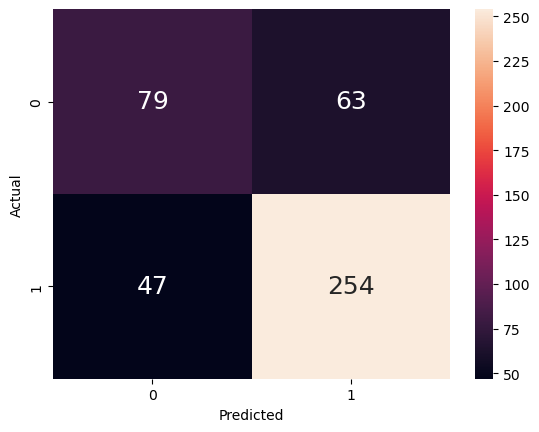

In [91]:
#from keras.models import load_model
#model_IF = load_model('model_IF_1.json')

#Re-initialise y_test
X = feature_matrix.iloc[:,:35]
y = feature_matrix.iloc[:,35:]
# Encode categorical features
y = y.astype("category")
le = LabelEncoder()
y = le.fit_transform(np.ravel(y))
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
# Split validation set from initial train set to form 8:1:1 train:validation:test ratio
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.89,)

# predict on testset
y_test_pred = model_IF.predict(X_test.values)
y_test_pred = pd.Series(y_test_pred)

# merge 'Graduate' and 'Enrolled' classes in y_test
y_test = pd.Series(y_test).replace(to_replace=2, value=1)
# 0:outlier (Dropout), 1: inlier
y_test_pred = y_test_pred.map({1: 1, -1: 0})

print(classification_report(y_test, y_test_pred))
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()    

In [81]:
model.save_model('model_IF_1.json')

# **Plot Decision Boundary**

In [138]:
# Import error due to sklearn version
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    model_IF,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary Decision Boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["Outliers", "Inliers"], title="Actual Class")
plt.show()


ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

# **Precision-Recall Curve**

In [92]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()

# convert y_test and y_test_pred to array of one-hot vectors
n_values = np.max(y_test) + 1
y_test = np.eye(2)[y_test]

n_values = np.max(y_test_pred) + 1
y_test_pred = np.eye(2)[y_test_pred]

for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_test_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_test_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_test_pred.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_test_pred, average="micro")

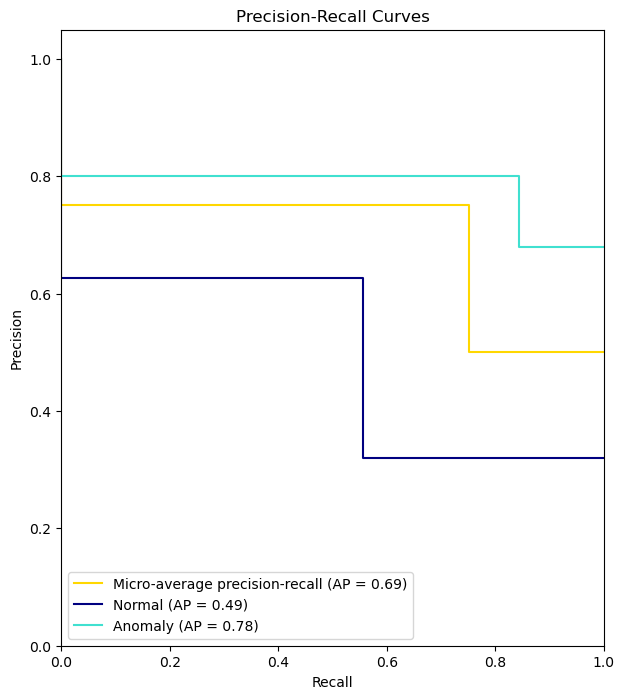

In [94]:
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise"])

_, ax = plt.subplots(figsize=(7, 8))

lines, labels = [], []

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(2), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    class_list = ['Normal','Anomaly']
    display.plot(ax=ax, name=class_list[i], color=color)

# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title("Precision-Recall Curves")

plt.show()